<a href="https://colab.research.google.com/github/FranciscoMoralesActuary/Seguros-de-Auto/blob/main/seminario_curricular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Código elaborado por Morales Ramírez Ángel Franciso [LinkedIn](https://www.linkedin.com/in/francisco-morales-actuario/)**
---

 Fuente de los datos [Aseguradora de autos](https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification?select=sample_submission.csv)

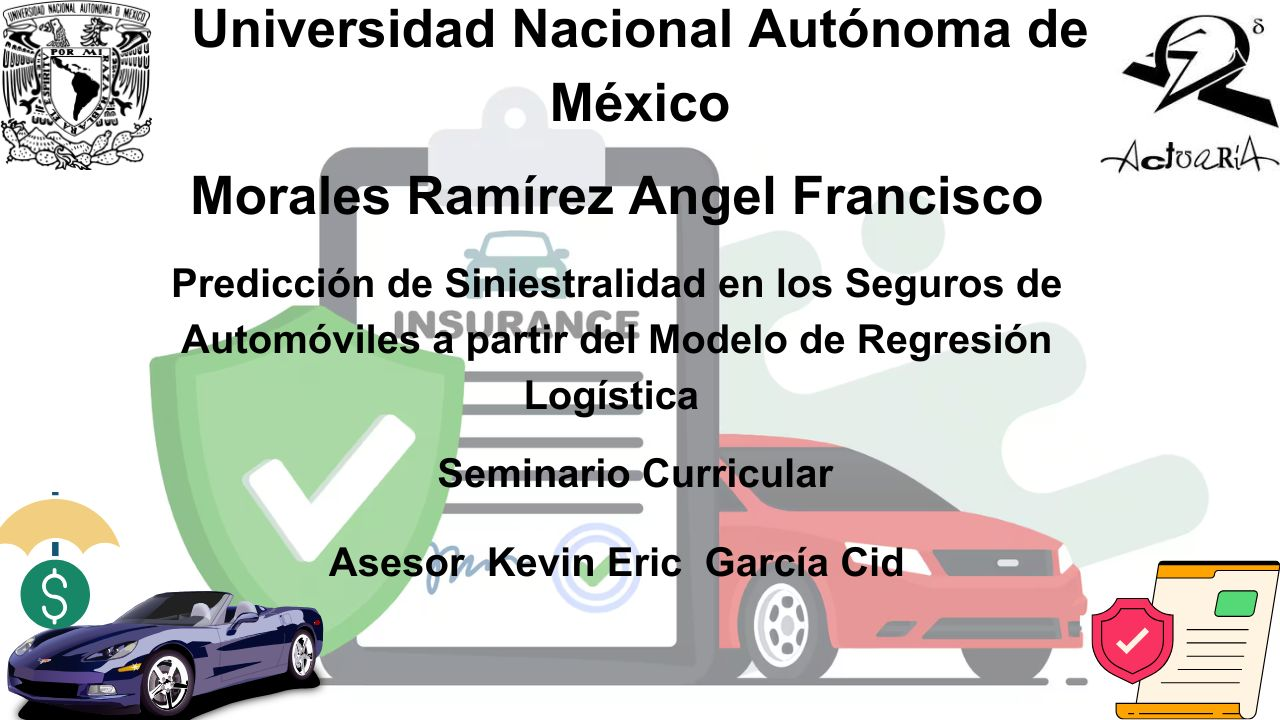

---
# **Predicción de siniestralidad en los seguros de autos usando un modelo de regresión logística** 🏎️
---

---
# **Importación de librerías**🐍
---

In [ ]:
#Imporar libreria pandas
#Trabajar los datos con dataframes
import pandas as pd
#Importar libreria numpy
#Cálculos matemáticos
import numpy as np
#Importar libreria seaborn
#Gráficos
import seaborn as sns
#Importar libreria matplotlib
#Gráficos
import matplotlib.pyplot as plt
#Texto en los gráficos
from matplotlib.font_manager import FontProperties
#Importar libreria statsmodels
#Regresión logística
import statsmodels.api as sm
#Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
#Modelo de regresión logística
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import (confusion_matrix, accuracy_score)
#Calcular curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#VIF para multicolinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Oversampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

---
# **Importación de datos**📋
---

In [ ]:
#Dirrección del repositorio con los datos
url_datos=('https://raw.githubusercontent.com/FranciscoMoralesActuary/Seguros-de-Auto/main/datos-aseguradora.xlsx')
#Leer el archico con la funcion de Pandas pd.read
df = pd.read_excel(url_datos)

In [ ]:
# Configuración de Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

#Mostrar las primeras 5 filas del dataset
df.head(5)

policy_id    policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001  515873589958172           5      644230769230769           C1   
1   ID00002  672618513547733           2                  375           C2   
2   ID00003  841110255796233           2      384615384615385           C3   
3   ID00004  900276558749967          11      432692307692308           C4   
4   ID00005  596402813108729          11      634615384615385           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power              46    3445   1515    1475          1185   
1         Power              46    3445   1515    1475          1185   
2         Power              46    3445   1515    1475          1185   
3      Electric              48    3995   1735    1515          1335   
4      Electric               5    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  
0                            No     No            Yes            0         0  
1                            No

In [ ]:
#Mostrar dimensiones de la base de datos
df.shape

(58592, 44)

---
# **Descripción de variables** 🗃️
---

Se agrega una breve descripción del dataset con el nombre , tipo y descripcion de cada variable

1.	**policy id**: Identificador único del contrato póliza
2.	**policy ternure**: Plazo de la póliza
3.	**age of car**: Edad del auto en años
4.	**age of policyholder**: Edad del asegurado en años
5.	**area cluster**: Clasificación del area donde vive el asegurado
6.	**population density**: Densidad de población de la ciudad del asegurado
7.	**make**: Fabricante del vehículo
8.	**segment**: Segmento del coche
9.	**model**: Nombre del modelo del auto
10.	**fuel type**: Tipo de combustible que utiliza el auto
11.	**max torque**: Torque máximo generado por el auto (Nm@rpm)
12.	**max power**: Potencia máxima generado por el auto (bhp@rpm)
13.	**engine type**: Tipo de motor utilizado por el auto
14.	**airbags**: Numero de bolsas de aire en el auto
15.	**is esc**: Valor booleano que indica si el auto cuanto con ESC (Control electrónico de estabilidad)
16.	**is adjustable steering**: Valor booleano que indica el auto cuenta con volante ajustable
17.	**is tpms**: Valor booleano que indica el automóvil cuenta con TPMS (Sistema de monitore de presión de neumáticos)
18.**is parking sensors**: Valor booleano que indica si el carro cuenta con sensores de estacionamiento
19.	**is parking camera**: Valor booleano que indica el auto cuante con cámara de estacionamiento
20.	**rear brakes type**: Tipo de frenos en la parte trasera del auto
21.	**displacement**: Cilindrada del motor del auto
22.	**cylinder**: Numero de cilindros presentes en el motor del auto
23.	**transmission type**: Tipo de transmisión del auto
24.	**gear box**: Numero de marchas / velocidades en el auto
25.	**steering type**: Tipo de dirección asistida en el auto
26.	**turning radius**: El espacio que necesita el auto para realizar un giro (metros)
27.	**length**: Longitud del auto (milímetros)
28.	**width**: Ancho del auto (milímetros)
29.	**height**: Altura del auto (milímetros)
30.	**gross weight**: Peso máximo permitido en el auto completamente cargado, es decir, incluido
pasajeros, carga y equipamiento (Kg)
31.	**is front fog lights**: Valor booleano que indica si el auto tiene luces antiniebla delanteras
32.	**is rear window wiper**: Valor booleano que indica si el auto tiene limpiaparabrisas trasero
33.	**is rear window washer**: Valor booleano que indica si el auto tiene lava parabrisas trasero
34.	**is rear window defogger**: Valor booleano que indica si el auto tiene desempañador de la
ventana trasera
35.	**is bake assist**: Valor booleano que indica si el auto tiene la función de asistencia de frenado
36.	**is power door lock**: Valor booleano que indica si el auto tiene cerradura eléctrica
37.	**is central locking**: Valor booleano que indica si el auto tiene función de cierre centralizado
38.	**is power steering**: Valor booleano que indica si el auto tiene dirección asistida
39.	**is driver seat height adjustable**: Valor booleano que indica si el auto tiene altura de
asiento ajustable
40.	**is day night rear view mirror**: Valor booleano que indica si el auto tiene el espejo retrovisor
diurno y nocturno
41.	**is ecw**: Valor booleano que indica si el auto tiene advertencia de verificación del motor
(Engine Check Warning)
42.	**is speed alert**: Valor booleano que indica si el auto tiene sistema de alerta de velocidad
43.	**ncap rating**: Calificación de seguridad otorgada por NCAP
44.	**is claim**: Valor booleano que indica si el asegurado sufrió un siniestro



In [ ]:
#Mostrar la infomación de las columas datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   policy_id                         58592 non-null  object
 1   policy_tenure                     58592 non-null  int64 
 2   age_of_car                        58592 non-null  int64 
 3   age_of_policyholder               58592 non-null  int64 
 4   area_cluster                      58592 non-null  object
 5   population_density                58592 non-null  int64 
 6   make                              58592 non-null  int64 
 7   segment                           58592 non-null  object
 8   model                             58592 non-null  object
 9   fuel_type                         58592 non-null  object
 10  max_torque                        58592 non-null  object
 11  max_power                         58592 non-null  object
 12  engine_type       

In [ ]:
# Cantidad de valores nulos por columna
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width                               0
height                              0
gross_weight                        0
is_front_fog_lights                 0
is_rear_window_wiper                0
is_rear_window_washer               0
is_rear_window_defogger             0
is_brake_assist                     0
is_power_door_locks                 0
is_central_locking                  0
is_power_steering                   0
is_driver_seat_height_adjustable    0
is_day_night_rear_view_mirror       0
is_ecw                              0
is_speed_alert                      0
ncap_rating                         0
is_claim                            0
dtype: int64

In [ ]:
# Cantidad de valores nulos en todo el dataframe
df.isnull().sum().sum()

np.int64(0)

In [ ]:
#Eliminar valores duplicados
df.drop_duplicates(inplace = True)

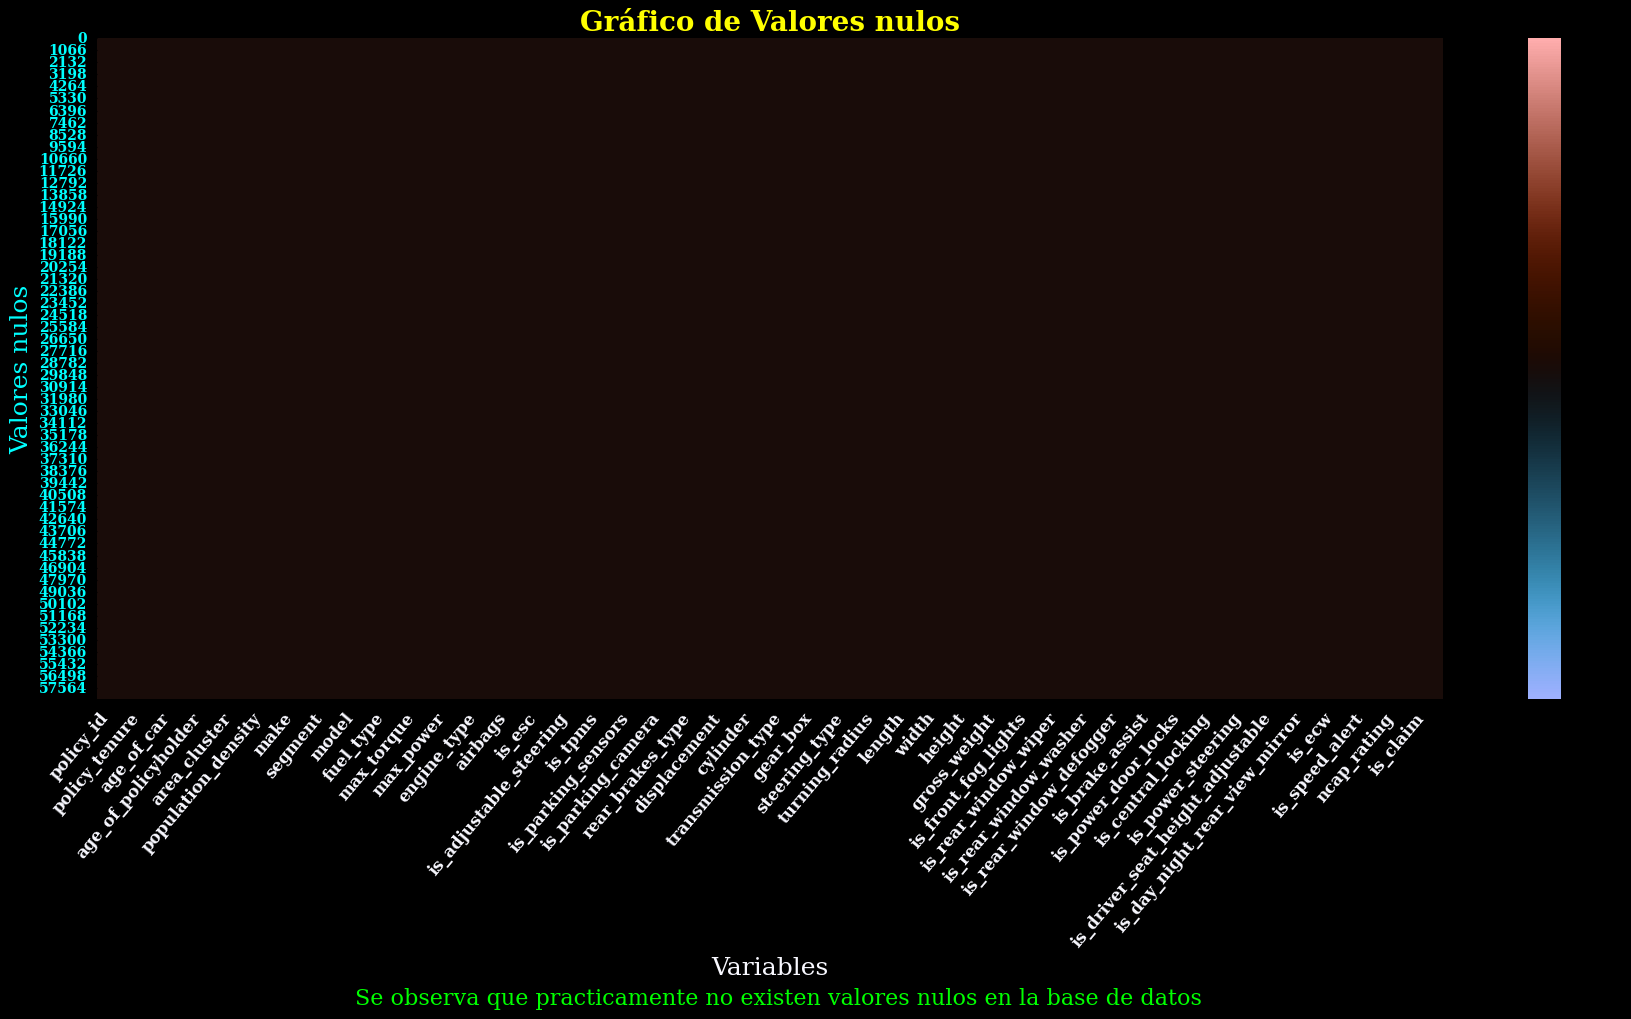

In [ ]:
#Gráfico para visualizar los valores nulos que hay en el dataset
#facecolor-->Color  de fondo
#figsize-->Tamaño del gráfico
plt.figure(figsize=(18,10), facecolor='black')
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Grafico para ver la proporción de valores nulos
sns.heatmap(df.isnull(), cmap='berlin')
# Agregr título
#fontweight='bold'-->Negritas
plt.title('Gráfico de Valores nulos',
          fontsize=20, color='yellow', fontweight='bold')
#Agregar etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='ghostwhite',
           rotation=50, ha='right',fontweight='bold')
plt.yticks(fontsize=10, color='cyan', fontweight='bold')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Variables',fontsize = 18, color = 'ghostwhite')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valores nulos',fontsize = 18, color = 'cyan')
#Agregar la interpretacion de la grafica
plt.figtext(0.2, -0.01, "Se observa que practicamente no existen valores nulos "
            "en la base de datos",
            fontsize = 16, color='lime')
# Mostrar  gráfico
plt.tight_layout()
plt.show()

---
#**EDA (Análisis Exploratorio de Datos)**📊
---

<ipython-input-10-02e4f6d6c30f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafica=sns.countplot(x='age_of_car',data=df,palette='spring',


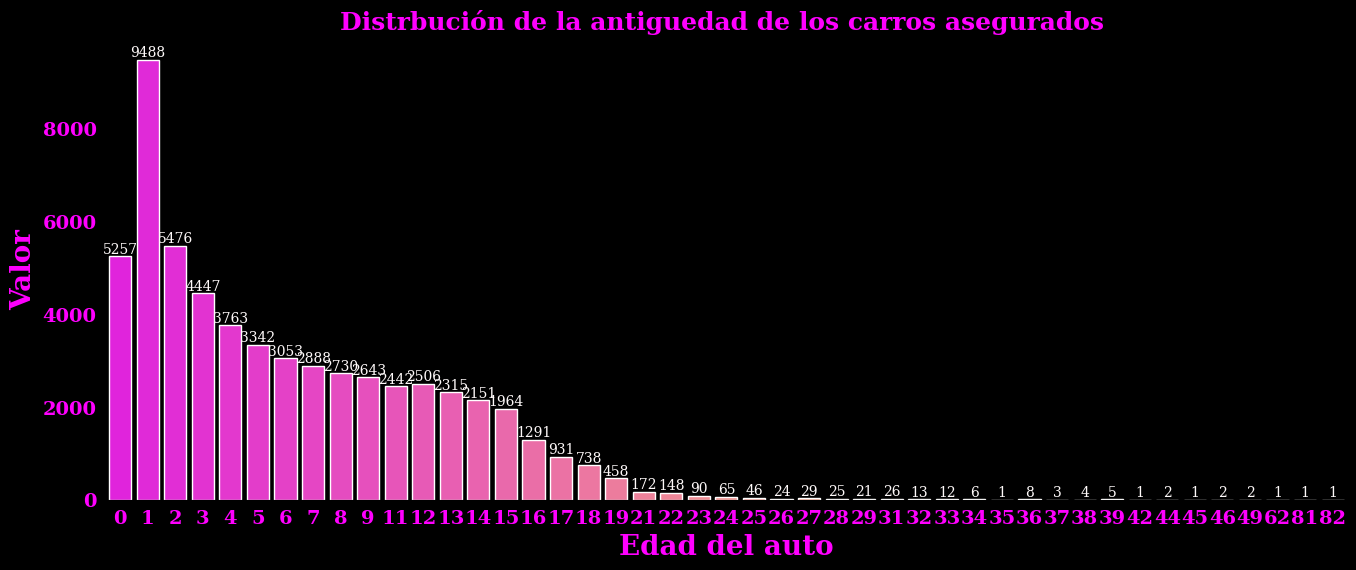

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16,6), facecolor="black")
#Tipo de letra
plt.rcParams['font.family'] = 'DejaVu Serif'
#Revisamos la proporción de reclamos
#x-->Variable a graficar
#data-->Dattos
#color-->Color de las barras
#edgecolor-->Color del borde de las barras
# Creamos una paleta de colores
colors = ['lime', 'red']
#Width-->Grosor de barras
grafica=sns.countplot(x='age_of_car',data=df,palette='spring',
                    edgecolor='white')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Edad del auto',fontsize = 20,
           color = 'magenta',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valor',fontsize = 20,
           color = 'magenta',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='magenta',fontweight='bold')
plt.yticks(fontsize=14, color='magenta',fontweight='bold')
#Agregar el titulo con tamaño y color personalizados
#fontweight='bold'-->Negritas
plt.title('Distrbución de la antiguedad de los carros asegurados ',
          fontsize = 18, color = 'magenta',fontweight='bold')
#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=10,
                      color='snow')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")
# Mostrar el gráfico
plt.show()

<ipython-input-11-199bd2bc9ea1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafica=sns.countplot(x='fuel_type',data=df,palette='ocean'


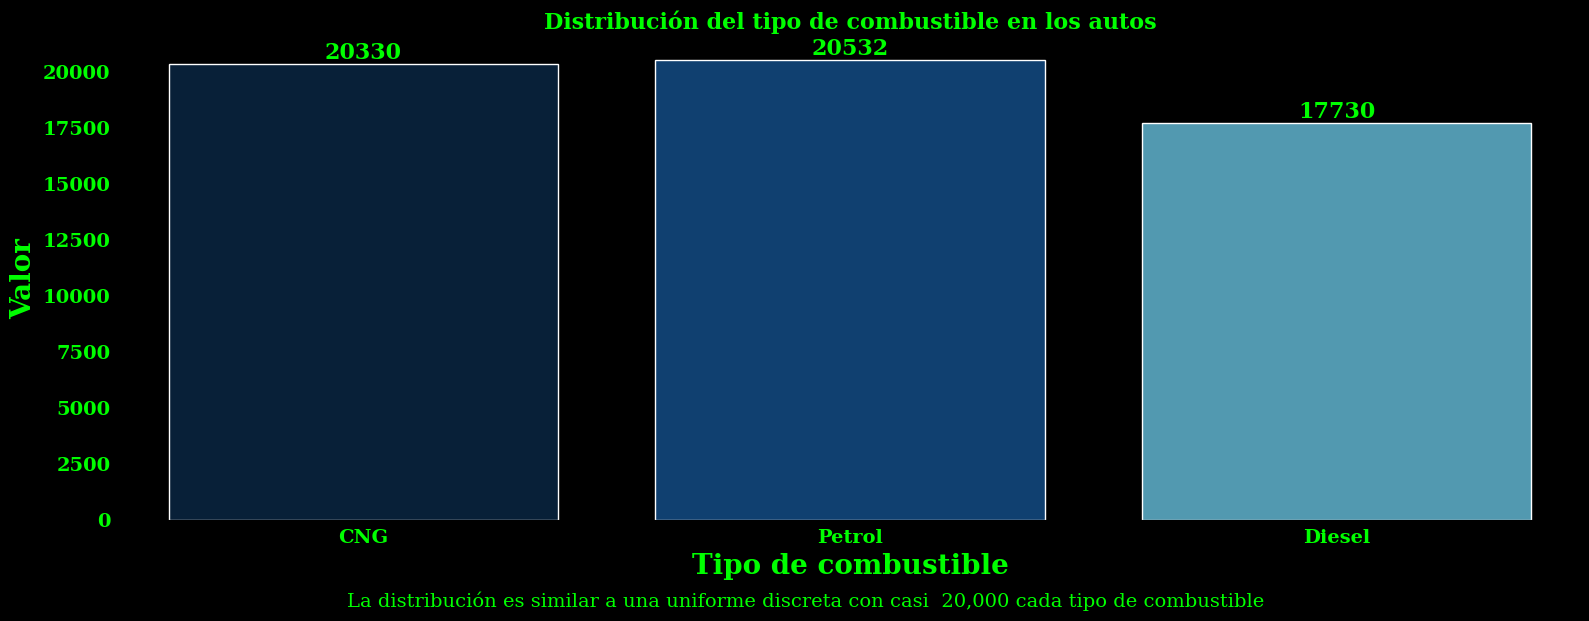

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16, 6), facecolor='black')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Histograma con densidad de Kernel
grafica=sns.countplot(x='fuel_type',data=df,palette='ocean'
                      ,edgecolor='white')

# Personalización del título
plt.title('Distribución del tipo de combustible en los autos',
          fontsize=16, color='lime', fontweight='bold')

# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Tipo de combustible',fontsize = 20,
           color = 'lime',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valor',fontsize = 20,
           color = 'lime',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='lime',fontweight='bold')
plt.yticks(fontsize=14, color='lime',fontweight='bold')

#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=16,
                      color='lime',fontweight='bold')
# facecolor --> Color  de fondo

# Interpretación debajo del gráfico
plt.figtext(0.22, -0.02,
            "La distribución es similar a una uniforme discreta con casi "
            " 20,000 cada tipo de combustible ",
            fontsize=14, color='lime')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")

# Ajustar todo el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<ipython-input-12-5dd65691dc81>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafica=sns.countplot(x='steering_type',data=df,palette='ocean'


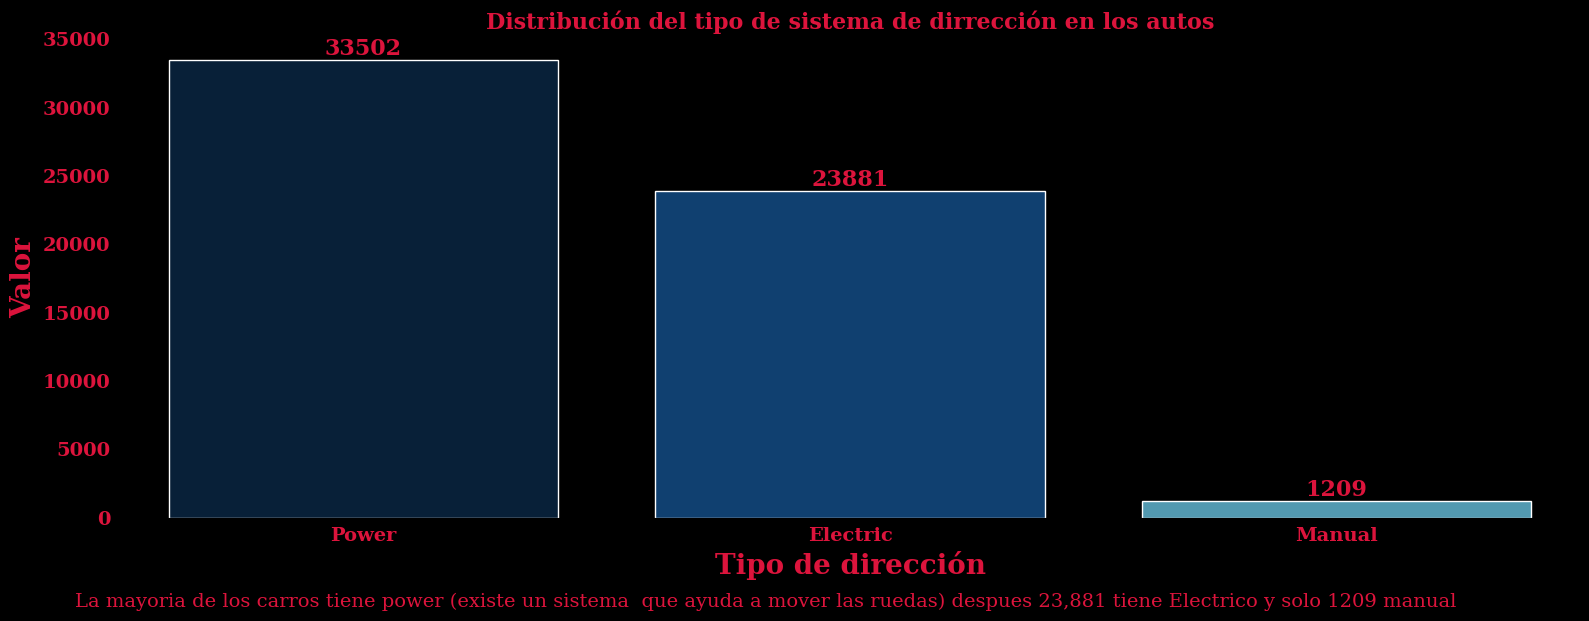

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16, 6), facecolor='black')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Histograma con densidad de Kernel
grafica=sns.countplot(x='steering_type',data=df,palette='ocean'
                      ,edgecolor='white')

# Personalización del título
plt.title('Distribución del tipo de sistema de dirrección en los autos',
          fontsize=16, color='crimson', fontweight='bold')

# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Tipo de dirección',fontsize = 20,
           color = 'crimson',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valor',fontsize = 20,
           color = 'crimson',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='crimson',fontweight='bold')
plt.yticks(fontsize=14, color='crimson',fontweight='bold')

#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=16,
                      color='crimson',fontweight='bold')
# facecolor --> Color  de fondo

# Interpretación debajo del gráfico
plt.figtext(0.05, -0.02,
            "La mayoria de los carros tiene power (existe un sistema "
            " que ayuda a mover las ruedas) despues 23,881 tiene "
            "Electrico y solo 1209 manual" ,
            fontsize=14, color='crimson')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")

# Ajustar todo el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<ipython-input-13-1a2c76392993>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafica=sns.countplot(x='ncap_rating',data=df,palette='autumn'


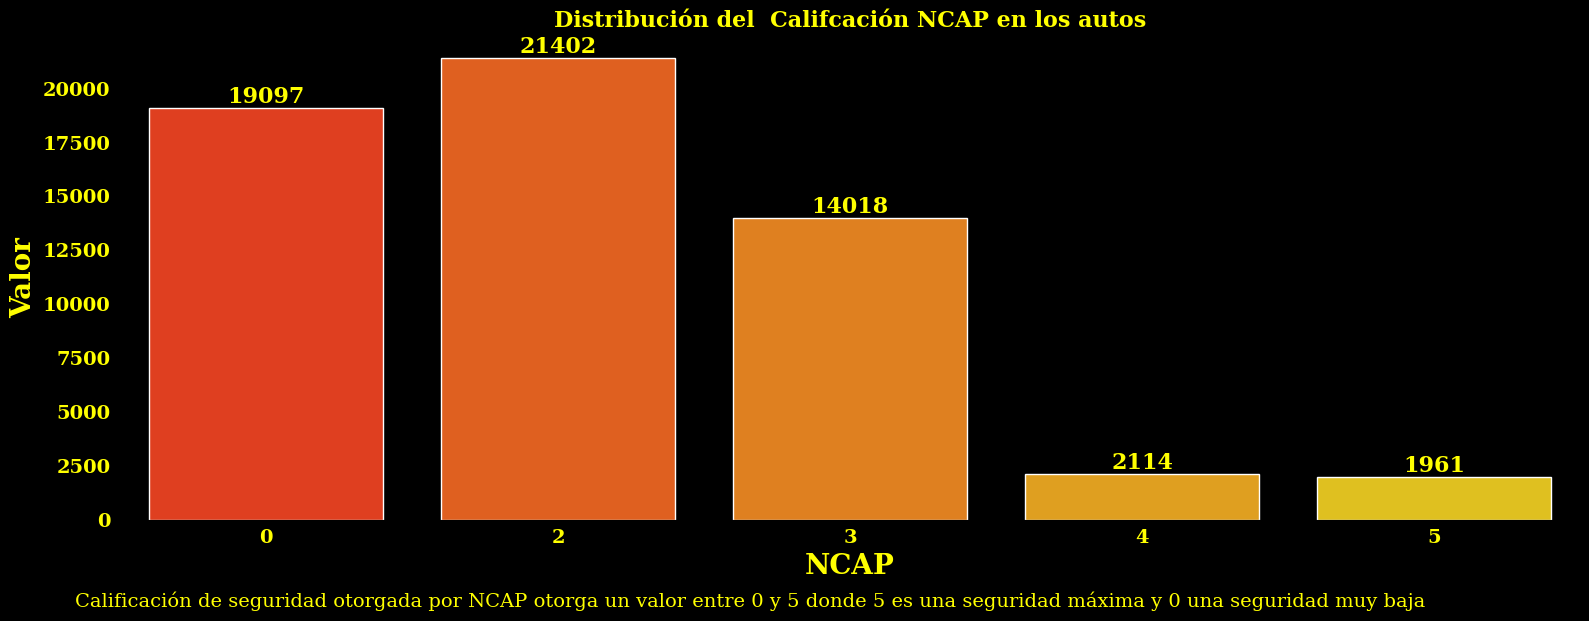

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16, 6), facecolor='black')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Histograma con densidad de Kernel
grafica=sns.countplot(x='ncap_rating',data=df,palette='autumn'
                      ,edgecolor='white')

# Personalización del título
plt.title('Distribución del  Califcación NCAP en los autos',
          fontsize=16, color='yellow', fontweight='bold')

# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('NCAP',fontsize = 20,
           color = 'yellow',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valor',fontsize = 20,
           color = 'yellow',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='yellow',fontweight='bold')
plt.yticks(fontsize=14, color='yellow',fontweight='bold')

#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=16,
                      color='yellow',fontweight='bold')
# facecolor --> Color  de fondo

# Interpretación debajo del gráfico
plt.figtext(0.05, -0.02,
            "Calificación de seguridad otorgada por NCAP "
            "otorga un valor entre 0 y 5 donde 5 es una seguridad "
            "máxima y 0 una seguridad muy baja ",
            fontsize=14, color='yellow')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")

# Ajustar todo el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

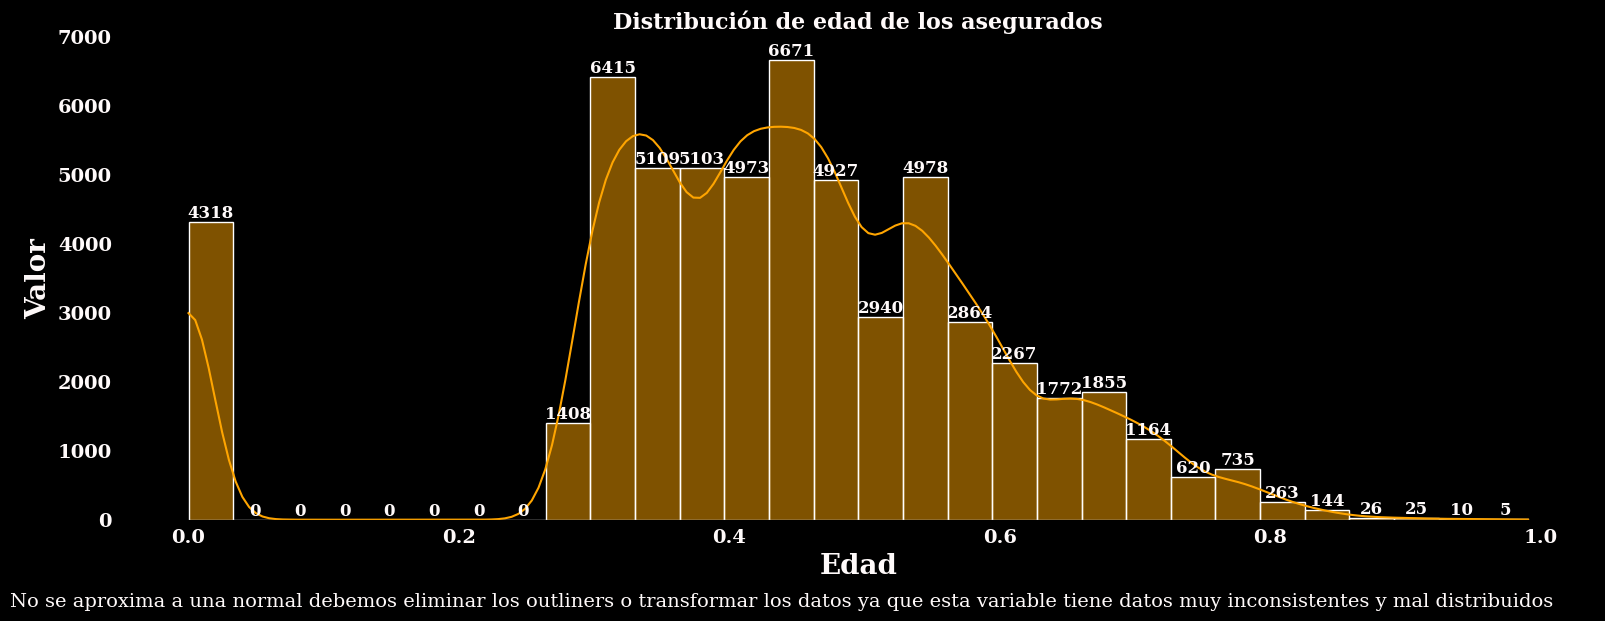

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16, 6), facecolor='black')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Histograma con densidad de Kernel
grafica=sns.histplot(df['age_of_policyholder'], kde=True,
                     bins=30, color='orange',edgecolor='white')

# Personalización del título
plt.title('Distribución de edad de los asegurados',
          fontsize=16, color='snow', fontweight='bold')

# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Edad',fontsize = 20,
           color = 'snow',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valor',fontsize = 20,
           color = 'snow',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='snow',fontweight='bold')
plt.yticks(fontsize=14, color='snow',fontweight='bold')

#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=12,
                      color='snow',fontweight='bold')
# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "No se aproxima a una normal "
            "debemos eliminar los outliners "
            "o transformar los datos ya que esta variable tiene datos "
            "muy inconsistentes y mal distribuidos",
            fontsize=14, color='snow')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")

# Ajustar todo el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

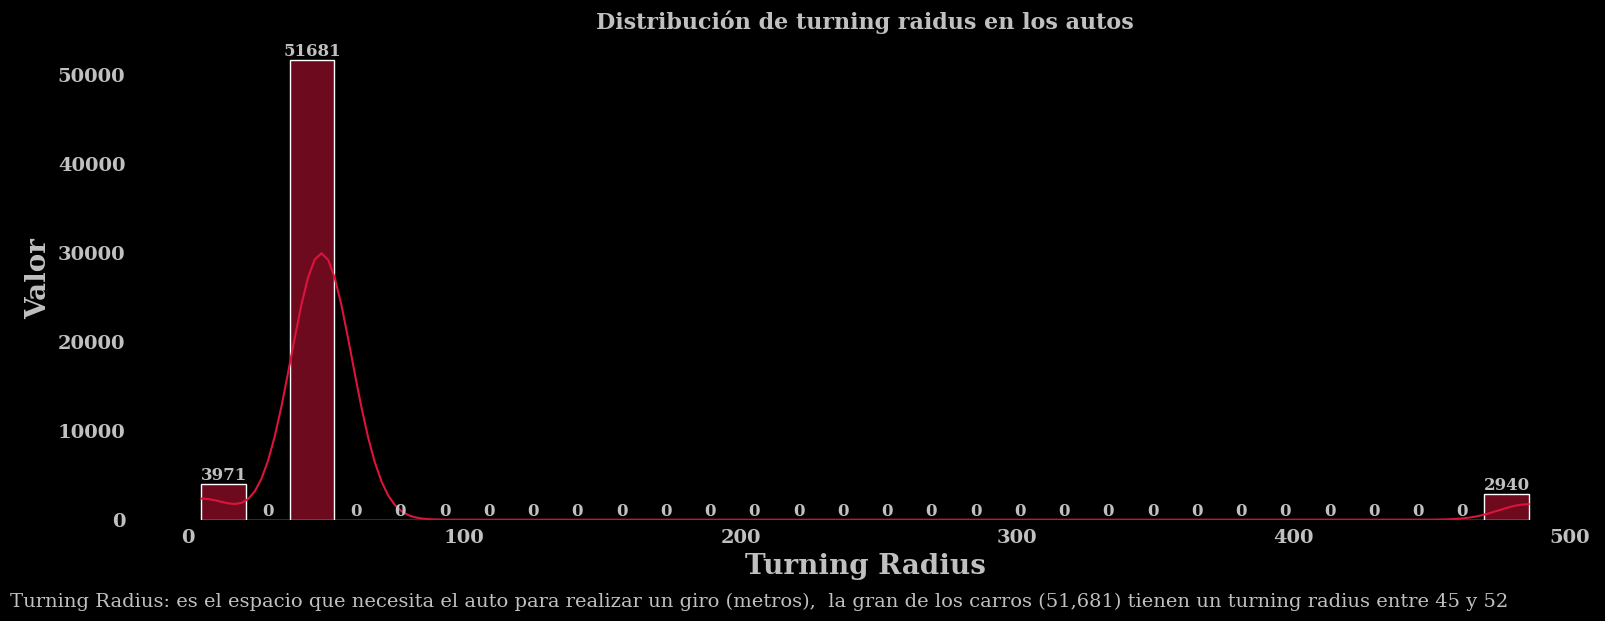

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16, 6), facecolor='black')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Histograma con densidad de Kernel
grafica=sns.histplot(df['turning_radius'], kde=True,
                     bins=30, color='crimson',edgecolor='white')

# Personalización del título
plt.title('Distribución de turning raidus en los autos',
          fontsize=16, color='silver', fontweight='bold')

# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Turning Radius',fontsize = 20,
           color = 'silver',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valor',fontsize = 20,
           color = 'silver',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='silver',fontweight='bold')
plt.yticks(fontsize=14, color='silver',fontweight='bold')

#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=12,
                      color='silver',fontweight='bold')
# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "Turning Radius: es el espacio "
            "que necesita el auto para realizar un giro (metros),  "
            "la gran de los carros (51,681) "
            "tienen un turning radius entre 45 y 52",
            fontsize=14, color='silver')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")

# Ajustar todo el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

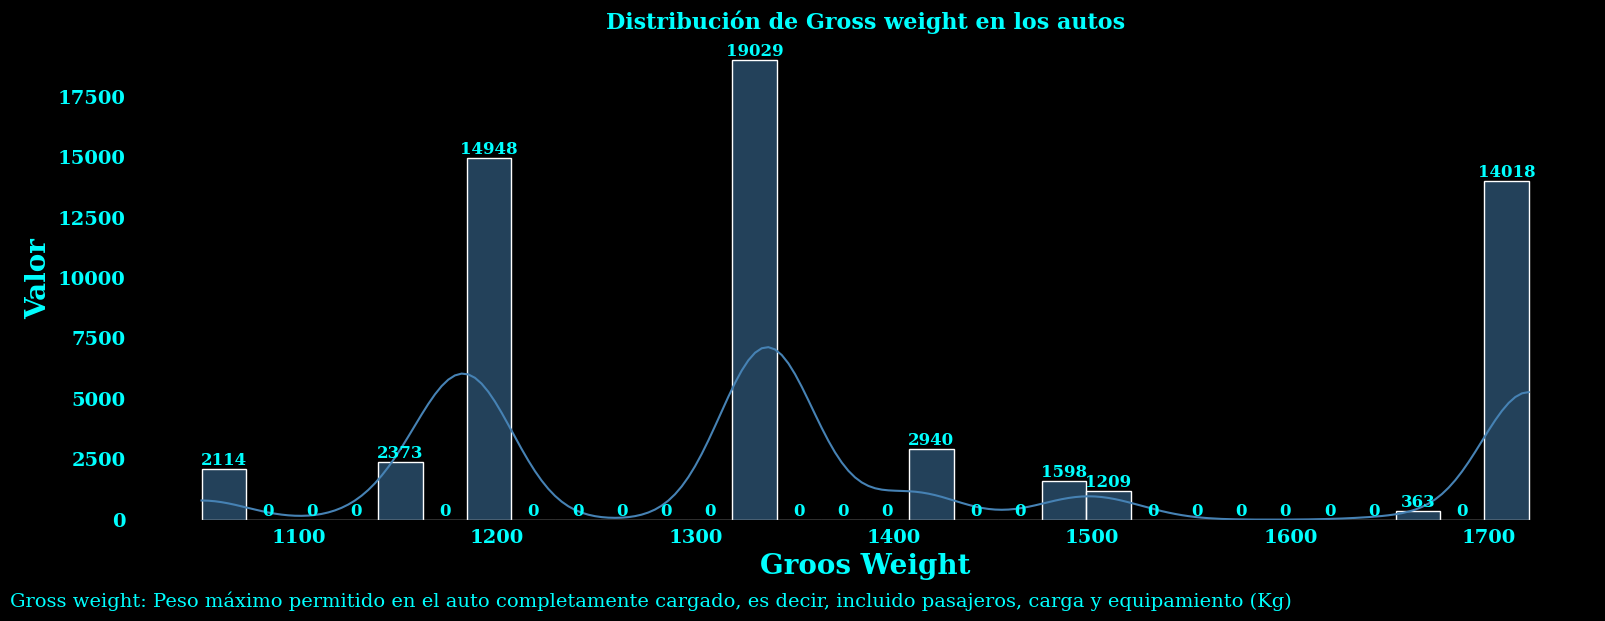

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16, 6), facecolor='black')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Histograma con densidad de Kernel
grafica=sns.histplot(df['gross_weight'], kde=True,
                     bins=30, color='steelblue',edgecolor='white')

# Personalización del título
plt.title('Distribución de Gross weight en los autos',
          fontsize=16, color='cyan', fontweight='bold')

# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Groos Weight',fontsize = 20,
           color = 'cyan',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valor',fontsize = 20,
           color = 'cyan',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='cyan',fontweight='bold')
plt.yticks(fontsize=14, color='cyan',fontweight='bold')

#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=12,
                      color='cyan',fontweight='bold')
# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "Gross weight: Peso máximo permitido en el "
            "auto completamente cargado, es decir, "
            "incluido pasajeros, carga y "
            "equipamiento (Kg) ",
            fontsize=14, color='cyan')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")

# Ajustar todo el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

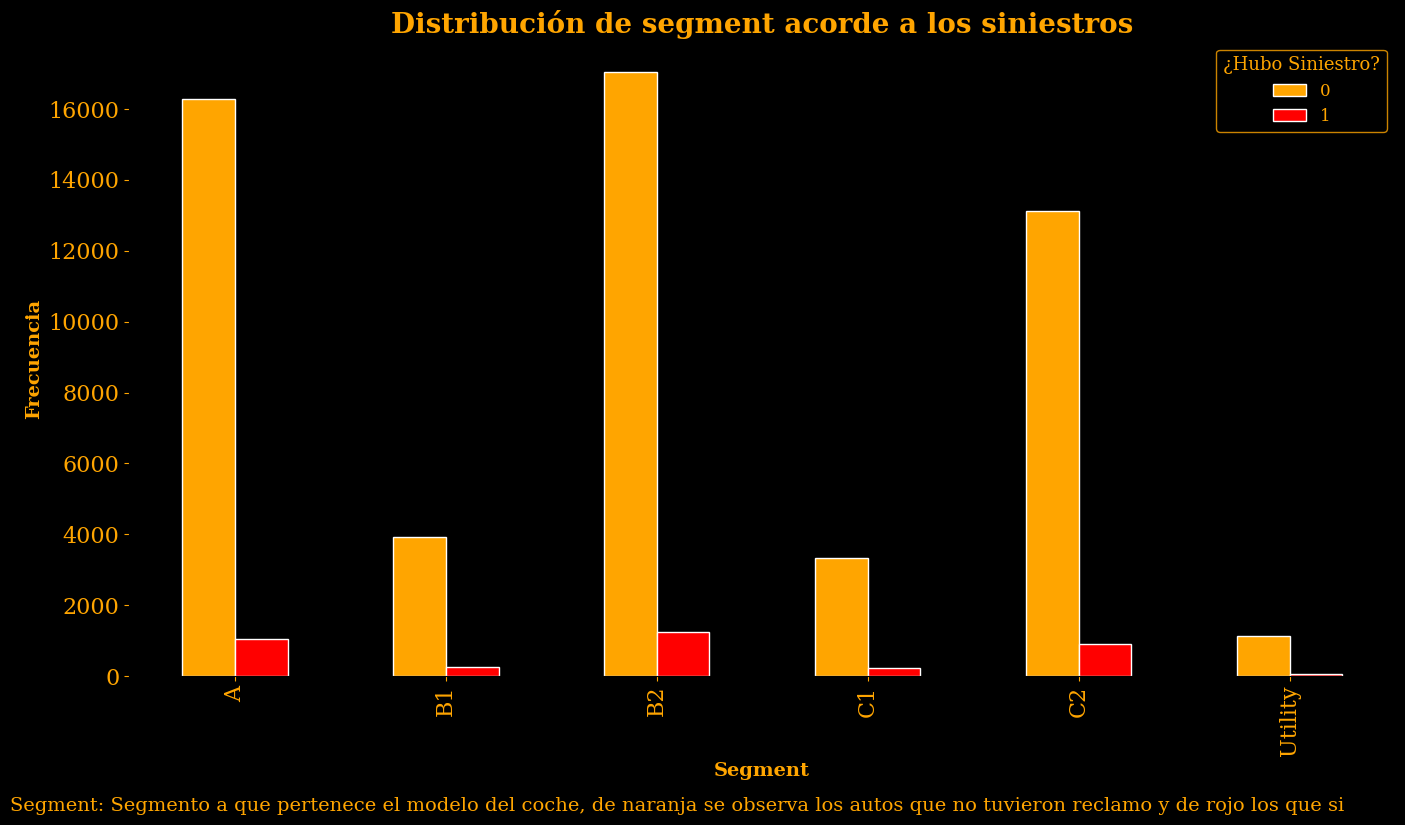

In [ ]:
#Grafica
grafica = pd.crosstab(df['segment'], df['is_claim'])

# Crear la gráfica y guardar el objeto de los ejes
ax = grafica.plot(kind='bar', color=['orange', 'red'], edgecolor='white',
                  figsize=(14,8), legend=True)

# Fondo negro en el área de los ejes y en toda la figura
ax.set_facecolor('black')
ax.figure.set_facecolor('black')

# Título y etiquetas
ax.set_title('Distribución de segment acorde a los siniestros',
             fontsize=20, color='orange', fontweight='bold')
ax.set_xlabel('Segment', fontsize=14, color='orange', fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=14, color='orange', fontweight='bold')

# Cambiar color de los ticks
ax.tick_params(axis='x',labelsize=16 ,colors='orange')
ax.tick_params(axis='y',labelsize=16 ,colors='orange')

# Cambiar colores de los bordes de la leyenda y el texto
legend = ax.legend(title='¿Hubo Siniestro?', title_fontsize=13,
                   fontsize=12, labelcolor='orange')
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('orange')
for text in legend.get_texts():
    text.set_color('orange')
legend.get_title().set_color('orange')

# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "Segment: Segmento a que pertenece el modelo "
            "del coche, "
            "de naranja se observa los autos que no tuvieron "
            "reclamo y de rojo los que si",
            fontsize=14, color='orange')

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()


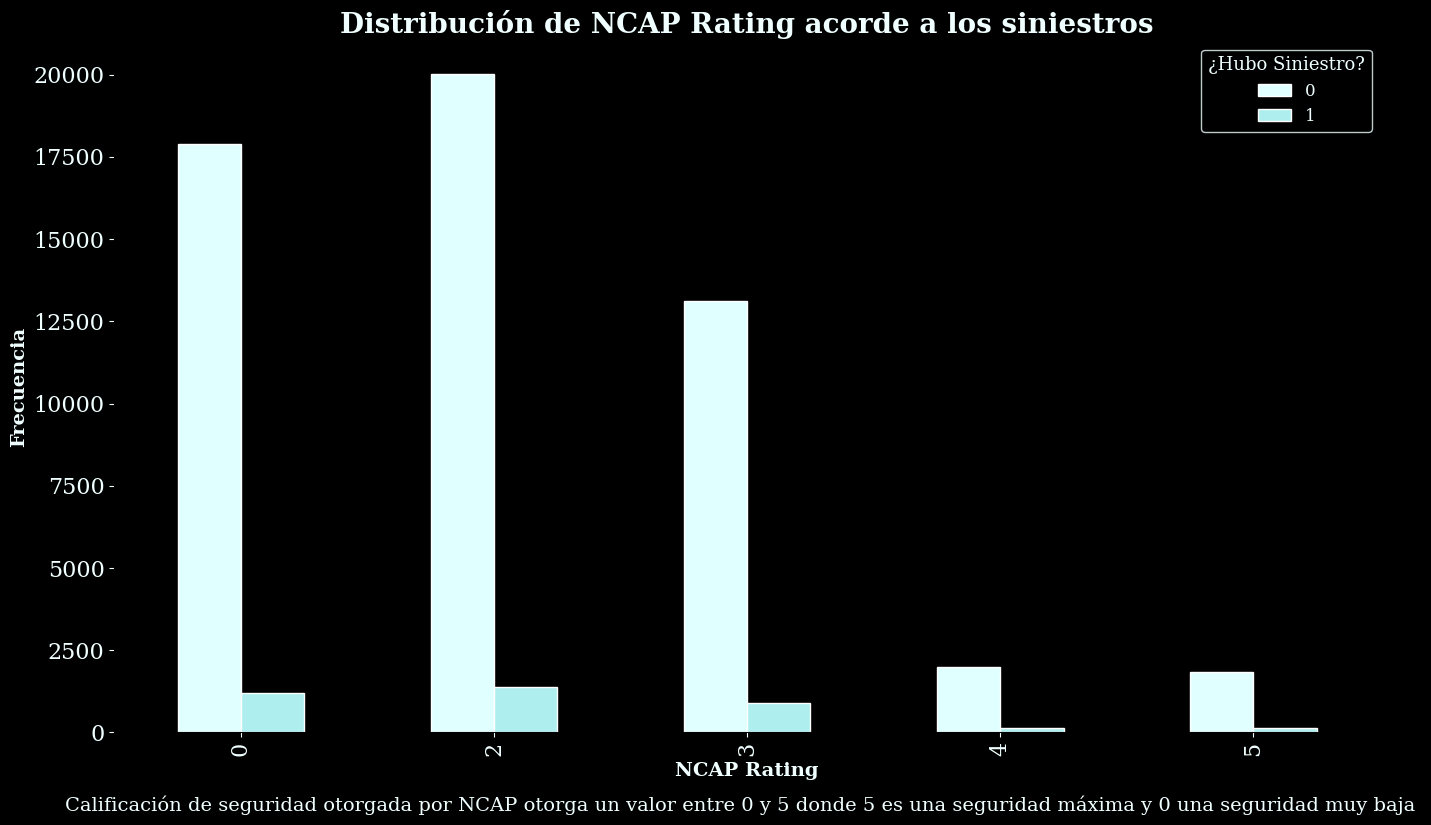

In [ ]:
# Grafica
grafica = pd.crosstab(df['ncap_rating'], df['is_claim'])

# Crear la gráfica y guardar el objeto de los ejes
ax = grafica.plot(kind='bar', color=['lightcyan','paleturquoise'],
                  edgecolor='white',
                  figsize=(14,8), legend=True)

# Fondo negro
ax.set_facecolor('black')
ax.figure.set_facecolor('black')
# Título y etiquetas
ax.set_title('Distribución de NCAP Rating acorde a los siniestros',
             fontsize=20, color='azure', fontweight='bold')
ax.set_xlabel('NCAP Rating', fontsize=14, color='azure', fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=14, color='azure', fontweight='bold')

# Cambiar color de los ticks
ax.tick_params(axis='x',labelsize=16 ,colors='azure')
ax.tick_params(axis='y',labelsize=16 ,colors='azure')

# Cambiar colores de los bordes de la leyenda y el texto
legend = ax.legend(title='¿Hubo Siniestro?', title_fontsize=13,
                   fontsize=12, labelcolor='azure')
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('azure')
for text in legend.get_texts():
    text.set_color('azure')
legend.get_title().set_color('azure')

# Interpretación debajo del gráfico
plt.figtext(0.05, -0.02,
            "Calificación de seguridad otorgada por NCAP "
            "otorga un valor entre 0 y 5 donde 5 es una seguridad "
            "máxima y 0 una seguridad muy baja ",
            fontsize=14, color='azure')

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

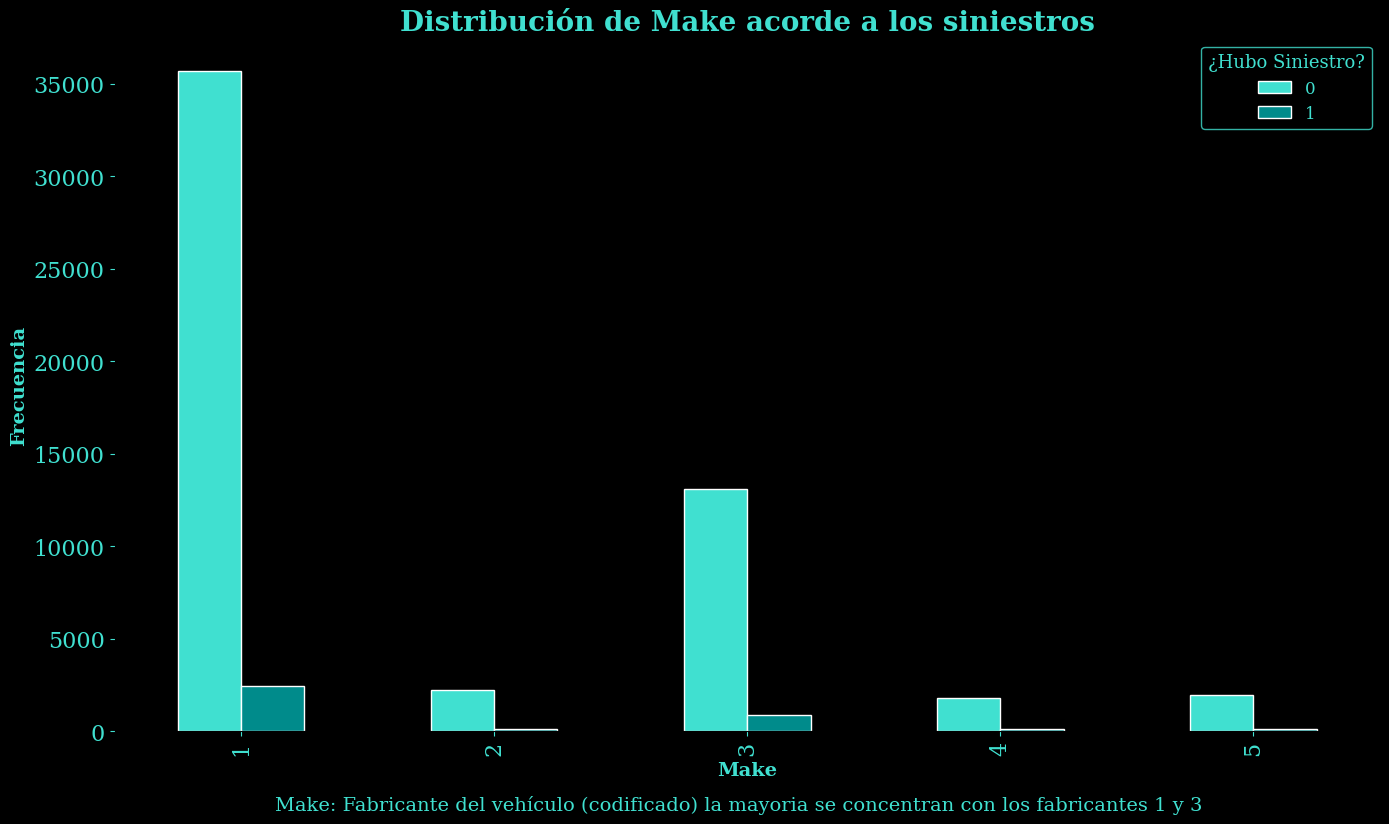

In [ ]:
# Grafica
grafica = pd.crosstab(df['make'], df['is_claim'])

# Crear la gráfica y guardar el objeto de los ejes
ax = grafica.plot(kind='bar', color=['turquoise','darkcyan'],
                  edgecolor='white',
                  figsize=(14,8), legend=True)

# Fondo negro
ax.set_facecolor('black')
ax.figure.set_facecolor('black')
# Título y etiquetas
ax.set_title('Distribución de Make acorde a los siniestros',
             fontsize=20, color='turquoise', fontweight='bold')
ax.set_xlabel('Make', fontsize=14, color='turquoise', fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=14, color='turquoise', fontweight='bold')

# Cambiar color de los ticks
ax.tick_params(axis='x',labelsize=16 ,colors='turquoise')
ax.tick_params(axis='y',labelsize=16 ,colors='turquoise')

# Cambiar colores de los bordes de la leyenda y el texto
legend = ax.legend(title='¿Hubo Siniestro?', title_fontsize=13,
                   fontsize=12, labelcolor='turquoise')
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('turquoise')
for text in legend.get_texts():
    text.set_color('turquoise')
legend.get_title().set_color('turquoise')

# Interpretación debajo del gráfico
plt.figtext(0.20, -0.02,
            "Make: Fabricante del vehículo (codificado) "
            "la mayoria se concentran con los "
            "fabricantes 1 y 3"
            ,
            fontsize=14, color='turquoise')

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

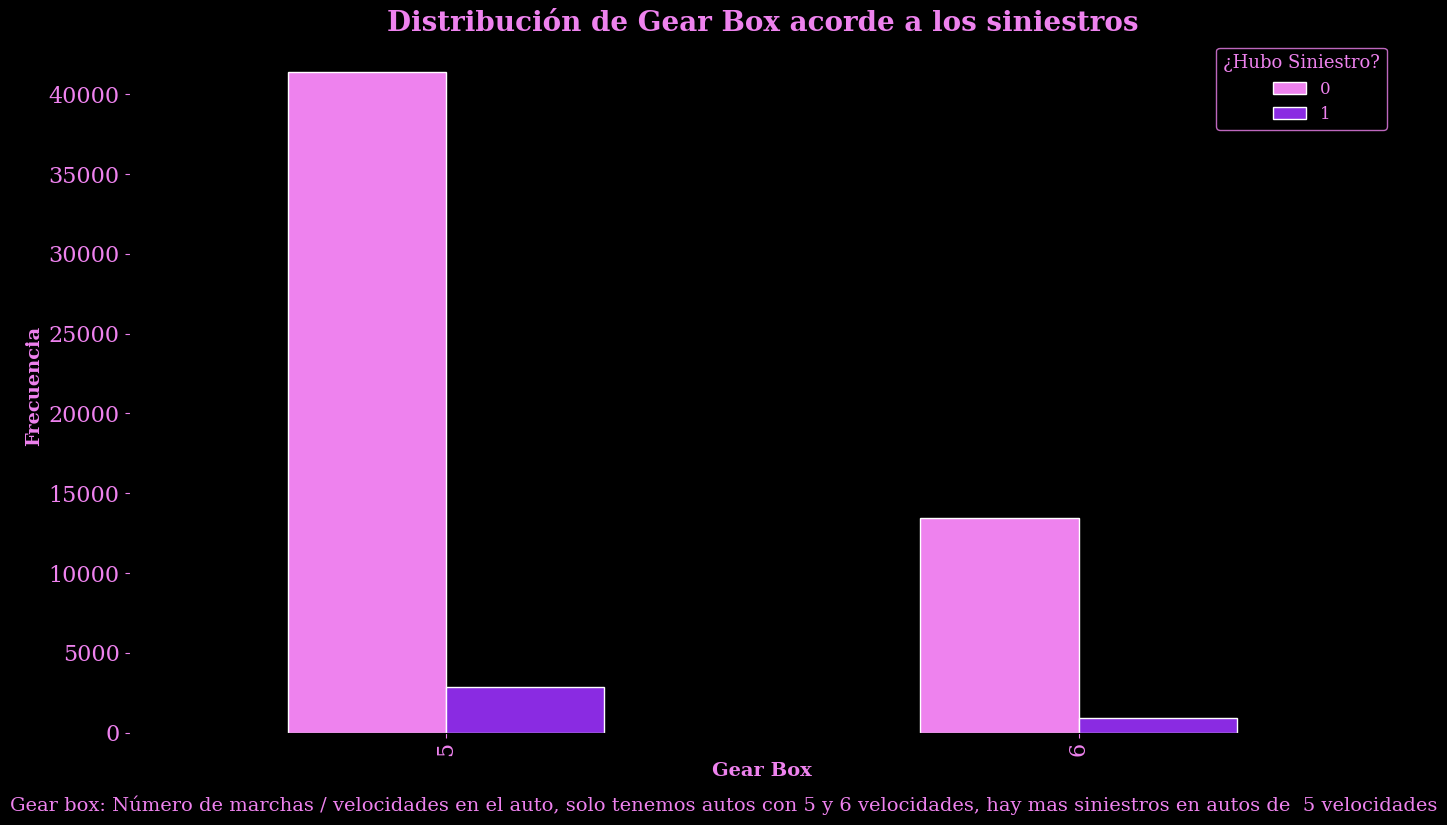

In [ ]:
# Grafica
grafica = pd.crosstab(df['gear_box'], df['is_claim'])

# Crear la gráfica y guardar el objeto de los ejes
ax = grafica.plot(kind='bar', color=['violet','blueviolet'],
                  edgecolor='white',
                  figsize=(14,8), legend=True)

# Fondo negro
ax.set_facecolor('black')
ax.figure.set_facecolor('black')
# Título y etiquetas
ax.set_title('Distribución de Gear Box acorde a los siniestros',
             fontsize=20, color='violet', fontweight='bold')
ax.set_xlabel('Gear Box', fontsize=14, color='violet', fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=14, color='violet', fontweight='bold')

# Cambiar color de los ticks
ax.tick_params(axis='x',labelsize=16 ,colors='violet')
ax.tick_params(axis='y',labelsize=16 ,colors='violet')

# Cambiar colores de los bordes de la leyenda y el texto
legend = ax.legend(title='¿Hubo Siniestro?', title_fontsize=13,
                   fontsize=12, labelcolor='violet')
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('violet')
for text in legend.get_texts():
    text.set_color('violet')
legend.get_title().set_color('violet')

# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "Gear box: Número de marchas / velocidades en "
            "el auto, solo tenemos autos con 5 y 6 "
            "velocidades, hay mas siniestros en autos de "
            " 5 velocidades",
            fontsize=14, color='violet')

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

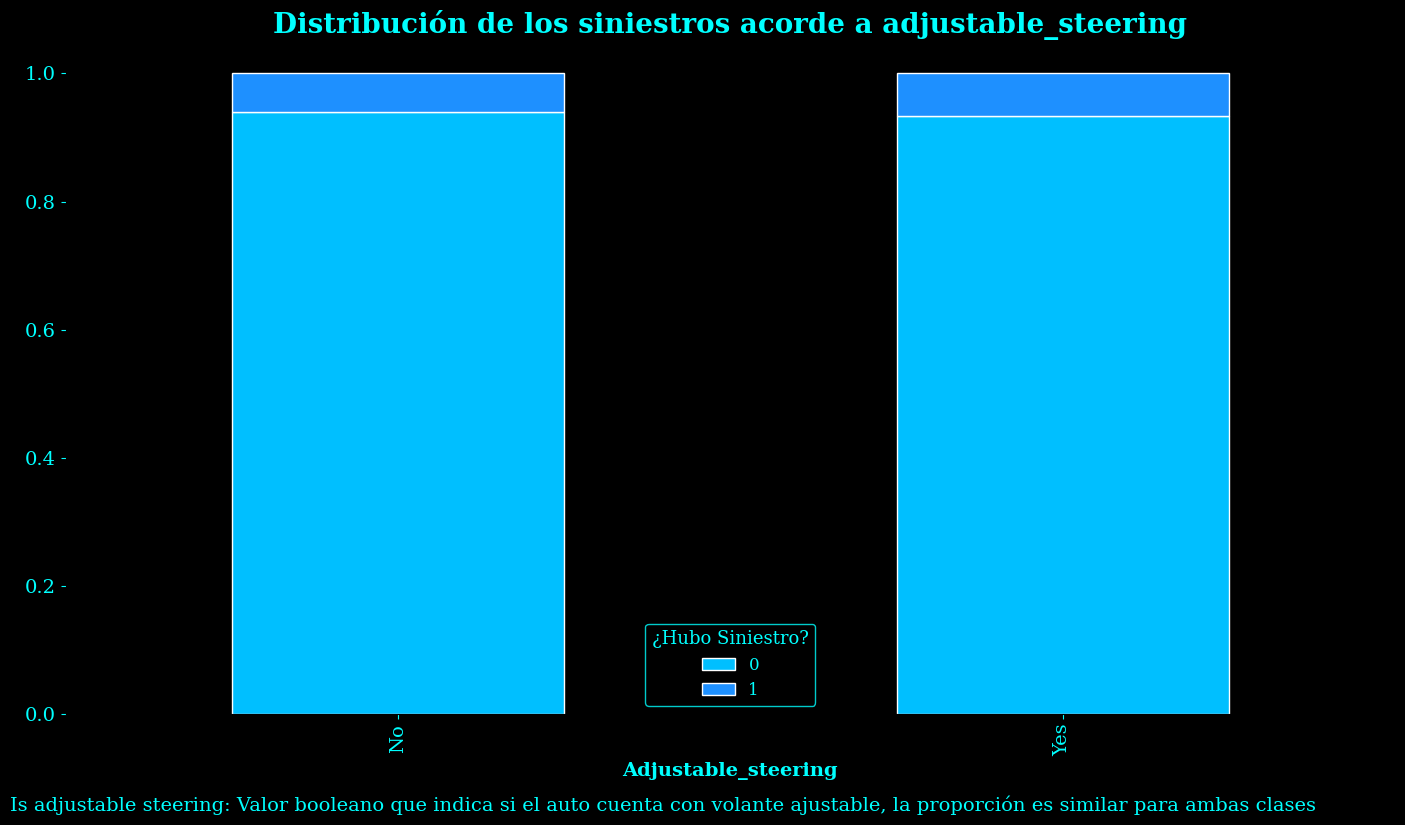

In [ ]:
# Grafica normalizada
grafica = pd.crosstab(df['is_adjustable_steering'], df['is_claim'])
grafica_normalizada = grafica.div(grafica.sum(1).astype(float), axis=0)

# Crear la gráfica y guardar el objeto de los ejes
ax = grafica_normalizada.plot(kind='bar', stacked=True,
                              color=['deepskyblue', 'dodgerblue'],
                              edgecolor='white', figsize=(14,8))

# Fondo negro
ax.set_facecolor('black')
ax.figure.set_facecolor('black')

# Título y etiquetas
ax.set_title('Distribución de los siniestros acorde a adjustable_steering',
             fontsize=20, color='cyan', fontweight='bold')
ax.set_xlabel('Adjustable_steering', fontsize=14,
              color='cyan', fontweight='bold')
# Cambiar color de los ticks
ax.tick_params(axis='x', labelsize=14,colors='cyan')
ax.tick_params(axis='y', labelsize=14,colors='cyan')

# Cambiar colores de los bordes de la leyenda y el texto
legend = ax.legend(title='¿Hubo Siniestro?', title_fontsize=13,
                   fontsize=12, labelcolor='cyan')
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('cyan')
for text in legend.get_texts():
    text.set_color('cyan')
legend.get_title().set_color('cyan')

# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "Is adjustable steering: Valor booleano "
            "que indica si el auto cuenta "
            "con volante ajustable, "
            "la proporción es similar "
            "para ambas clases ",
            fontsize=14, color='cyan')

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

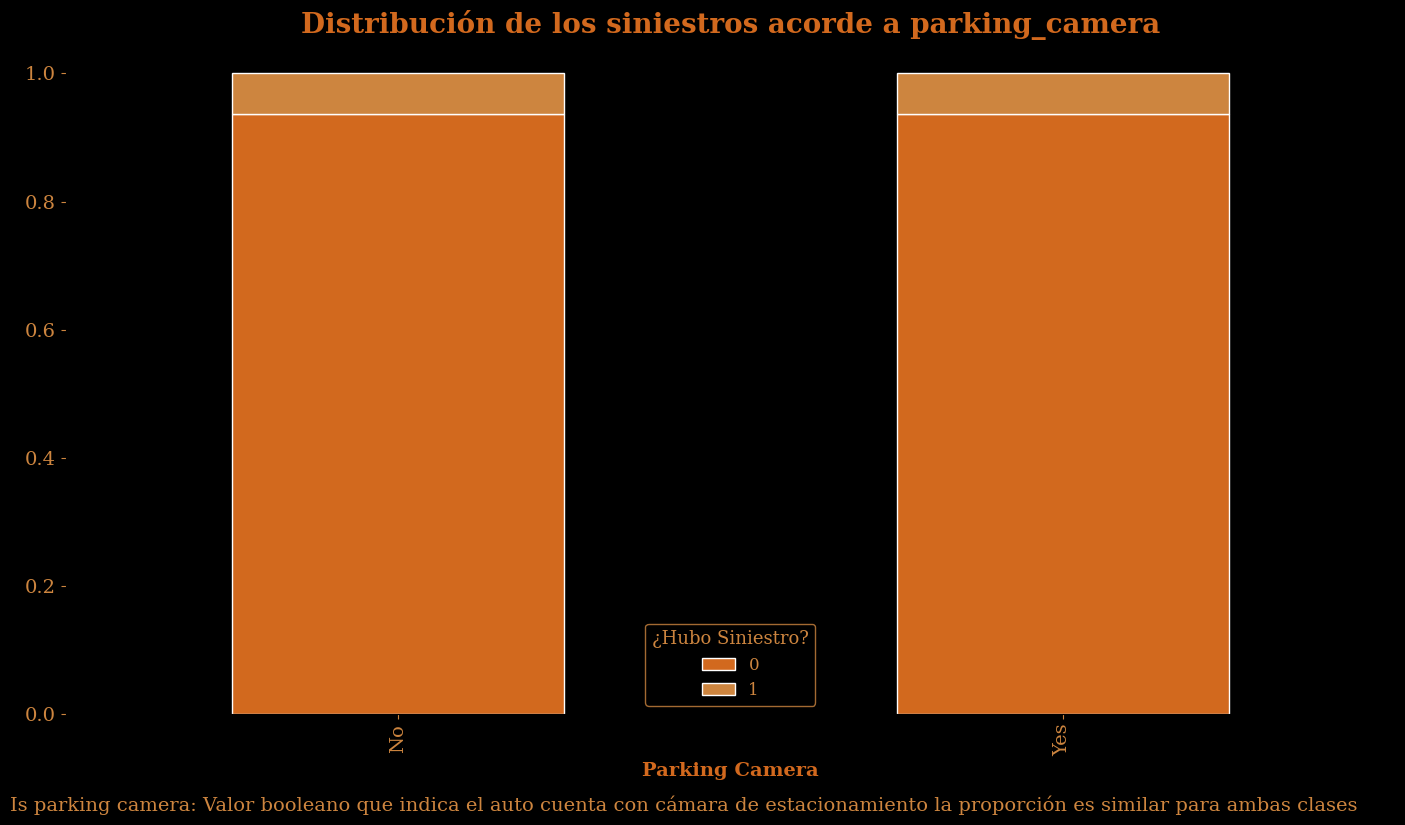

In [ ]:
# Grafica normalizada
grafica = pd.crosstab(df['is_parking_camera'], df['is_claim'])
grafica_normalizada = grafica.div(grafica.sum(1).astype(float), axis=0)

# Crear la gráfica y guardar el objeto de los ejes
ax = grafica_normalizada.plot(kind='bar', stacked=True,
                              color=['chocolate', 'peru'],
                              edgecolor='white', figsize=(14,8))

# Fondo negro
ax.set_facecolor('black')
ax.figure.set_facecolor('black')

# Título y etiquetas
ax.set_title('Distribución de los siniestros acorde a parking_camera',
             fontsize=20, color='chocolate', fontweight='bold')
ax.set_xlabel('Parking Camera', fontsize=14,
              color='chocolate', fontweight='bold')
# Cambiar color de los ticks
ax.tick_params(axis='x', labelsize=14,colors='peru')
ax.tick_params(axis='y', labelsize=14,colors='peru')

# Cambiar colores de los bordes de la leyenda y el texto
legend = ax.legend(title='¿Hubo Siniestro?', title_fontsize=13,
                   fontsize=12, labelcolor='peru')
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('peru')
for text in legend.get_texts():
    text.set_color('peru')
legend.get_title().set_color('peru')

# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "Is parking camera: Valor booleano que "
            "indica el auto cuenta con cámara de estacionamiento "
            "la proporción es similar "
            "para ambas clases ",
            fontsize=14, color='peru')

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

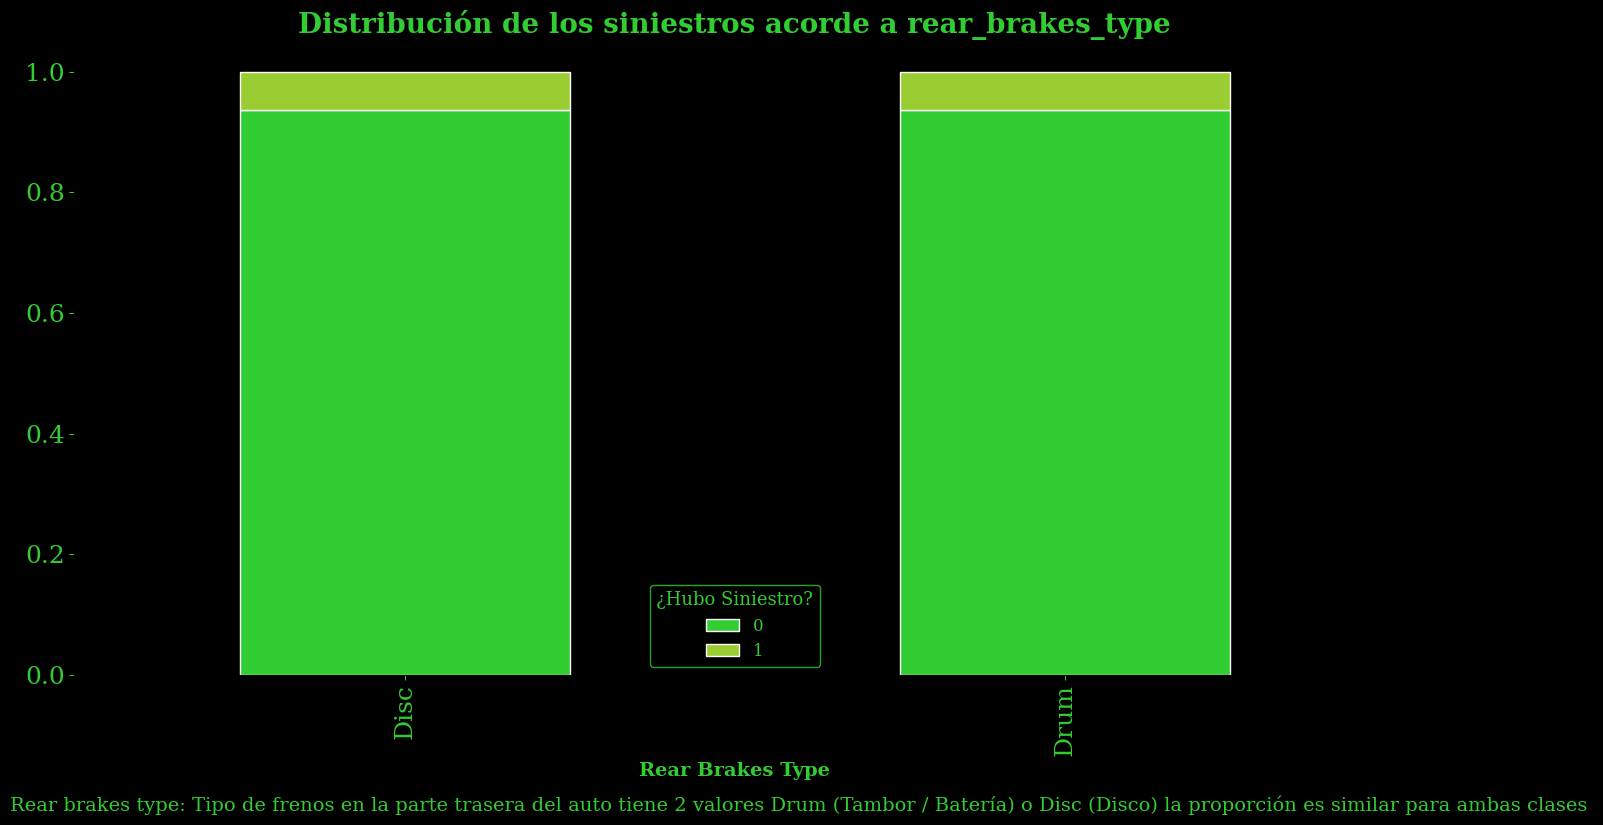

In [ ]:
# Grafica normalizada
grafica = pd.crosstab(df['rear_brakes_type'], df['is_claim'])
grafica_normalizada = grafica.div(grafica.sum(1).astype(float), axis=0)

# Crear la gráfica y guardar el objeto de los ejes
ax = grafica_normalizada.plot(kind='bar', stacked=True,
                              color=['limegreen', 'yellowgreen'],
                              edgecolor='white', figsize=(14,8))

# Fondo negro
ax.set_facecolor('black')
ax.figure.set_facecolor('black')

# Título y etiquetas
ax.set_title('Distribución de los siniestros acorde a rear_brakes_type',
             fontsize=20, color='limegreen', fontweight='bold')
ax.set_xlabel('Rear Brakes Type', fontsize=14,
              color='limegreen', fontweight='bold')
# Cambiar color de los ticks
ax.tick_params(axis='x',labelsize=18, colors='limegreen')
ax.tick_params(axis='y',labelsize=18, colors='limegreen')

# Cambiar colores de los bordes de la leyenda y el texto
legend = ax.legend(title='¿Hubo Siniestro?', title_fontsize=13,
                   fontsize=12, labelcolor='limegreen')
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('limegreen')
for text in legend.get_texts():
    text.set_color('limegreen')
legend.get_title().set_color('limegreen')

# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "Rear brakes type: Tipo de frenos en "
            "la parte trasera del auto tiene 2 valores "
            "Drum (Tambor / Batería) o Disc (Disco) "
            "la proporción es similar "
            "para ambas clases ",
            fontsize=14, color='limegreen')

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

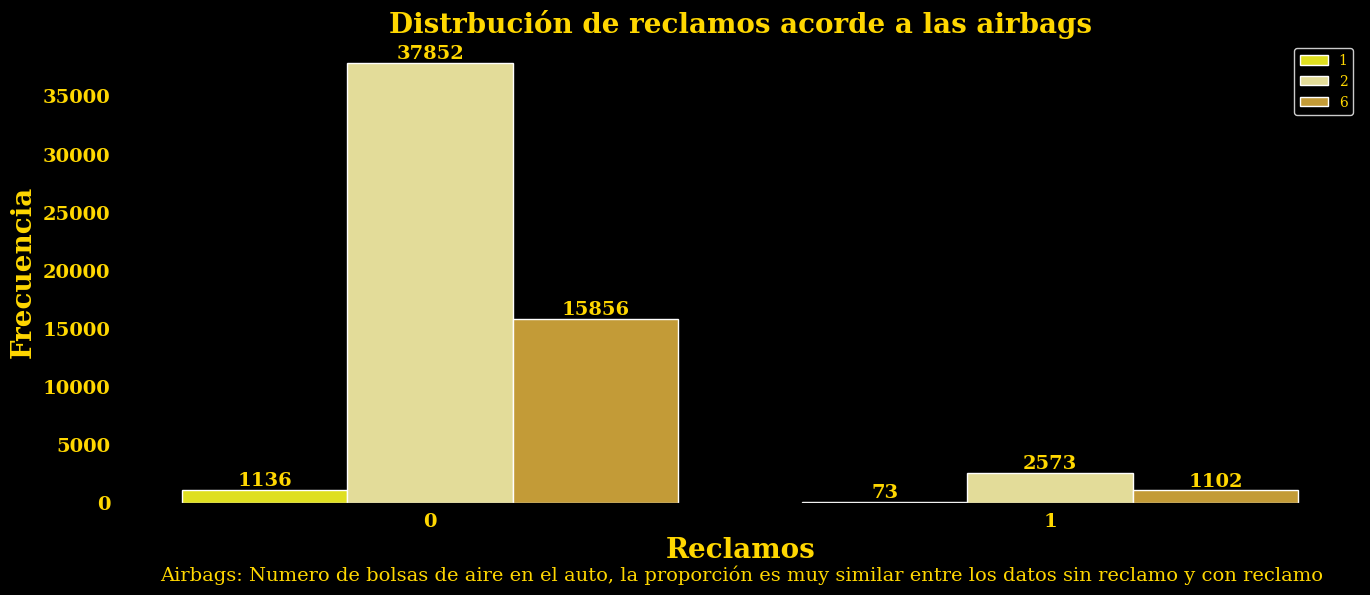

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16,6), facecolor="black")
#Tipo de letra
plt.rcParams['font.family'] = 'DejaVu Serif'
#Revisamos la proporción de reclamos
#x-->Variable a graficar
#data-->Dattos
#color-->Color de las barras
#edgecolor-->Color del borde de las barras
# Creamos una paleta de colores
colors = ['yellow', 'khaki','goldenrod']
#Width-->Grosor de barras
grafica=sns.countplot(x='is_claim',data=df, hue='airbags',
                      palette=colors,edgecolor='white')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Reclamos',fontsize = 20,
           color = 'gold',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Frecuencia',fontsize = 20,
           color = 'gold',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='gold',fontweight='bold')
plt.yticks(fontsize=14, color='gold',fontweight='bold')
#Agregar el titulo con tamaño y color personalizados
#fontweight='bold'-->Negritas
plt.title('Distrbución de reclamos acorde a las airbags',fontsize = 20,
          color = 'gold',fontweight='bold')
#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=14,
                      color='gold',fontweight='bold')
#Etiquetas para el parametro hue personalizados
plt.legend(
           facecolor='black',
           edgecolor='white',
           labelcolor='gold',
           title_fontsize=12)

# Interpretación debajo del gráfico
plt.figtext(0.15, -0.02,
            "Airbags: Numero de bolsas de aire en el auto, "
            "la proporción es muy similar entre los datos sin reclamo "
            "y con reclamo",
            fontsize=14, color='gold')

# facecolor --> Color  de fondo
grafica.set_facecolor("black")
# Mostrar el gráfico
plt.show()

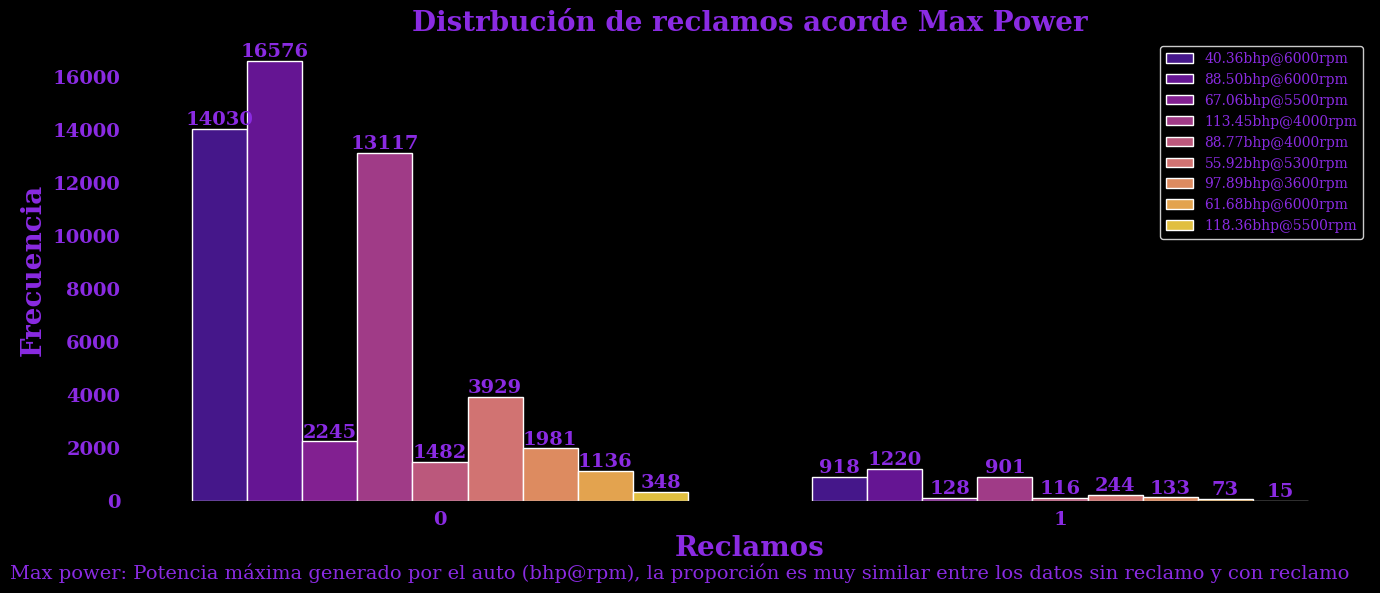

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16,6), facecolor="black")
#Tipo de letra
plt.rcParams['font.family'] = 'DejaVu Serif'
#Revisamos la proporción de reclamos
#x-->Variable a graficar
#data-->Dattos
#color-->Color de las barras
#edgecolor-->Color del borde de las barras
# Creamos una paleta de colores
colors = ['lime', 'red','orange']
#Width-->Grosor de barras
grafica=sns.countplot(x='is_claim',data=df, hue='max_power',
                      palette='plasma' ,edgecolor='white')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Reclamos',fontsize = 20,
           color = 'blueviolet',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Frecuencia',fontsize = 20,
           color = 'blueviolet',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='blueviolet',fontweight='bold')
plt.yticks(fontsize=14, color='blueviolet',fontweight='bold')
#Agregar el titulo con tamaño y color personalizados
#fontweight='bold'-->Negritas
plt.title('Distrbución de reclamos acorde Max Power',fontsize = 20,
          color = 'blueviolet',fontweight='bold')
#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=14,
                      color='blueviolet',fontweight='bold')
#Etiquetas para el parametro hue personalizados
plt.legend(
           facecolor='black',
           edgecolor='white',
           labelcolor='blueviolet',
           title_fontsize=12)

# Interpretación debajo del gráfico
plt.figtext(0.05, -0.02,
            "Max power: Potencia máxima generado por el auto (bhp@rpm), "
            "la proporción es muy similar entre los datos sin reclamo "
            "y con reclamo",
            fontsize=14, color='blueviolet')

# facecolor --> Color  de fondo
grafica.set_facecolor("black")
# Mostrar el gráfico
plt.show()

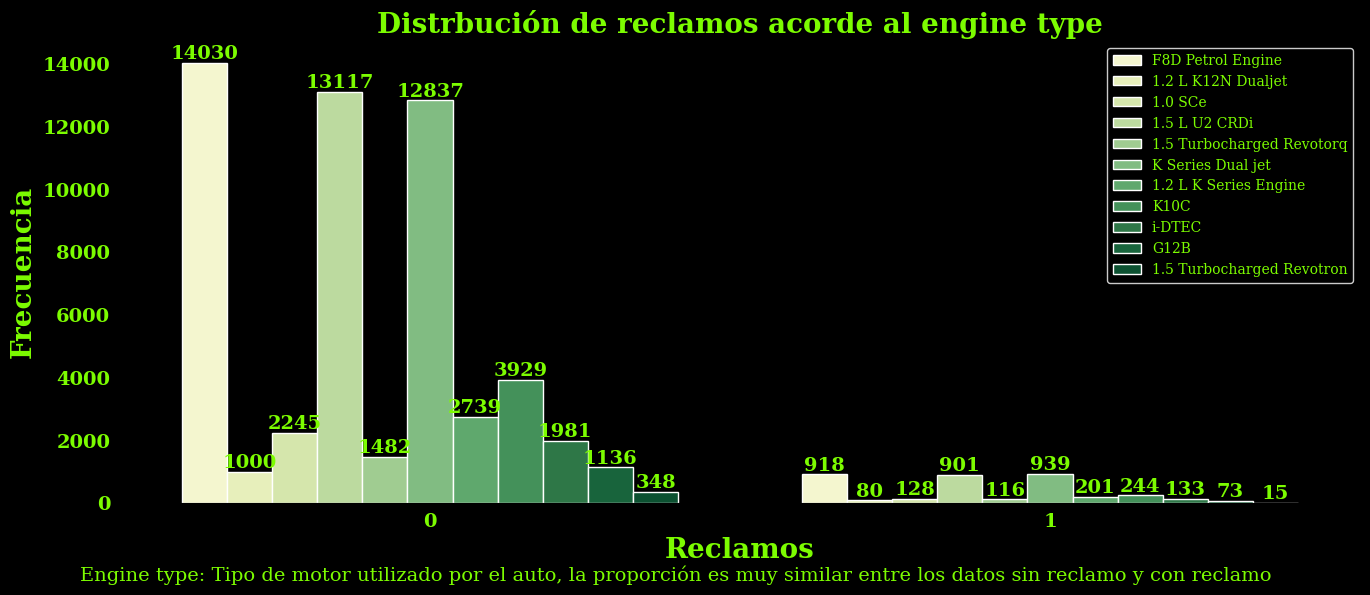

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16,6), facecolor="black")
#Tipo de letra
plt.rcParams['font.family'] = 'DejaVu Serif'
#Revisamos la proporción de reclamos
#x-->Variable a graficar
#data-->Dattos
#color-->Color de las barras
#edgecolor-->Color del borde de las barras
# Creamos una paleta de colores
colors = ['lime', 'red','orange']
#Width-->Grosor de barras
grafica=sns.countplot(x='is_claim',data=df, hue='engine_type',
                      palette='YlGn' ,edgecolor='white')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Reclamos',fontsize = 20,
           color = 'lawngreen',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Frecuencia',fontsize = 20,
           color = 'lawngreen',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='lawngreen',fontweight='bold')
plt.yticks(fontsize=14, color='lawngreen',fontweight='bold')
#Agregar el titulo con tamaño y color personalizados
#fontweight='bold'-->Negritas
plt.title('Distrbución de reclamos acorde al engine type',fontsize = 20,
          color = 'lawngreen',fontweight='bold')
#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=14,
                      color='lawngreen',fontweight='bold')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")
#Etiquetas para el parametro hue personalizados
plt.legend(
           facecolor='black',
           edgecolor='white',
           labelcolor='lawngreen',
           title_fontsize=12)

# Interpretación debajo del gráfico
plt.figtext(0.10, -0.02,
            "Engine type: Tipo de motor utilizado por el auto, "
            "la proporción es muy similar entre los datos sin reclamo "
            "y con reclamo",
            fontsize=14, color='lawngreen')

# Mostrar el gráfico
plt.show()

---
##**Definición de la variable objetivo (variable Y)**🚗💨
---

La variable objetivo es $Y=$ "is_claim" lo que se traduce como "es_reclamación" y se refiere a si el asegurado realizo una reclamación durante la vigencia de su póliza.

Esta variable es de vital importancia para la industria de los seguros en México, representa el riesgo que implica asegurar a un individuo o vehículo determinado,  una predicción correcta implica menos pérdidas económicas para la aseguradora


El evento que buscamos predecir es la probabilidad es que un auto sufra un siniestro, tiene una respuesta binaria (Si o no)

$$
Y= \begin{cases} 1 \ \text{Si el auto sufrió un siniestro} \\
   0 \ \text{Si el auto no sufrió un siniestro}
  \end{cases}
$$

In [ ]:
#Se define la variable objetivo como
Y=df.head(10).style.background_gradient(subset=['is_claim'], cmap='autumn')
Y

In [ ]:
#Variable Target
y = df['is_claim']
y

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: is_claim, Length: 58592, dtype: int64

In [ ]:
y.describe()

count    58592.000000
mean         0.063968
std          0.244698
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_claim, dtype: float64

In [ ]:
# Cuenta la cantidad de personas que sufrieron un siniestro (1) y las que no sufrieron un siniestro (0)
df['is_claim'].value_counts()

is_claim
0    54844
1     3748
Name: count, dtype: int64

<ipython-input-31-79c9b8314d5b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafica=sns.countplot(x='is_claim',data=df,palette=colors,edgecolor='white')


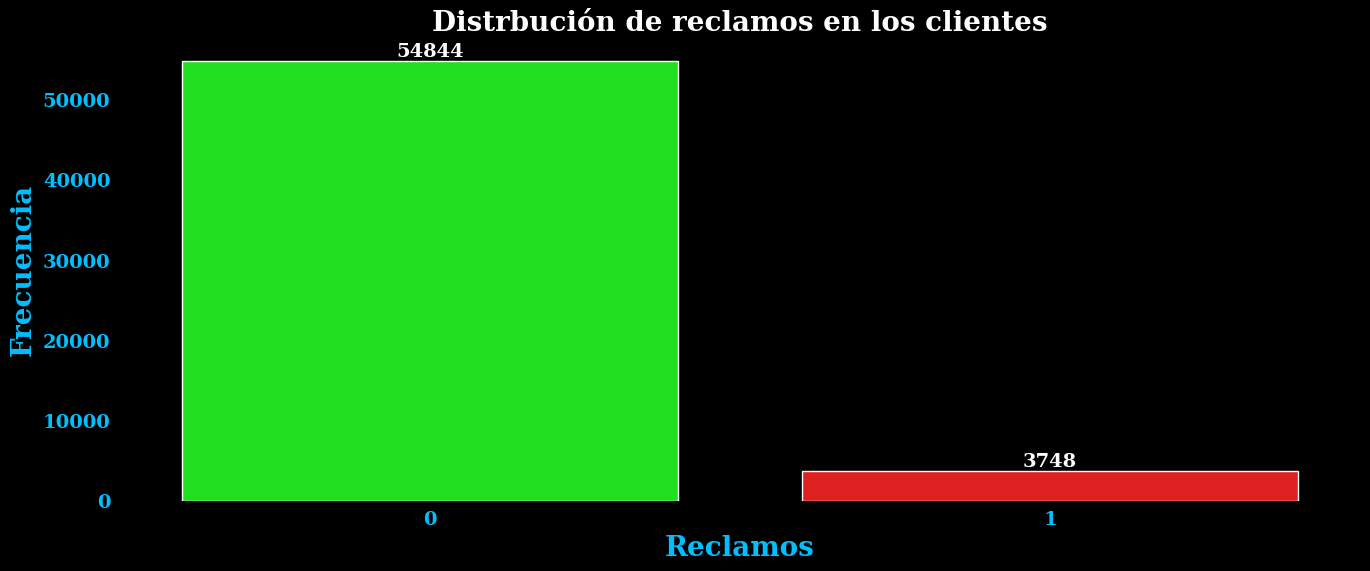

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16,6), facecolor="black")
#Tipo de letra
plt.rcParams['font.family'] = 'DejaVu Serif'
#Revisamos la proporción de reclamos
#x-->Variable a graficar
#data-->Dattos
#color-->Color de las barras
#edgecolor-->Color del borde de las barras
# Creamos una paleta de colores
colors = ['lime', 'red']
#Width-->Grosor de barras
grafica=sns.countplot(x='is_claim',data=df,palette=colors,edgecolor='white')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Reclamos',fontsize = 20,
           color = 'deepskyblue',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Frecuencia',fontsize = 20,
           color = 'deepskyblue',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='deepskyblue',fontweight='bold')
plt.yticks(fontsize=14, color='deepskyblue',fontweight='bold')
#Agregar el titulo con tamaño y color personalizados
#fontweight='bold'-->Negritas
plt.title('Distrbución de reclamos en los clientes',fontsize = 20,
          color = 'white',fontweight='bold')
#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=14,
                      color='white',fontweight='bold')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")
# Eliminar bordes de la gráfica
#Borde superior
plt.gca().spines['top'].set_visible(False)
#Borde derecho
plt.gca().spines['right'].set_visible(False)
#Borde izquierdo
plt.gca().spines['left'].set_visible(False)
#Borde inferior
plt.gca().spines['bottom'].set_visible(False)
# Mostrar el gráfico
plt.show()

---
# **Limpieza de datos**🧼
---

---
## **Clasificación de variables**🚓
---

In [ ]:
#0)Dataframe de variables insignificantes
#Variables insignifcantes
#No seran tomadas en cuenta a la hora de hacer el modelo
#Definimos el dataset df_i
df_i=df[['policy_id','policy_tenure']]
#Mostramos las 5 primeras filas
df_i.head(5)

policy_id    policy_tenure
0   ID00001  515873589958172
1   ID00002  672618513547733
2   ID00003  841110255796233
3   ID00004  900276558749967
4   ID00005  596402813108729

In [ ]:
#1)Dataframe de ciudad
#Variables sobre la ciudad
#dataframe df_ci:=Columnas referentes a la imformación
#sobre la ciudad donde recide el asegurado
df_ci=df[['area_cluster','population_density',]]
#Mostrar las 5 primeras filas de dataframe
df_ci.head(5)

area_cluster  population_density
0           C1                4990
1           C2               27003
2           C3                4076
3           C4               21622
4           C5               34738

In [ ]:
#2)Dataframe sobre el asegurado
#Variables sobre el asegurado
#dataframe df_a:=Columnas que tienen información acerca del asegurado
df_a=df[['age_of_policyholder']]
#Mostrar las 5 primeras filas del dato
df_a.head(5)

age_of_policyholder
0      644230769230769
1                  375
2      384615384615385
3      432692307692308
4      634615384615385

In [ ]:
#3)Dataframe sobre el carro
#Variables sobre el carro
#df_c= Columnas que tienen información significada sobre el carro
df_c=df[['age_of_car','make','segment','model','fuel_type','max_torque',
         'max_power','engine_type','airbags', 'is_esc',
         'is_adjustable_steering','is_tpms','is_parking_sensors',
         'is_parking_camera','rear_brakes_type','displacement','cylinder',
         'transmission_type','gear_box','steering_type','turning_radius',
         'length','width','height','gross_weight','is_front_fog_lights',
         'is_rear_window_wiper','is_rear_window_washer',
         'is_rear_window_defogger','is_brake_assist',
         'is_power_door_locks','is_central_locking','is_power_steering',
         'is_driver_seat_height_adjustable','is_day_night_rear_view_mirror',
         'is_ecw','is_speed_alert','ncap_rating','is_claim'

         ]]
#Mostrar las 5 primeras filas
df_c.head(5)

age_of_car  make segment model fuel_type     max_torque         max_power  \
0           5     1       A    M1       CNG   60Nm@3500rpm  40.36bhp@6000rpm   
1           2     1       A    M1       CNG   60Nm@3500rpm  40.36bhp@6000rpm   
2           2     1       A    M1       CNG   60Nm@3500rpm  40.36bhp@6000rpm   
3          11     1      C1    M2    Petrol  113Nm@4400rpm  88.50bhp@6000rpm   
4          11     2       A    M3    Petrol   91Nm@4250rpm  67.06bhp@5500rpm   

          engine_type  airbags is_esc is_adjustable_steering is_tpms  \
0   F8D Petrol Engine        2     No                     No      No   
1   F8D Petrol Engine        2     No                     No      No   
2   F8D Petrol Engine        2     No                     No      No   
3  1.2 L K12N Dualjet        2    Yes                    Yes      No   
4             1.0 SCe        2     No                     No      No   

  is_parking_sensors is_parking_camera rear_brakes_type  displacement  \
0                Yes                No             Drum           796   
1                Yes                No             Drum           796   
2                Yes                No             Drum           796   
3                Yes               Yes             Drum          1197   
4                 No               Yes             Drum           999   

   cylinder transmission_type  gear_box steering_type  turning_radius  length  \
0         3            Manual         5         Power              46    3445   
1         3            Manual         5         Power              46    3445   
2         3            Manual         5         Power              46    3445   
3         4         Automatic         5      Electric              48    3995   
4         3         Automatic         5      Electric               5    3731   

   width  height  gross_weight is_front_fog_lights is_rear_window_wiper  \
0   1515    1475          1185                  No                   No   
1   1515    1475          1185                  No                   No   
2   1515    1475          1185                  No                   No   
3   1735    1515          1335                 Yes                   No   
4   1579    1490          1155                  No                   No   

  is_rear_window_washer is_rear_window_defogger is_brake_assist  \
0                    No                      No              No   
1                    No                      No              No   
2                    No                      No              No   
3                    No                     Yes             Yes   
4                    No                      No              No   

  is_power_door_locks is_central_locking is_power_steering  \
0                  No                 No               Yes   
1                  No                 No               Yes   
2                  No                 No               Yes   
3                 Yes                Yes               Yes   
4                 Yes                Yes               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert  ncap_rating  is_claim  
0            Yes            0         0  
1            Yes            0         0  
2            Yes            0         0  
3            Yes            2         0  
4            Yes            2         0

---
## **Valores Nulos**🛠️
---

Representados por pandas como NaN (Not at Number) los **valores nulos** representan datos faltantes o indefinidos y requieren un manejo adecuado para evitar problemas en el análisis.

**¿Cómo Tratar los Valores Nulos?** Tenemos las siguientes opciones

1.   **Eliminar Filas** Se eliminan las filas con valores nulos, sin embargo, puede generar una perdida significativa de información por eso es lo solo recomendable si la cantidad de valores nulos es una cifra pequeña $ \approx 5 \%  $
2.   **Eliminar Columnas** Se elimina toda la columna cuando la cantidad de valores nulos es muy alta $ >70\% $
1.   **Imputación** Se remplazan los valores nulos con una medida de tendencia central: media, mediana o moda



In [ ]:
# Cantidad de valores nulos que tenemos por columna
df_c.isnull().sum()
#No es necesario tratar los valores nulos por que no existen

age_of_car                          0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width                               0
height                              0
gross_weight                        0
is_front_fog_lights                 0
is_rear_window_wiper                0
is_rear_window_washer               0
is_rear_window_defogger             0
is_brake_assist                     0
is_power_door_locks                 0
is_central_locking                  0
is_power_steering                   0
is_driver_seat_height_adjustable    0
is_day_night_rear_view_mirror       0
is_ecw                              0
is_speed_alert                      0
ncap_rating                         0
is_claim                            0
dtype: int64

In [ ]:
# Cantidad de valores nulos que tenemos
df_c.isnull().sum().sum()
#No es necesario tratar los valores nulos por que no existen

np.int64(0)

---
## **Outliners**🚨
---

Un **valor atípico (outliner)** es un valor de datos que se desvía significativamente del resto de los valores, es decir, una observación con un valor mucho más grande o pequeño que el resto de los valores en el conjunto de datos

Los outliners influyen a que los modelos de regresión no generalicen bien y tengan conclusiones erróneas por eso deben de ser tratados en el conjunto de datos

**¿Cómo identificar outliners?**

1. **Visualización de datos** Se grafica el diagrama de caja de la variable a analizar y en qué caso de existen valores atípicos muy grandes se visualizaran de manera clara como puntos fuera del rango
2.   **Rango IQR** También conocido como rango intercuartílico se trata toman $Q_1$ (Percentil $0.25$) y $Q_3$ (Percentil $0.75$)  y todo valor fuera del intervalo $[Q_1-1.5*IQR,Q_3+1.5*IQR]$ se considera outliner
1.   **Z-Score** Mide las desviaciones estándar de un punto respecto a la media y considera outliners a aquellos que tienen un valor de $|Z|>3$


**¿Cómo tratar los outliners?** Se tienen las siguientes opciones

1.   **Eliminar Valores** Si lo valores atípicos no aportan información útil la mejor opción es optar por eliminarlos  
2.   **Transformarlos** Se aplica una operación a los datos como logaritmos o raíz cuadrada para reducir el impacto de los outliners
1.   **Imputación** Se tratan como valores nulos y se remplazan con una medida de tendencia central: media, mediana o moda
1.   **Modelos robustos** Son modelos que manejan outliners sin verse gravemente afectados

**0)Dataframe de variables insignificantes** No es necesario tratar sus outliners por que no se ocuparán estos datos

In [ ]:
#Registros con outliners
df_ci.shape

(58592, 2)

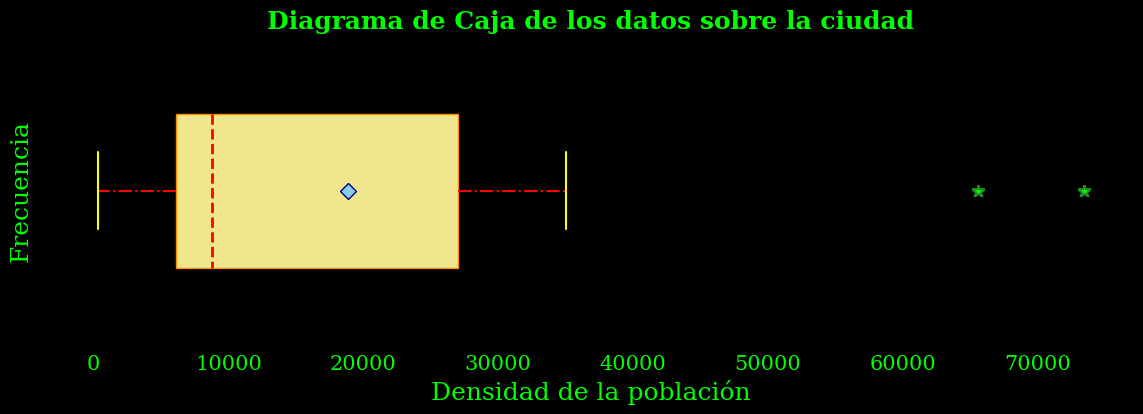

In [ ]:
#1)Dataframe de ciudad
# Creaamos la figura y ajustar el tamaño
# facecolor--> color  de fondo
plt.figure(figsize=(14,4), facecolor='black')
#Ajustamos el estilo del gráfico
sns.set_style("white")
#plt.rcParams['font.family']-->Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
# Creamos el diagrama de caja
#datos=df_ci--> datos para hacer el diagrama
#x='population_density'-->variable sobre la que se hace el diagrama de caja
#dict(facecolor='red', color='khaki'), -->  color de la caja
#whiskerprops=dict(color='navy'),--> Lineas horizontales
#capprops=dict(color='black'),--> Lineas verticales
#flierprops=dict(markerfacecolor='lime', markeredgecolor='forestgreen'--> Valores atípicos
#width=0.5 -->Largo de la caja
#showmeans=True-->Muestra la media
#medianprops=dict(color='red')--> Mediana
#meanprops=dict(marker='D', markersize=8,)-->Media
grafica= sns.boxplot(data=df_ci, x='population_density',showmeans=True, width=0.5,
#Colores dela caja
            boxprops=dict(facecolor='khaki', edgecolor='darkorange'),
#Lineas verticales
            whiskerprops=dict(color='red',linewidth=1.5,linestyle='dashdot'),
#Lineas horizontales
            capprops=dict(color='yellow',linewidth=1.5,linestyle='solid'),
#Valores atípicos
            flierprops=dict(marker='*', markersize=9,markerfacecolor='lime',
                            markeredgecolor='forestgreen'),
#Mostrar la mediana
            medianprops=dict(color='red', linewidth=2,linestyle="dashed"),
#Mostrar la media
            meanprops=dict(marker='D', markersize=8,
                           markerfacecolor='skyblue', markeredgecolor='navy')
            )
# Eliminar bordes de la gráfica
#Borde superior
plt.gca().spines['top'].set_visible(False)
#Borde derecho
plt.gca().spines['right'].set_visible(False)
#Borde izquierdo
plt.gca().spines['left'].set_visible(False)
#Borde inferior
plt.gca().spines['bottom'].set_visible(False)

# facecolor-->' color  de fondo
grafica.set_facecolor('black')
# Agregamos el título
#fontweight='bold'-->Negritas
plt.title('Diagrama de Caja de los datos sobre la ciudad',
          fontsize=18, color='lime', fontweight='bold')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=15, color='lime')
# Etiquetamos los ejes
plt.xlabel('Densidad de la población', fontsize=18, color='lime')
plt.ylabel('Frecuencia', fontsize=18, color='lime')
# Mostramos el gráfico
plt.show()

In [ ]:
#Se eliminan los outliners aquellos con valor superior a 40000
df_ci= df_ci[df_ci['population_density']<=40000]

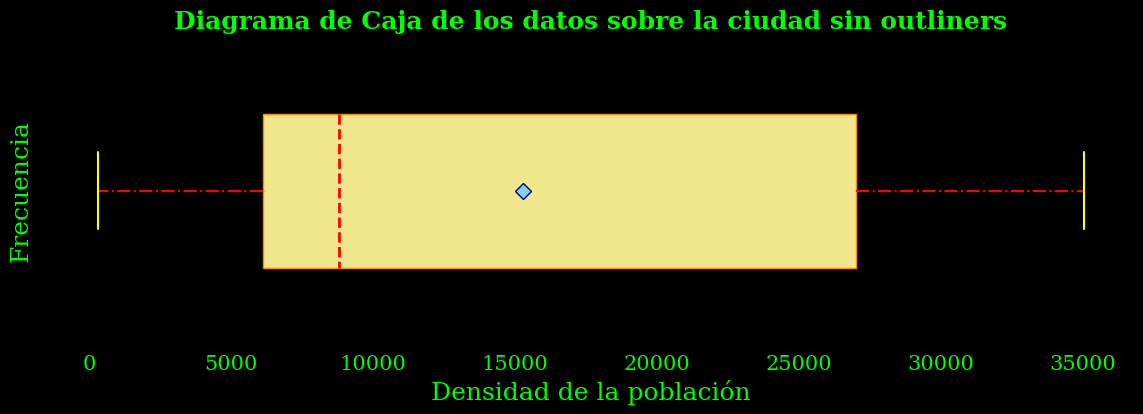

In [ ]:
#Se confirma que se eliminaron los outliners
#1)Dataframe de ciudad
# Creaamos la figura y ajustar el tamaño
# facecolor--> color  de fondo
plt.figure(figsize=(14,4), facecolor='black')
#Ajustamos el estilo del gráfico
sns.set_style("white")
#plt.rcParams['font.family']-->Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
# Creamos el diagrama de caja
#datos=df_ci--> datos para hacer el diagrama
#x='population_density'-->variable sobre la que se hace el diagrama de caja
#dict(facecolor='red', color='khaki'), -->  color de la caja
#whiskerprops=dict(color='navy'),--> Lineas horizontales
#capprops=dict(color='black'),--> Lineas verticales
#flierprops=dict(markerfacecolor='lime', markeredgecolor='forestgreen'--> Valores atípicos
#width=0.5 -->Largo de la caja
#showmeans=True-->Muestra la media
#medianprops=dict(color='red')--> Mediana
#meanprops=dict(marker='D', markersize=8,)-->Media
grafica= sns.boxplot(data=df_ci, x='population_density',showmeans=True, width=0.5,
#Colores dela caja
            boxprops=dict(facecolor='khaki', edgecolor='darkorange'),
#Lineas verticales
            whiskerprops=dict(color='red',linewidth=1.5,linestyle='dashdot'),
#Lineas horizontales
            capprops=dict(color='yellow',linewidth=1.5,linestyle='solid'),
#Valores atípicos
            flierprops=dict(marker='*', markersize=9,markerfacecolor='lime',
                            markeredgecolor='forestgreen'),
#Mostrar la mediana
            medianprops=dict(color='red', linewidth=2,linestyle="dashed"),
#Mostrar la media
            meanprops=dict(marker='D', markersize=8,
                           markerfacecolor='skyblue', markeredgecolor='navy')
            )
# Eliminar bordes de la gráfica
#Borde superior
plt.gca().spines['top'].set_visible(False)
#Borde derecho
plt.gca().spines['right'].set_visible(False)
#Borde izquierdo
plt.gca().spines['left'].set_visible(False)
#Borde inferior
plt.gca().spines['bottom'].set_visible(False)

# facecolor-->' color  de fondo
grafica.set_facecolor('black')
# Agregamos el título
#fontweight='bold'-->Negritas
plt.title('Diagrama de Caja de los datos sobre la ciudad sin outliners',
          fontsize=18, color='lime', fontweight='bold')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=15, color='lime')
# Etiquetamos los ejes
plt.xlabel('Densidad de la población', fontsize=18, color='lime')
plt.ylabel('Frecuencia', fontsize=18, color='lime')
# Mostramos el gráfico
plt.show()

In [ ]:
#Registros sin outliners
df_ci.shape

(54945, 2)

In [ ]:
#Registros con outliners
df_a.shape

(58592, 1)

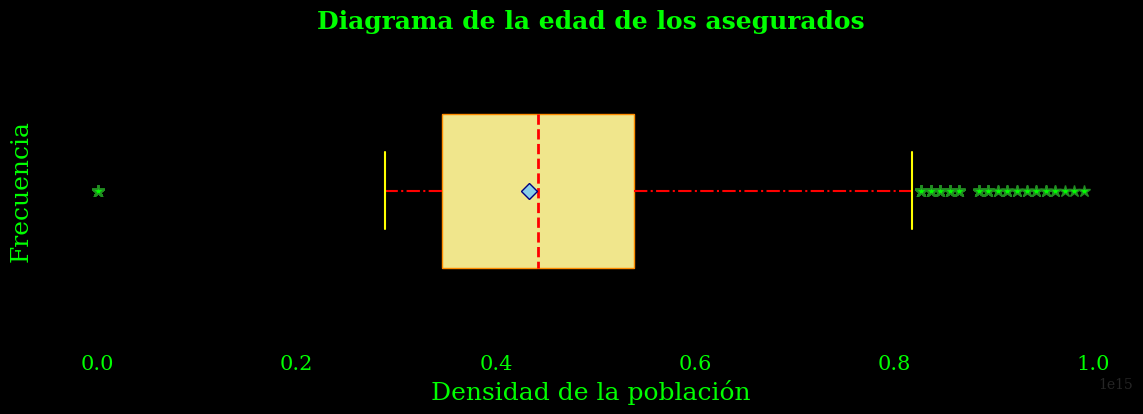

In [ ]:
#2)Dataframe del asegurado
# Creaamos la figura y ajustar el tamaño
# facecolor--> color  de fondo
plt.figure(figsize=(14,4), facecolor='black')
#Ajustamos el estilo del gráfico
sns.set_style("white")
#plt.rcParams['font.family']-->Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
# Creamos el diagrama de caja
#datos=df_ci--> datos para hacer el diagrama
#x='population_density'-->variable sobre la que se hace el diagrama de caja
#dict(facecolor='red', color='khaki'), -->  color de la caja
#whiskerprops=dict(color='navy'),--> Lineas horizontales
#capprops=dict(color='black'),--> Lineas verticales
#flierprops=dict(markerfacecolor='lime', markeredgecolor='forestgreen'--> Valores atípicos
#width=0.5 -->Largo de la caja
#showmeans=True-->Muestra la media
#medianprops=dict(color='red')--> Mediana
#meanprops=dict(marker='D', markersize=8,)-->Media
grafica= sns.boxplot(data=df_a, x='age_of_policyholder',showmeans=True, width=0.5,
#Colores dela caja
            boxprops=dict(facecolor='khaki', edgecolor='darkorange'),
#Lineas verticales
            whiskerprops=dict(color='red',linewidth=1.5,linestyle='dashdot'),
#Lineas horizontales
            capprops=dict(color='yellow',linewidth=1.5,linestyle='solid'),
#Valores atípicos
            flierprops=dict(marker='*', markersize=9,markerfacecolor='lime',
                            markeredgecolor='forestgreen'),
#Mostrar la mediana
            medianprops=dict(color='red', linewidth=2,linestyle="dashed"),
#Mostrar la media
            meanprops=dict(marker='D', markersize=8,
                           markerfacecolor='skyblue', markeredgecolor='navy')
            )
# Eliminar bordes de la gráfica
#Borde superior
plt.gca().spines['top'].set_visible(False)
#Borde derecho
plt.gca().spines['right'].set_visible(False)
#Borde izquierdo
plt.gca().spines['left'].set_visible(False)
#Borde inferior
plt.gca().spines['bottom'].set_visible(False)

# facecolor-->' color  de fondo
grafica.set_facecolor('black')
# Agregamos el título
#fontweight='bold'-->Negritas
plt.title('Diagrama de la edad de los asegurados',
          fontsize=18, color='lime', fontweight='bold')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=15, color='lime')
# Etiquetamos los ejes
plt.xlabel('Densidad de la población', fontsize=18, color='lime')
plt.ylabel('Frecuencia', fontsize=18, color='lime')
# Mostramos el gráfico
plt.show()

In [ ]:
#Se eliminan los outliners aquellos mínimo mayor a 1000 y menor a 800,000,000,000,000
df_a = df_a[(df_a['age_of_policyholder'] >= 1000) & (df_a['age_of_policyholder'] <= 800000000000000)]


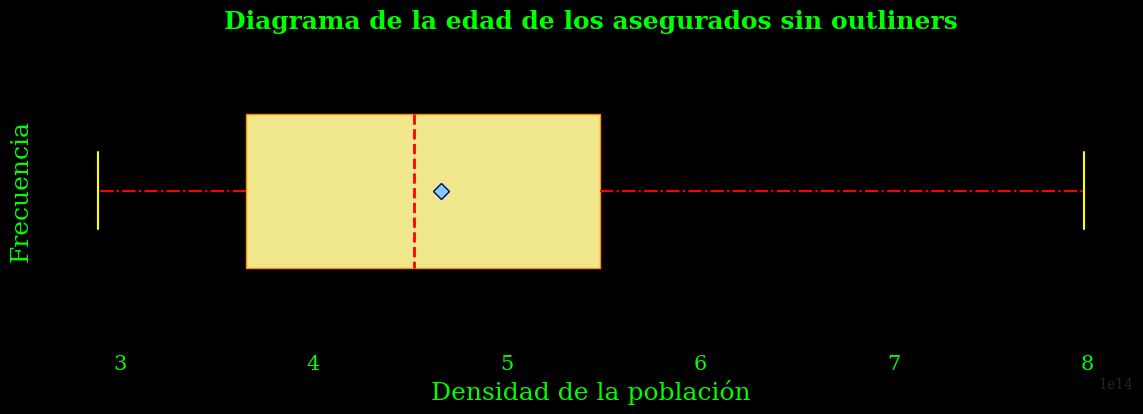

In [ ]:
#Se comfirma que se eliminaron los outliners
#2)Dataframe del asegurado
# Creaamos la figura y ajustar el tamaño
# facecolor--> color  de fondo
plt.figure(figsize=(14,4), facecolor='black')
#Ajustamos el estilo del gráfico
sns.set_style("white")
#plt.rcParams['font.family']-->Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
# Creamos el diagrama de caja
#datos=df_ci--> datos para hacer el diagrama
#x='population_density'-->variable sobre la que se hace el diagrama de caja
#dict(facecolor='red', color='khaki'), -->  color de la caja
#whiskerprops=dict(color='navy'),--> Lineas horizontales
#capprops=dict(color='black'),--> Lineas verticales
#flierprops=dict(markerfacecolor='lime', markeredgecolor='forestgreen'--> Valores atípicos
#width=0.5 -->Largo de la caja
#showmeans=True-->Muestra la media
#medianprops=dict(color='red')--> Mediana
#meanprops=dict(marker='D', markersize=8,)-->Media
grafica= sns.boxplot(data=df_a, x='age_of_policyholder',showmeans=True, width=0.5,
#Colores dela caja
            boxprops=dict(facecolor='khaki', edgecolor='darkorange'),
#Lineas verticales
            whiskerprops=dict(color='red',linewidth=1.5,linestyle='dashdot'),
#Lineas horizontales
            capprops=dict(color='yellow',linewidth=1.5,linestyle='solid'),
#Valores atípicos
            flierprops=dict(marker='*', markersize=9,markerfacecolor='lime',
                            markeredgecolor='forestgreen'),
#Mostrar la mediana
            medianprops=dict(color='red', linewidth=2,linestyle="dashed"),
#Mostrar la media
            meanprops=dict(marker='D', markersize=8,
                           markerfacecolor='skyblue', markeredgecolor='navy')
            )
# Eliminar bordes de la gráfica
#Borde superior
plt.gca().spines['top'].set_visible(False)
#Borde derecho
plt.gca().spines['right'].set_visible(False)
#Borde izquierdo
plt.gca().spines['left'].set_visible(False)
#Borde inferior
plt.gca().spines['bottom'].set_visible(False)

# facecolor-->' color  de fondo
grafica.set_facecolor('black')
# Agregamos el título
#fontweight='bold'-->Negritas
plt.title('Diagrama de la edad de los asegurados sin outliners',
          fontsize=18, color='lime', fontweight='bold')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=15, color='lime')
# Etiquetamos los ejes
plt.xlabel('Densidad de la población', fontsize=18, color='lime')
plt.ylabel('Frecuencia', fontsize=18, color='lime')
# Mostramos el gráfico
plt.show()

In [ ]:
#Registros despues de outliners
df_a.shape

(53920, 1)

In [ ]:
#Registros con outliners
df_c.shape

(58592, 39)

In [ ]:
#3)Dataframe del carro
df_cnumericas= df_c.select_dtypes(include=['int64','float64']).columns.tolist()
df_cnumericas

['age_of_car',
 'make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'is_claim']

In [ ]:
len(df_cnumericas)

13

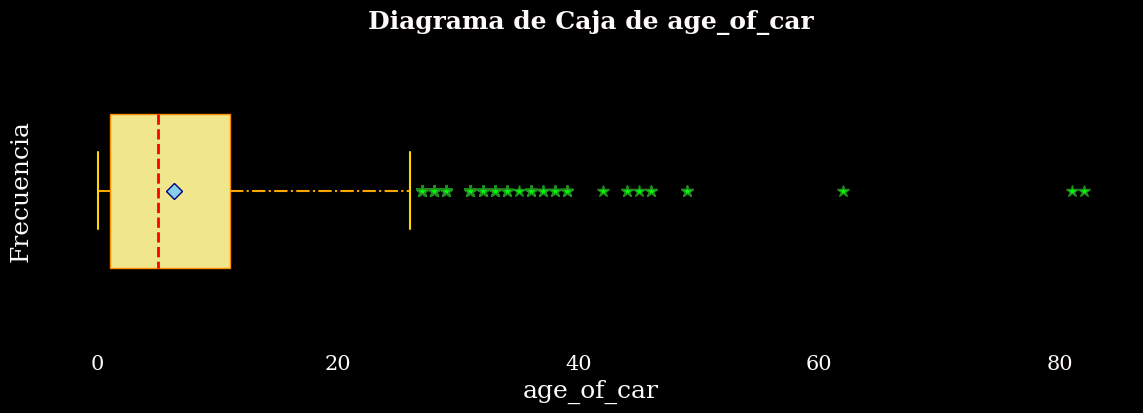

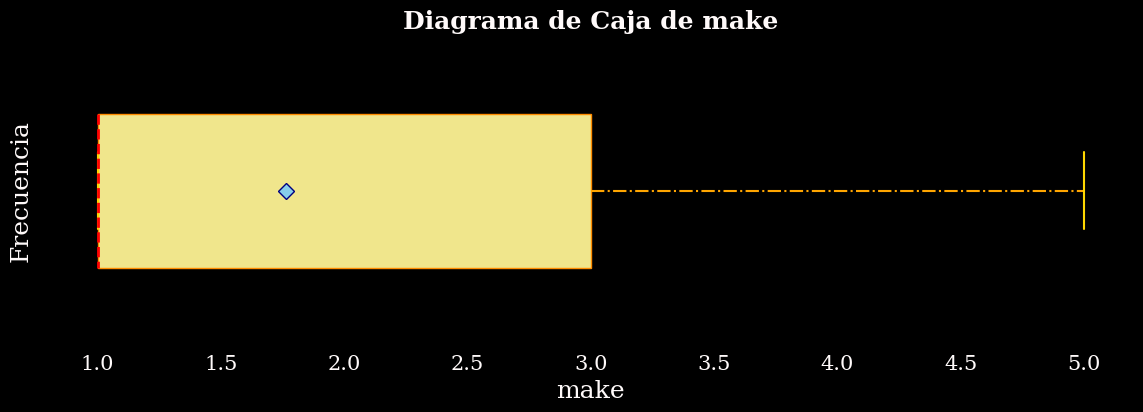

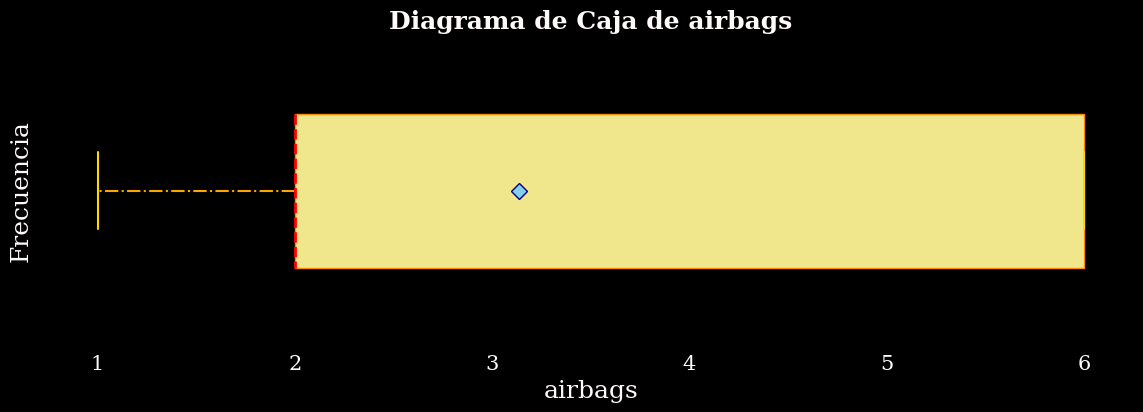

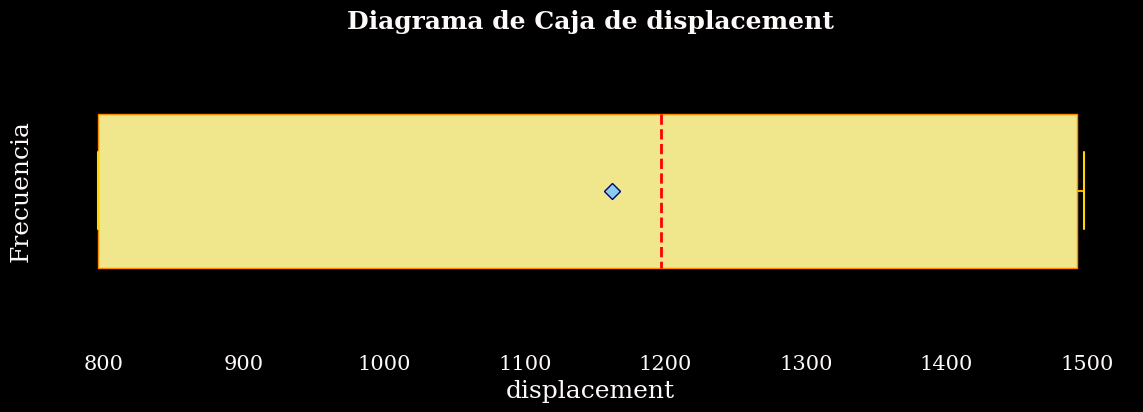

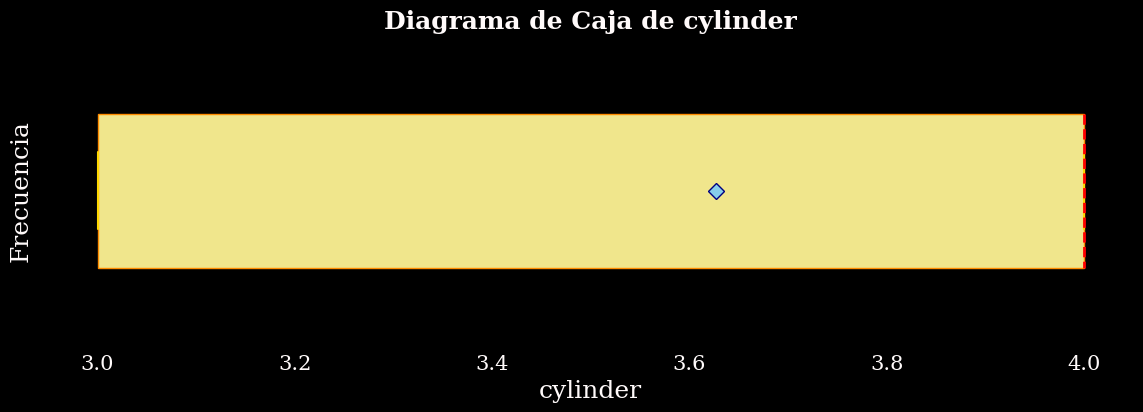

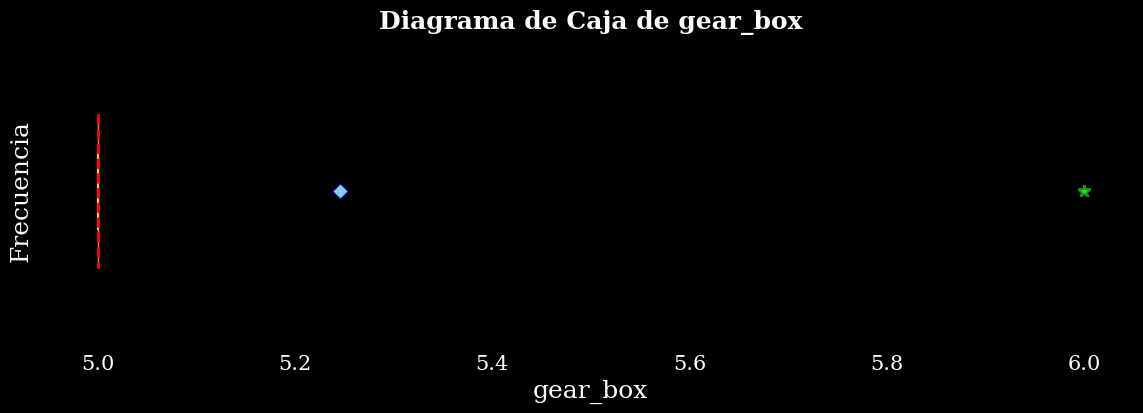

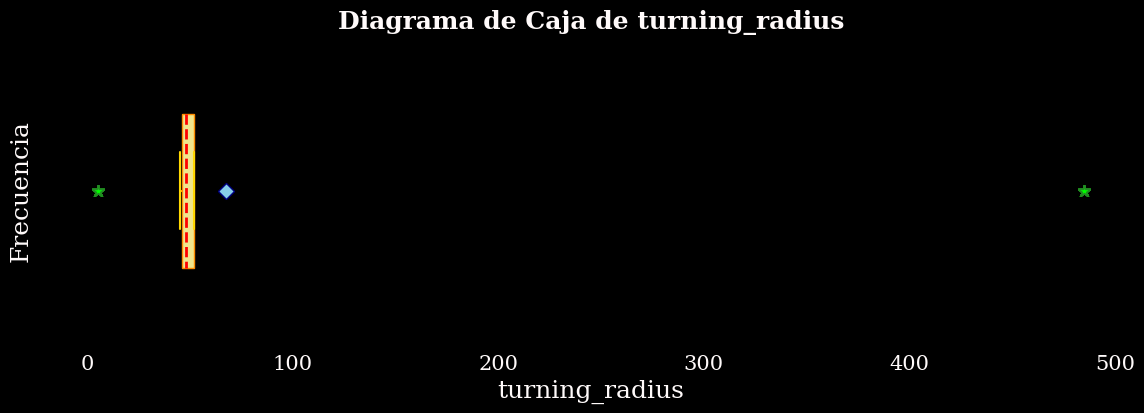

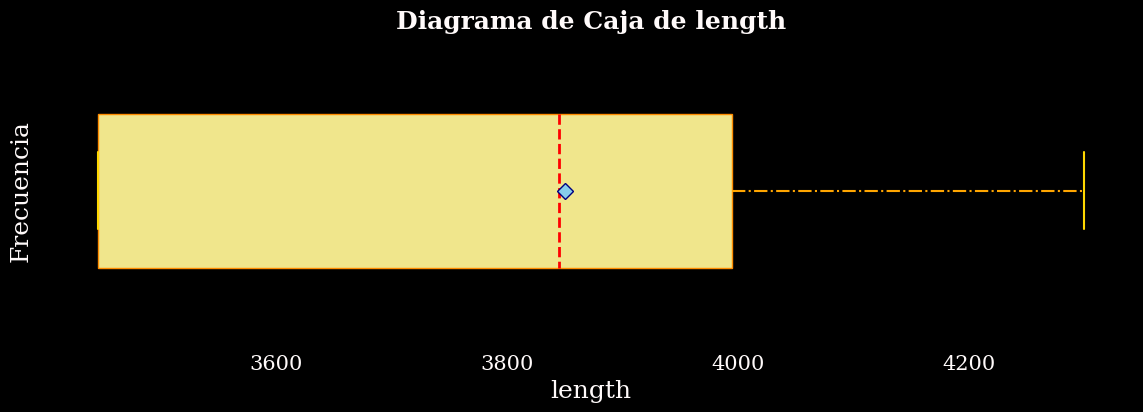

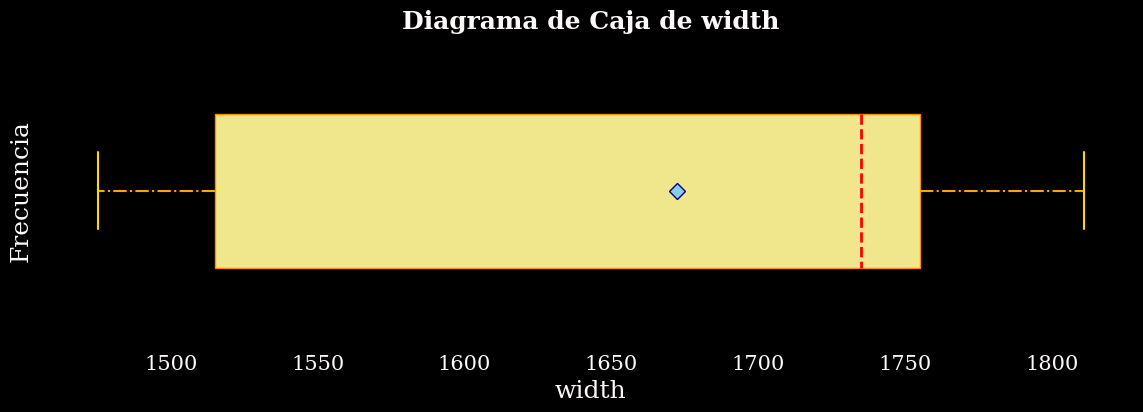

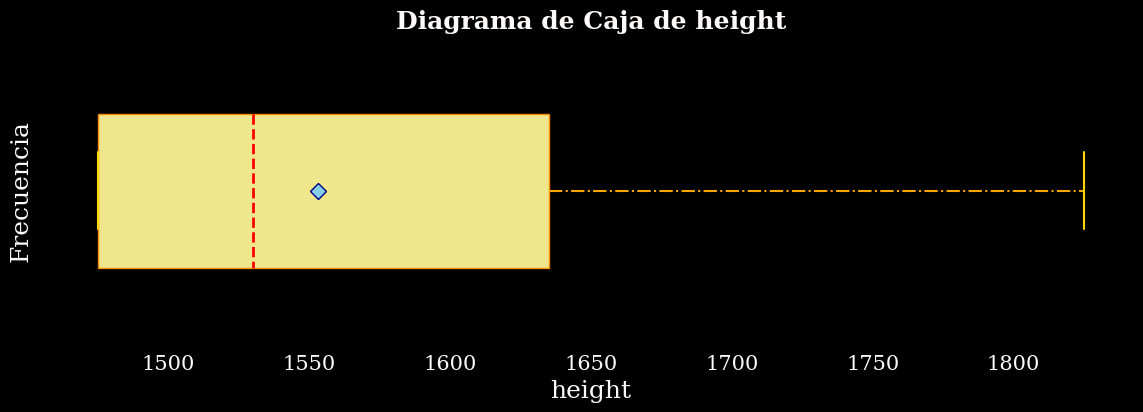

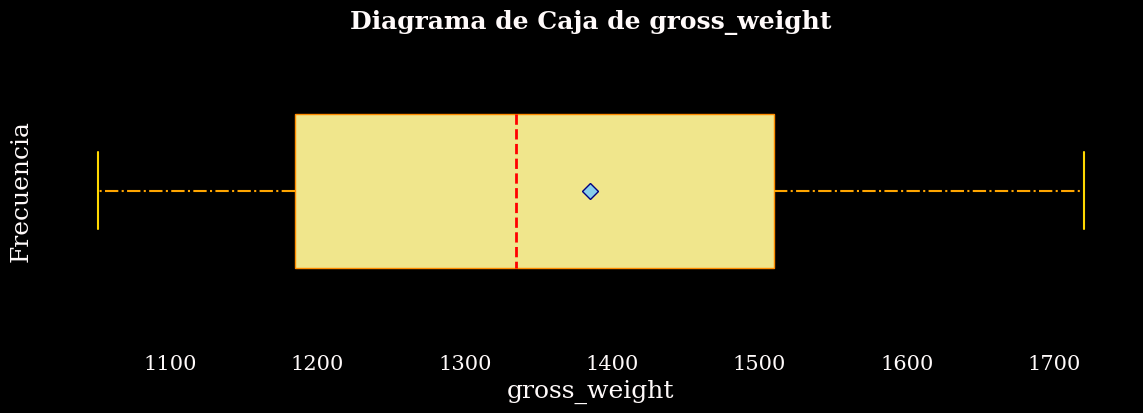

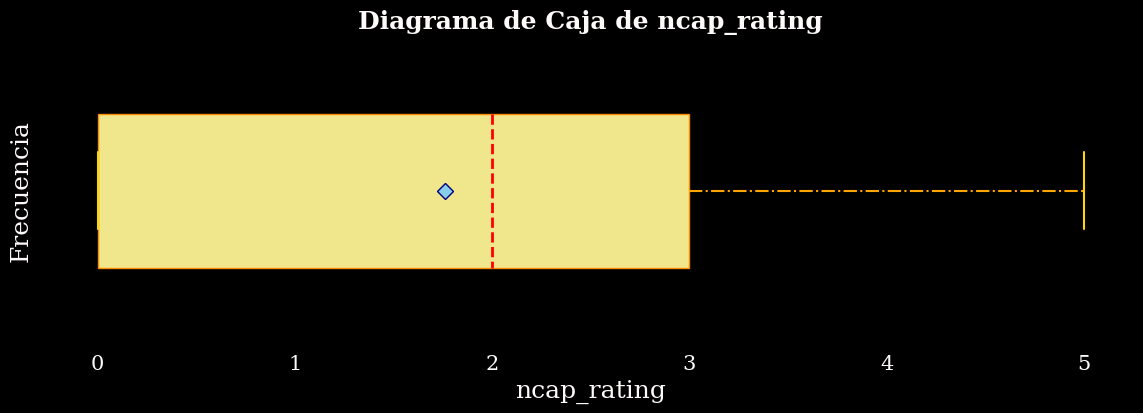

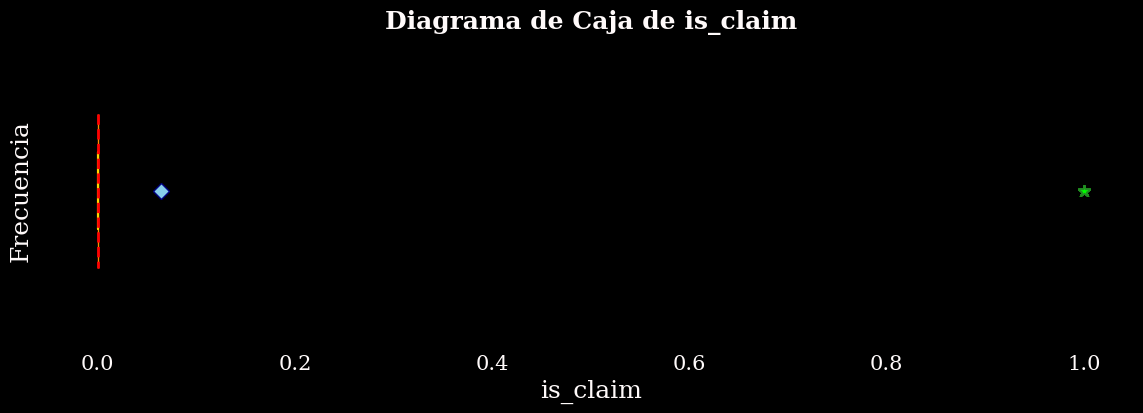

In [ ]:
for i in df_cnumericas:
  #2)Dataframe del asegurado
  # Creaamos la figura y ajustar el tamaño
  # facecolor--> color  de fondo
  plt.figure(figsize=(14,4), facecolor='black')
  #Ajustamos el estilo del gráfico
  sns.set_style("white")
  #plt.rcParams['font.family']-->Tipo de letra para el gráfico
  plt.rcParams['font.family'] = 'DejaVu Serif'
  # Creamos el diagrama de caja
  #datos=df_ci--> datos para hacer el diagrama
  #x='population_density'-->variable sobre la que se hace el diagrama de caja
  #dict(facecolor='red', color='khaki'), -->  color de la caja
  #whiskerprops=dict(color='navy'),--> Lineas horizontales
  #capprops=dict(color='black'),--> Lineas verticales
  #flierprops=dict(markerfacecolor='lime', markeredgecolor='forestgreen'--> Valores atípicos
  #width=0.5 -->Largo de la caja
  #showmeans=True-->Muestra la media
  #medianprops=dict(color='red')--> Mediana
  #meanprops=dict(marker='D', markersize=8,)-->Media
  grafica= sns.boxplot(data=df_c, x=df_c[i],showmeans=True, width=0.5,
  #Colores dela caja
              boxprops=dict(facecolor='khaki', edgecolor='darkorange'),
  #Lineas verticales
              whiskerprops=dict(color='orange',linewidth=1.5,linestyle='dashdot'),
  #Lineas horizontales
              capprops=dict(color='gold',linewidth=1.5,linestyle='solid'),
  #Valores atípicos
              flierprops=dict(marker='*', markersize=9,markerfacecolor='lime',
                              markeredgecolor='forestgreen'),
  #Mostrar la mediana
              medianprops=dict(color='red', linewidth=2,linestyle="dashed"),
  #Mostrar la media
              meanprops=dict(marker='D', markersize=8,
                            markerfacecolor='skyblue', markeredgecolor='navy')
              )
  # Eliminar bordes de la gráfica
  #Borde superior
  plt.gca().spines['top'].set_visible(False)
  #Borde derecho
  plt.gca().spines['right'].set_visible(False)
  #Borde izquierdo
  plt.gca().spines['left'].set_visible(False)
  #Borde inferior
  plt.gca().spines['bottom'].set_visible(False)

  # facecolor-->' color  de fondo
  grafica.set_facecolor('black')
  # Agregamos el título
  #fontweight='bold'-->Negritas
  plt.title(f'Diagrama de Caja de {i}',
            fontsize=18, color='snow', fontweight='bold')
  #Agregamos las etiquetas de los valores del eje X
  plt.xticks(fontsize=15, color='snow')
  # Etiquetamos los ejes
  plt.xlabel(i, fontsize=18, color='snow')
  plt.ylabel('Frecuencia', fontsize=18, color='snow')
  # Mostramos el gráfico
  plt.show()

In [ ]:
#Se eliminan los outliners
df_c = df_c[(df_c['turning_radius'] >= 40) & (df_c['turning_radius'] <= 60)]
df_c = df_c[(df_c['age_of_car'] >= 0) & (df_c['age_of_car'] <= 20)]
#Make no tiene outliners
#Airbags no tiene outliners
#Displement no tiene outliners
#Cylinder no tiene outliners
#Gear_Box no tiene outliners
#Length no tiene outliners
#Width no tiene outliners
#Height no tiene outliners
#Goss Weight no tiene outliners
#Ncap rating no tiene outliners

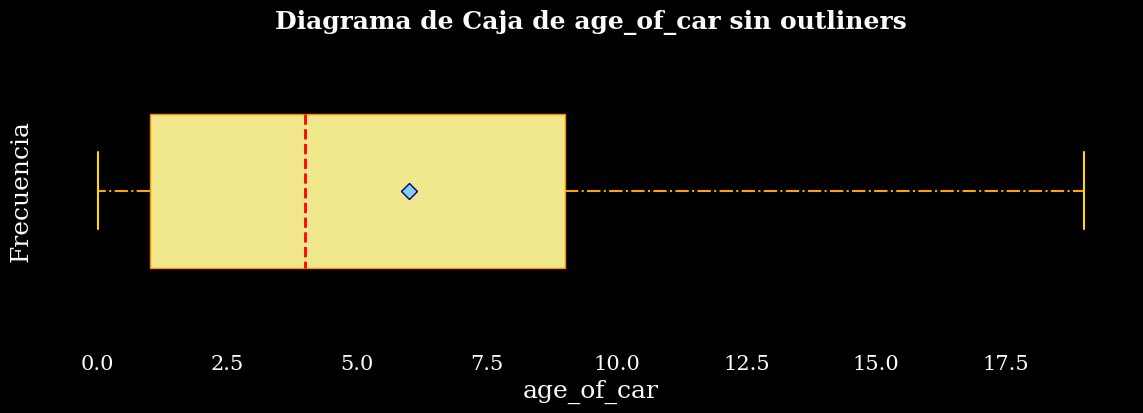

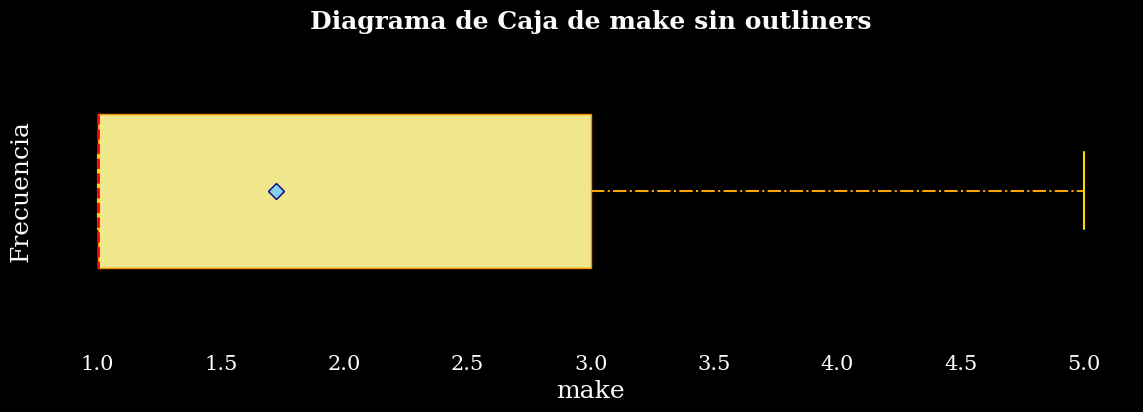

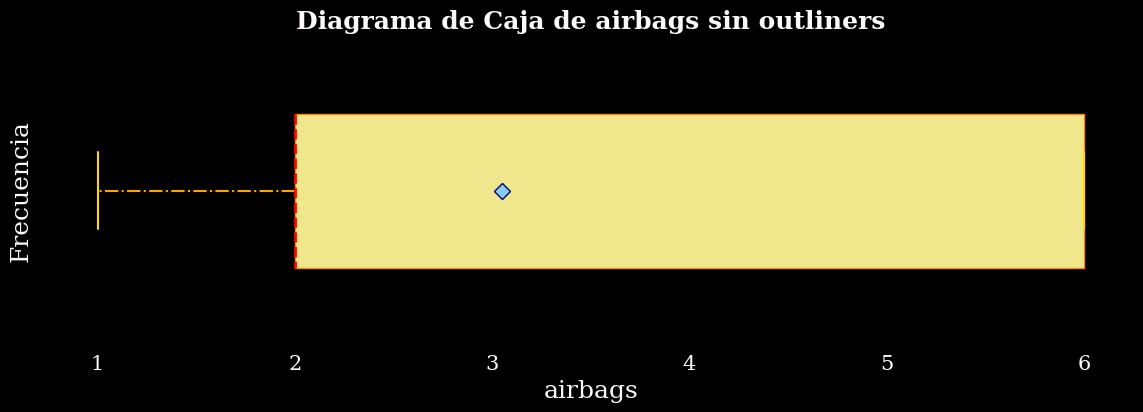

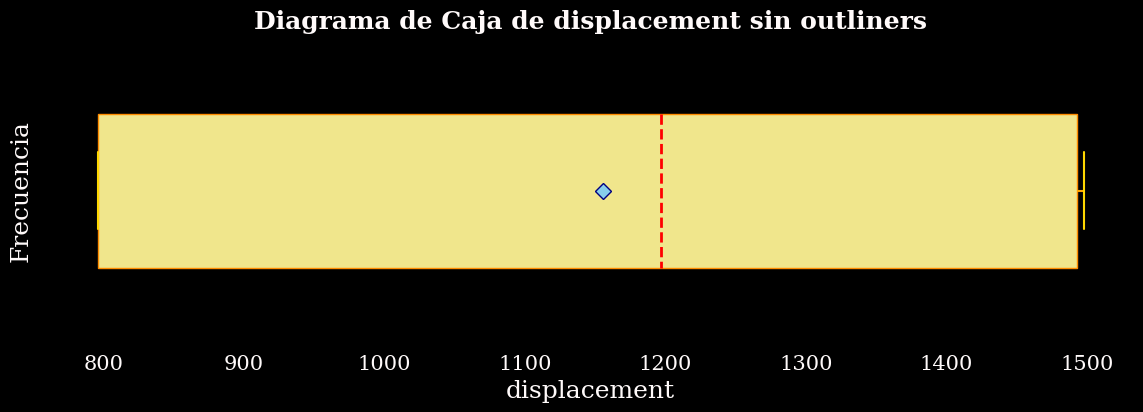

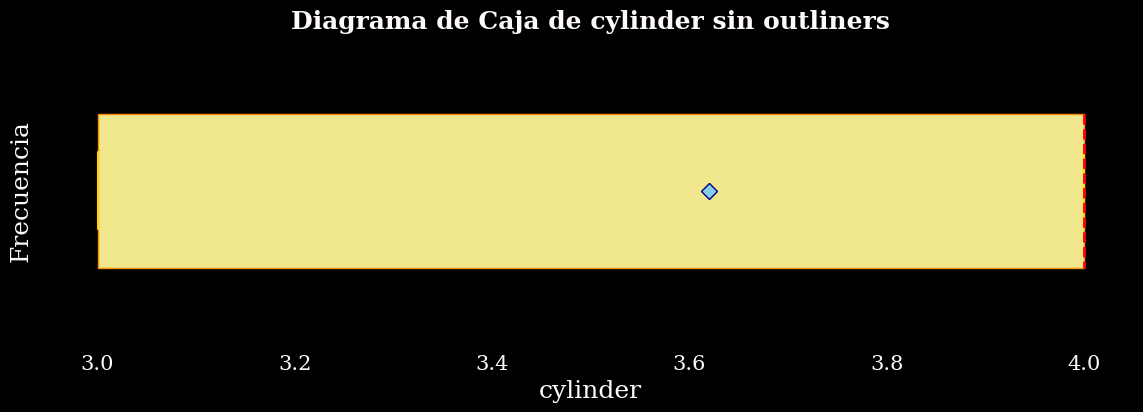

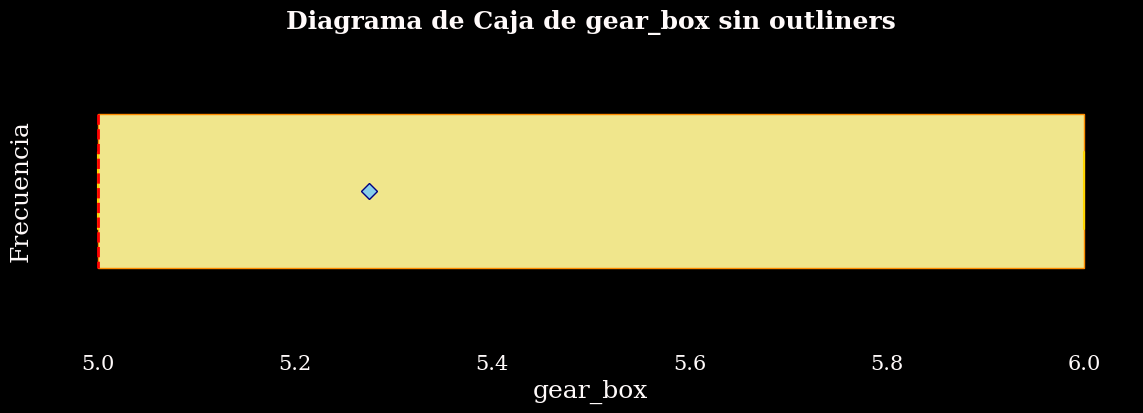

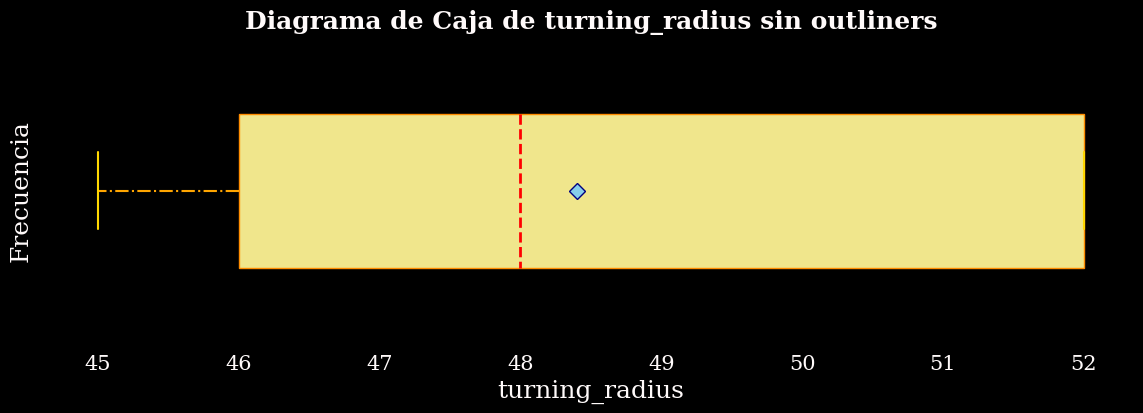

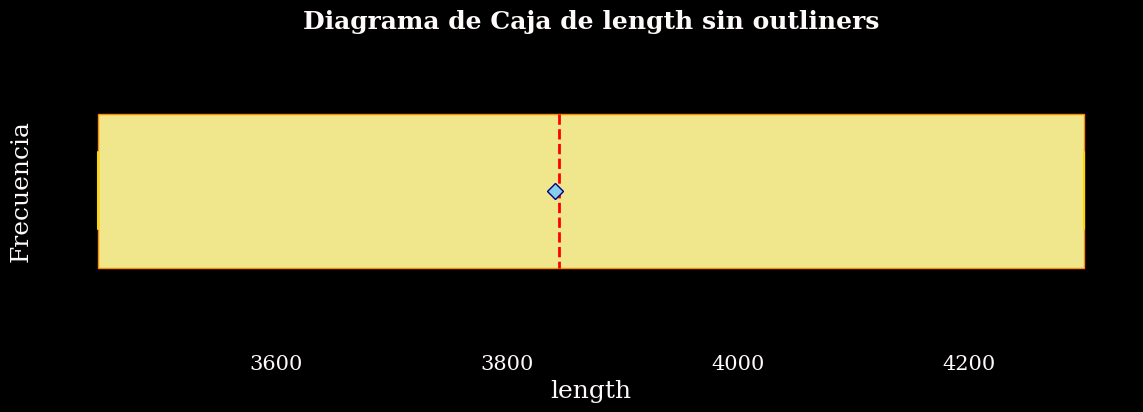

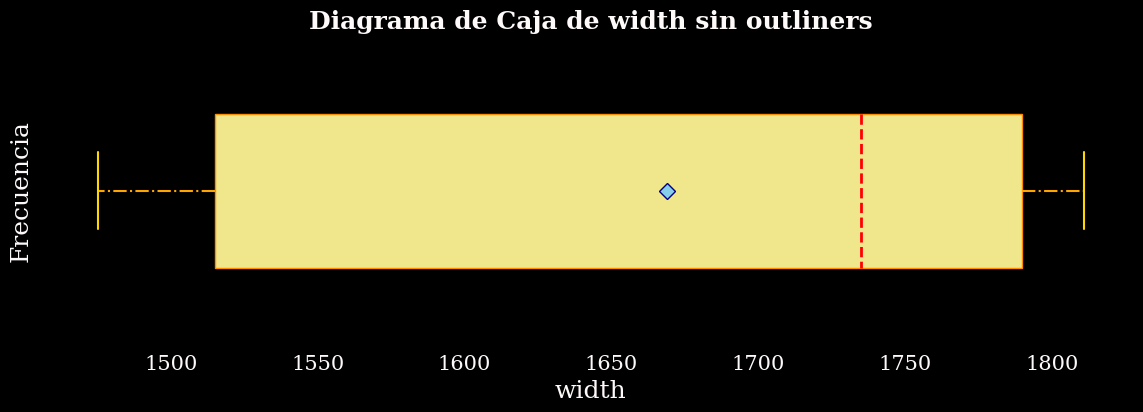

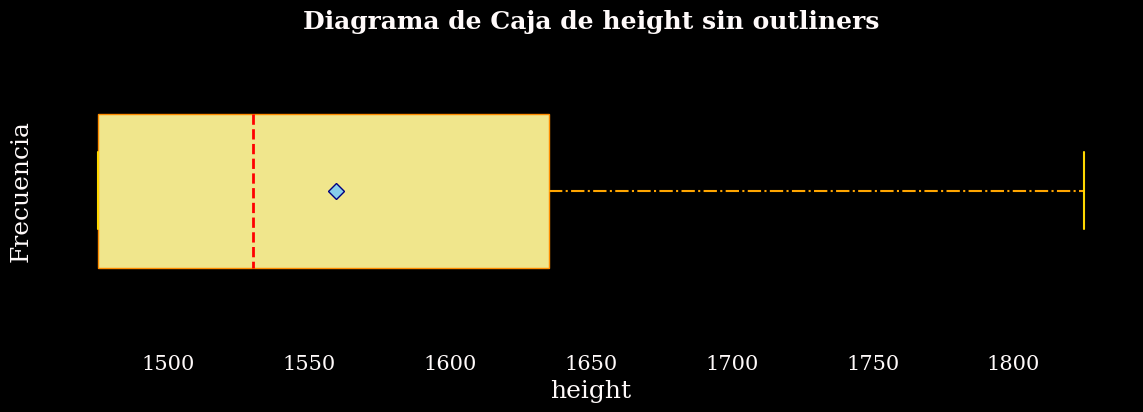

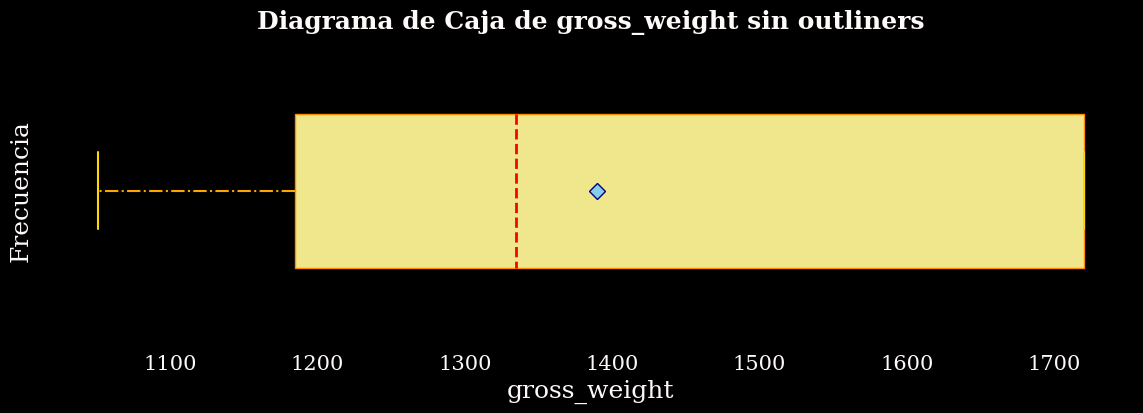

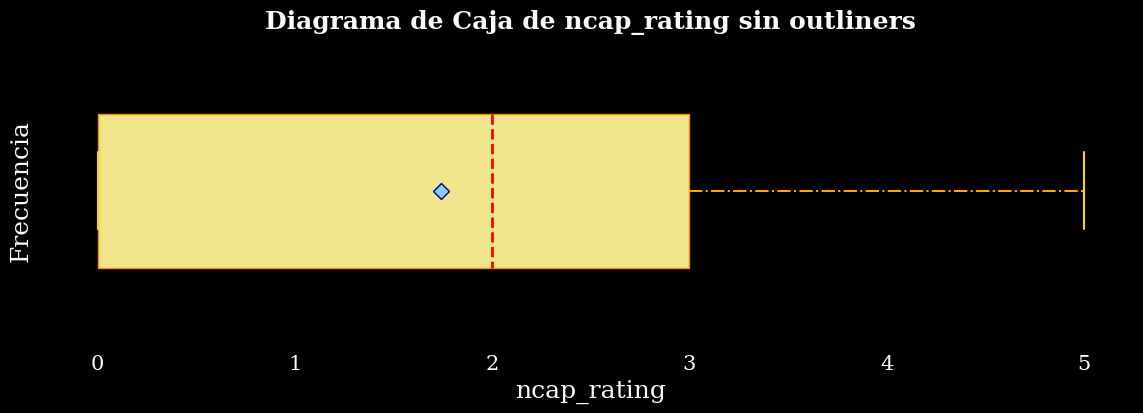

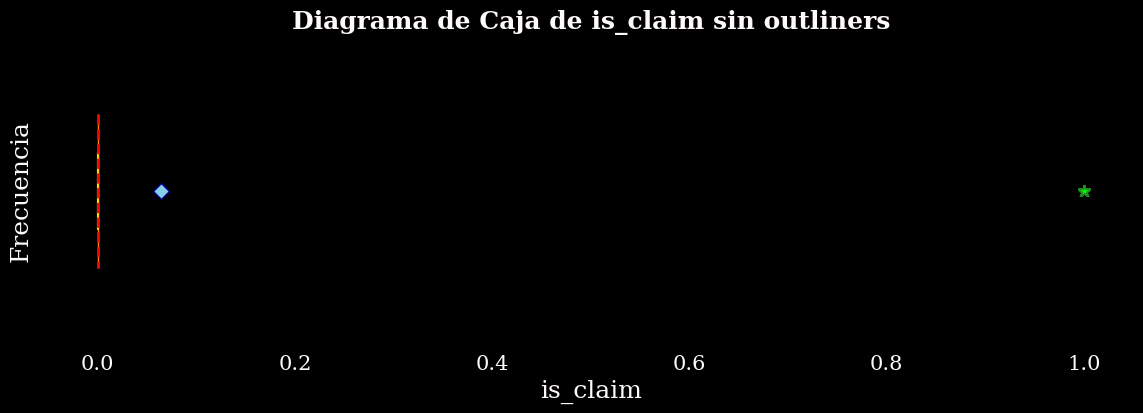

In [ ]:
#Se comprueba que se eliminaron los outliners
for i in df_cnumericas:
  #2)Dataframe del asegurado
  # Creaamos la figura y ajustar el tamaño
  # facecolor--> color  de fondo
  plt.figure(figsize=(14,4), facecolor='black')
  #Ajustamos el estilo del gráfico
  sns.set_style("white")
  #plt.rcParams['font.family']-->Tipo de letra para el gráfico
  plt.rcParams['font.family'] = 'DejaVu Serif'
  # Creamos el diagrama de caja
  #datos=df_ci--> datos para hacer el diagrama
  #x='population_density'-->variable sobre la que se hace el diagrama de caja
  #dict(facecolor='red', color='khaki'), -->  color de la caja
  #whiskerprops=dict(color='navy'),--> Lineas horizontales
  #capprops=dict(color='black'),--> Lineas verticales
  #flierprops=dict(markerfacecolor='lime', markeredgecolor='forestgreen'--> Valores atípicos
  #width=0.5 -->Largo de la caja
  #showmeans=True-->Muestra la media
  #medianprops=dict(color='red')--> Mediana
  #meanprops=dict(marker='D', markersize=8,)-->Media
  grafica= sns.boxplot(data=df_c, x=df_c[i],showmeans=True, width=0.5,
  #Colores dela caja
              boxprops=dict(facecolor='khaki', edgecolor='darkorange'),
  #Lineas verticales
              whiskerprops=dict(color='orange',linewidth=1.5,linestyle='dashdot'),
  #Lineas horizontales
              capprops=dict(color='gold',linewidth=1.5,linestyle='solid'),
  #Valores atípicos
              flierprops=dict(marker='*', markersize=9,markerfacecolor='lime',
                              markeredgecolor='forestgreen'),
  #Mostrar la mediana
              medianprops=dict(color='red', linewidth=2,linestyle="dashed"),
  #Mostrar la media
              meanprops=dict(marker='D', markersize=8,
                            markerfacecolor='skyblue', markeredgecolor='navy')
              )
  # Eliminar bordes de la gráfica
  #Borde superior
  plt.gca().spines['top'].set_visible(False)
  #Borde derecho
  plt.gca().spines['right'].set_visible(False)
  #Borde izquierdo
  plt.gca().spines['left'].set_visible(False)
  #Borde inferior
  plt.gca().spines['bottom'].set_visible(False)

  # facecolor-->' color  de fondo
  grafica.set_facecolor('black')
  # Agregamos el título
  #fontweight='bold'-->Negritas
  plt.title(f'Diagrama de Caja de {i} sin outliners',
            fontsize=18, color='snow', fontweight='bold')
  #Agregamos las etiquetas de los valores del eje X
  plt.xticks(fontsize=15, color='snow')
  # Etiquetamos los ejes
  plt.xlabel(i, fontsize=18, color='snow')
  plt.ylabel('Frecuencia', fontsize=18, color='snow')
  # Mostramos el gráfico
  plt.show()

In [ ]:
#Registros sin outliners
df_c.shape

(51104, 39)

**#3)Dataframe del carro**

---
## **Conversión a variables númericas** 🔢
---

**Nota 1**: El dataframe $0)$ (df_i) No se convirtió en variables numéricas por que es insignificante para realizar el modelo

**Nota 2**: El dataframe  $2)$ (df_a)Ya tiene todas sus variables numéricas

In [ ]:
#3)Dataframe sobre el carro
#Reemplazar los valores de "No" por 0 y de "Yes" por 1
df_c = df_c.replace({'No': 0, 'Yes': 1})

<ipython-input-55-fcc0a8e871ae>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_c = df_c.replace({'No': 0, 'Yes': 1})


In [ ]:
#Mostrar los datos
df_c.head(5)

age_of_car  make segment model fuel_type     max_torque          max_power  \
0           5     1       A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm   
1           2     1       A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm   
2           2     1       A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm   
3          11     1      C1    M2    Petrol  113Nm@4400rpm   88.50bhp@6000rpm   
5           7     3      C2    M4    Diesel  250Nm@2750rpm  113.45bhp@4000rpm   

          engine_type  airbags  is_esc  is_adjustable_steering  is_tpms  \
0   F8D Petrol Engine        2       0                       0        0   
1   F8D Petrol Engine        2       0                       0        0   
2   F8D Petrol Engine        2       0                       0        0   
3  1.2 L K12N Dualjet        2       1                       1        0   
5       1.5 L U2 CRDi        6       1                       1        1   

   is_parking_sensors  is_parking_camera rear_brakes_type  displacement  \
0                   1                  0             Drum           796   
1                   1                  0             Drum           796   
2                   1                  0             Drum           796   
3                   1                  1             Drum          1197   
5                   1                  1             Disc          1493   

   cylinder transmission_type  gear_box steering_type  turning_radius  length  \
0         3            Manual         5         Power              46    3445   
1         3            Manual         5         Power              46    3445   
2         3            Manual         5         Power              46    3445   
3         4         Automatic         5      Electric              48    3995   
5         4         Automatic         6         Power              52    4300   

   width  height  gross_weight  is_front_fog_lights  is_rear_window_wiper  \
0   1515    1475          1185                    0                     0   
1   1515    1475          1185                    0                     0   
2   1515    1475          1185                    0                     0   
3   1735    1515          1335                    1                     0   
5   1790    1635          1720                    1                     1   

   is_rear_window_washer  is_rear_window_defogger  is_brake_assist  \
0                      0                        0                0   
1                      0                        0                0   
2                      0                        0                0   
3                      0                        1                1   
5                      1                        1                1   

   is_power_door_locks  is_central_locking  is_power_steering  \
0                    0                   0                  1   
1                    0                   0                  1   
2                    0                   0                  1   
3                    1                   1                  1   
5                    1                   1                  1   

   is_driver_seat_height_adjustable  is_day_night_rear_view_mirror  is_ecw  \
0                                 0                              0       0   
1                                 0                              0       0   
2                                 0                              0       0   
3                                 1                              1       1   
5                                 1                              0       1   

   is_speed_alert  ncap_rating  is_claim  
0               1            0         0  
1               1            0         0  
2               1            0         0  
3               1            2         0  
5               1            3         0

In [ ]:
#Corroborar las variables se conviriteron en numéricas
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51104 entries, 0 to 58591
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   age_of_car                        51104 non-null  int64 
 1   make                              51104 non-null  int64 
 2   segment                           51104 non-null  object
 3   model                             51104 non-null  object
 4   fuel_type                         51104 non-null  object
 5   max_torque                        51104 non-null  object
 6   max_power                         51104 non-null  object
 7   engine_type                       51104 non-null  object
 8   airbags                           51104 non-null  int64 
 9   is_esc                            51104 non-null  int64 
 10  is_adjustable_steering            51104 non-null  int64 
 11  is_tpms                           51104 non-null  int64 
 12  is_parking_sensors     

In [ ]:
#Crear un dataframe con las variables que aún no son numéricas
df_o=df[['segment','model','fuel_type','max_torque','max_power','engine_type','rear_brakes_type','transmission_type','steering_type']]
#Mostrar las 5 primeras filas del dataframe
df_o.head(5)


segment model fuel_type     max_torque         max_power  \
0       A    M1       CNG   60Nm@3500rpm  40.36bhp@6000rpm   
1       A    M1       CNG   60Nm@3500rpm  40.36bhp@6000rpm   
2       A    M1       CNG   60Nm@3500rpm  40.36bhp@6000rpm   
3      C1    M2    Petrol  113Nm@4400rpm  88.50bhp@6000rpm   
4       A    M3    Petrol   91Nm@4250rpm  67.06bhp@5500rpm   

          engine_type rear_brakes_type transmission_type steering_type  
0   F8D Petrol Engine             Drum            Manual         Power  
1   F8D Petrol Engine             Drum            Manual         Power  
2   F8D Petrol Engine             Drum            Manual         Power  
3  1.2 L K12N Dualjet             Drum         Automatic      Electric  
4             1.0 SCe             Drum         Automatic      Electric

Análisis individual para cada variable

**transmission_type** Es el tipo de transmisión que tiene el auto Solo tiene $2$ opciones Automatic o Manual por lo que podemos asignarle $0:=$"Automatic" y $1:=$"Manual"

**rear_brakes_type** Es el tipo de frenos traseros que usa el auto y solo tiene $2$ opciones Drum (Tambor / Batería) o Disc (Disco) por lo que podemos asignarle $0:=$"Drum" y $1:=$"Disc"

In [ ]:
#3)Dataframe sobre el carro
#Reemplazar valores de "Automatic" por 0 y de "Manual" por 1
df_c = df_c.replace({'Automatic': 0, 'Manual': 1})

<ipython-input-59-315bca4cebb0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_c = df_c.replace({'Automatic': 0, 'Manual': 1})


In [ ]:
#3)Dataframe sobre el carro
#Reemplazamos los valores de "Drum" por 0 y de "Disc" por 1
df_c = df_c.replace({'Drum': 0, 'Disc': 1})

<ipython-input-60-f86208a11af4>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_c = df_c.replace({'Drum': 0, 'Disc': 1})


In [ ]:
#Mostrar las variables convertidas a numéricas
df_c[['transmission_type','rear_brakes_type']].head(5)

transmission_type  rear_brakes_type
0                  1                 0
1                  1                 0
2                  1                 0
3                  0                 0
5                  0                 1

In [ ]:
#Renombrar columnas
#'transmission_type'='is_transmission_type_manual'
#'rear_brakes_type'='is_rear_brakes_type_disc'
df_c = df_c.rename(columns={'transmission_type':'is_transmission_type_manual',
                            'rear_brakes_type': 'is_rear_brakes_type_disc'})

¿Como las convertimos las 6 variables restantes (steering_type,engine_type,model,max_power,max_torque,fuel_type,model,segment) en variables numéricas?

**Solución**:Usar variables dummys


---
### **Variables categóricas a variables númericas mediante variables dummies**💎
---

Las **variables dummies** surgen del problema de tener variables categóricas que se requieren usar en modelos de regresión por ejemplo pensemos en una varibles $E :=$ que es la estación del año (Primavera, verano, otoño e invierno)

¿Cómo multiplicamos o sumamos a la variable $E$ con su parametro $\beta$ ?
Es claro que no podemos hacer $5*$(otoño) ó $34+$invierno para obtener variables númericas ocupamos las variables dummies su función principal es convertir categorías cualitativas en valores numéricas (generalmente $0$ y $1$)

Por ejemplo para el sexo de una persona tenemos 2 variables dummies

$D_1=1$ Si es "Hombre", $0$ otro caso

$D_2=1$ Si es "Mujer", $0$ otro caso



**Nota importante**: Para evitar **colinealidad** y que no se cumplan los supuestos del modelo de regresión se debe usar $n-1$ variables dummies, es decir si tenemos $2$ categorías ("Hombre" y "Mujer") solo se programan $1$ variable dummy, si tenemos $4$ categorías ("Primavera","Verano","Otoño" e "Invierno") se programan $3$ variables dummies ya que la restante se puede inferir y ponerla causa problemas de multicolinealidad

**Ejemplo** para la variable 'steering_type' que tiene 3 categorías ('Power', 'Electric' y 'Manual'), se tienen 3 variables dummies pero únicamente se ocupan 2

$D_1=1$ Si es "Power", $0$ otro caso

$D_2=1$ Si es "Electric",$0$ otro caso

$D_3=1$ Si es "Manual", $0$ otro caso


**pd.get_dummies(df, columns=[$x$], drop_first=True)** Convierte en variables dummies la columna $x$ del dataframe 'df' y elimina la colinealidad con drop_first=True

In [ ]:
# Convertir las variables categóricas en variables dummy
#df_cd = Data frame para las variables del carro con variables dummies
#pd.get_dummies <--lo convierte con variables dummies
#df_c, -->Datos
#columns=->Columnas que se convertiran en dummies
#drop_first=True-->Elimina la colinealidad
df_cd = pd.get_dummies(df_c, columns=['steering_type','engine_type',
                                      'model','max_power',
                                      'max_torque','fuel_type',
                                      'model','segment'], drop_first=True)
#Mortrar las 5 filas del dataframe nuevo
df_cd.head(5)

age_of_car  make  airbags  is_esc  is_adjustable_steering  is_tpms  \
0           5     1        2       0                       0        0   
1           2     1        2       0                       0        0   
2           2     1        2       0                       0        0   
3          11     1        2       1                       1        0   
5           7     3        6       1                       1        1   

   is_parking_sensors  is_parking_camera  is_rear_brakes_type_disc  \
0                   1                  0                         0   
1                   1                  0                         0   
2                   1                  0                         0   
3                   1                  1                         0   
5                   1                  1                         1   

   displacement  cylinder  is_transmission_type_manual  gear_box  \
0           796         3                            1         5   
1           796         3                            1         5   
2           796         3                            1         5   
3          1197         4                            0         5   
5          1493         4                            0         6   

   turning_radius  length  width  height  gross_weight  is_front_fog_lights  \
0              46    3445   1515    1475          1185                    0   
1              46    3445   1515    1475          1185                    0   
2              46    3445   1515    1475          1185                    0   
3              48    3995   1735    1515          1335                    1   
5              52    4300   1790    1635          1720                    1   

   is_rear_window_wiper  is_rear_window_washer  is_rear_window_defogger  \
0                     0                      0                        0   
1                     0                      0                        0   
2                     0                      0                        0   
3                     0                      0                        1   
5                     1                      1                        1   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0                0                    0                   0   
1                0                    0                   0   
2                0                    0                   0   
3                1                    1                   1   
5                1                    1                   1   

   is_power_steering  is_driver_seat_height_adjustable  \
0                  1                                 0   
1                  1                                 0   
2                  1                                 0   
3                  1                                 1   
5                  1                                 1   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1            0   
1                              0       0               1            0   
2                              0       0               1            0   
3                              1       1               1            2   
5                              0       1               1            3   

   is_claim  steering_type_Electric  steering_type_Power  \
0         0                   False                 True   
1         0                   False                 True   
2         0                   False                 True   
3         0                    True                False   
5         0                   False                 True   

   engine_type_1.5 L U2 CRDi  engine_type_1.5 Turbocharged Revotron  \
0                      False                                  False   
1                      False                                  False   
2                      False                                  False

In [ ]:
#4)Dataframe sobre el carro-dummies
#Reemplazamos los valores de False por 0 y de True por 1
#Nota se eliminan las comillas ('') por que son valores booleanos no string
df_cd = df_cd.replace({False: 0, True: 1})
#Muestra las 5 filas del dataframe nuevo
df_cd.head(5)


<ipython-input-64-b9acc40bdd59>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cd = df_cd.replace({False: 0, True: 1})


age_of_car  make  airbags  is_esc  is_adjustable_steering  is_tpms  \
0           5     1        2       0                       0        0   
1           2     1        2       0                       0        0   
2           2     1        2       0                       0        0   
3          11     1        2       1                       1        0   
5           7     3        6       1                       1        1   

   is_parking_sensors  is_parking_camera  is_rear_brakes_type_disc  \
0                   1                  0                         0   
1                   1                  0                         0   
2                   1                  0                         0   
3                   1                  1                         0   
5                   1                  1                         1   

   displacement  cylinder  is_transmission_type_manual  gear_box  \
0           796         3                            1         5   
1           796         3                            1         5   
2           796         3                            1         5   
3          1197         4                            0         5   
5          1493         4                            0         6   

   turning_radius  length  width  height  gross_weight  is_front_fog_lights  \
0              46    3445   1515    1475          1185                    0   
1              46    3445   1515    1475          1185                    0   
2              46    3445   1515    1475          1185                    0   
3              48    3995   1735    1515          1335                    1   
5              52    4300   1790    1635          1720                    1   

   is_rear_window_wiper  is_rear_window_washer  is_rear_window_defogger  \
0                     0                      0                        0   
1                     0                      0                        0   
2                     0                      0                        0   
3                     0                      0                        1   
5                     1                      1                        1   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0                0                    0                   0   
1                0                    0                   0   
2                0                    0                   0   
3                1                    1                   1   
5                1                    1                   1   

   is_power_steering  is_driver_seat_height_adjustable  \
0                  1                                 0   
1                  1                                 0   
2                  1                                 0   
3                  1                                 1   
5                  1                                 1   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1            0   
1                              0       0               1            0   
2                              0       0               1            0   
3                              1       1               1            2   
5                              0       1               1            3   

   is_claim  steering_type_Electric  steering_type_Power  \
0         0                       0                    1   
1         0                       0                    1   
2         0                       0                    1   
3         0                       1                    0   
5         0                       0                    1   

   engine_type_1.5 L U2 CRDi  engine_type_1.5 Turbocharged Revotron  \
0                          0                                      0   
1                          0                                      0   
2                          0                                      0

In [ ]:
#Comprobar que todas las variables son numéricas
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51104 entries, 0 to 58591
Data columns (total 74 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   age_of_car                             51104 non-null  int64
 1   make                                   51104 non-null  int64
 2   airbags                                51104 non-null  int64
 3   is_esc                                 51104 non-null  int64
 4   is_adjustable_steering                 51104 non-null  int64
 5   is_tpms                                51104 non-null  int64
 6   is_parking_sensors                     51104 non-null  int64
 7   is_parking_camera                      51104 non-null  int64
 8   is_rear_brakes_type_disc               51104 non-null  int64
 9   displacement                           51104 non-null  int64
 10  cylinder                               51104 non-null  int64
 11  is_transmission_type_manual      

In [ ]:
#1)Dataframe de ciudad
# Convertir las variables categóricas en variables dummy
#df_ci-->Datos
#pd.get_dummies--> Convertir variables en dummies
#columns-->Columnas que se convertiran en dummies
#drop_first=True-->Elimina la colinealidad

df_cid = pd.get_dummies(df_ci, columns=['area_cluster'],
                        drop_first=True)
#Mostrar las 5 filas del dataframe nuevo
df_cid.head(5)

population_density  area_cluster_C11  area_cluster_C12  area_cluster_C13  \
0                4990             False             False             False   
1               27003             False             False             False   
2                4076             False             False             False   
3               21622             False             False             False   
4               34738             False             False             False   

   area_cluster_C14  area_cluster_C15  area_cluster_C16  area_cluster_C18  \
0             False             False             False             False   
1             False             False             False             False   
2             False             False             False             False   
3             False             False             False             False   
4             False             False             False             False   

   area_cluster_C19  area_cluster_C2  area_cluster_C20  area_cluster_C21  \
0             False            False             False             False   
1             False             True             False             False   
2             False            False             False             False   
3             False            False             False             False   
4             False            False             False             False   

   area_cluster_C22  area_cluster_C3  area_cluster_C4  area_cluster_C5  \
0             False            False            False            False   
1             False            False            False            False   
2             False             True            False            False   
3             False            False             True            False   
4             False            False            False             True   

   area_cluster_C6  area_cluster_C7  area_cluster_C8  area_cluster_C9  
0            False            False            False            False  
1            False            False            False            False  
2            False            False            False            False  
3            False            False            False            False  
4            False            False            False            False

In [ ]:
#5)Dataframe sobre el ciudad-dummies
#Reemplazar los valores de False por 0 y de True por 1
#Nota se eliminan las comillas ('') por que son valores booleanos no string
df_cid = df_cid.replace({False: 0, True: 1})
#Mmostrar las 5 filas del dataframe nuevo
df_cid.head(5)

<ipython-input-67-acf65a1b614a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cid = df_cid.replace({False: 0, True: 1})


population_density  area_cluster_C11  area_cluster_C12  area_cluster_C13  \
0                4990                 0                 0                 0   
1               27003                 0                 0                 0   
2                4076                 0                 0                 0   
3               21622                 0                 0                 0   
4               34738                 0                 0                 0   

   area_cluster_C14  area_cluster_C15  area_cluster_C16  area_cluster_C18  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   area_cluster_C19  area_cluster_C2  area_cluster_C20  area_cluster_C21  \
0                 0                0                 0                 0   
1                 0                1                 0                 0   
2                 0                0                 0                 0   
3                 0                0                 0                 0   
4                 0                0                 0                 0   

   area_cluster_C22  area_cluster_C3  area_cluster_C4  area_cluster_C5  \
0                 0                0                0                0   
1                 0                0                0                0   
2                 0                1                0                0   
3                 0                0                1                0   
4                 0                0                0                1   

   area_cluster_C6  area_cluster_C7  area_cluster_C8  area_cluster_C9  
0                0                0                0                0  
1                0                0                0                0  
2                0                0                0                0  
3                0                0                0                0  
4                0                0                0                0

In [ ]:
#Comprobar que todas las variables son numéricas
df_cid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54945 entries, 0 to 58591
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   population_density  54945 non-null  int64
 1   area_cluster_C11    54945 non-null  int64
 2   area_cluster_C12    54945 non-null  int64
 3   area_cluster_C13    54945 non-null  int64
 4   area_cluster_C14    54945 non-null  int64
 5   area_cluster_C15    54945 non-null  int64
 6   area_cluster_C16    54945 non-null  int64
 7   area_cluster_C18    54945 non-null  int64
 8   area_cluster_C19    54945 non-null  int64
 9   area_cluster_C2     54945 non-null  int64
 10  area_cluster_C20    54945 non-null  int64
 11  area_cluster_C21    54945 non-null  int64
 12  area_cluster_C22    54945 non-null  int64
 13  area_cluster_C3     54945 non-null  int64
 14  area_cluster_C4     54945 non-null  int64
 15  area_cluster_C5     54945 non-null  int64
 16  area_cluster_C6     54945 non-null  int64
 17

---
#**Análisis bivariado**:🔗
---

El análisis bivariado examina la relación entre dos variables a la vez. ¿Por qué es importante hacer un análisis bivariado de los datos?

El principal objetivo es detectar correlaciones altas entre variables independientes para evitar la multicolinealidad, que puede aumentar de manera ficticia varianzas y hacer impreciso modelo.

Si 2 variables explicativas están muy correlacionadas entre sí, podrían causar problemas en modelos de regresión logística por eso es importante eliminar las variables altamente correlacionadas.

Un nivel de correlación menor a $0.7$ es aceptable, pero si es mayo a dicho valor existe una alta correlación y es posible tener problemas de multicolinealidad

Además de usar el coeficiente de correlación se recomienda usar VIF (Variance Inflation Factor) para medir la multicolinealidad

In [ ]:
#de=Data frame de datos entrenar
de=pd.concat([df_cd,df_cid,df_a],axis=1)
#Mostramos las 5 primeras filas del dataframe
de.head(5)


age_of_car  make  airbags  is_esc  is_adjustable_steering  is_tpms  \
0         5.0   1.0      2.0     0.0                     0.0      0.0   
1         2.0   1.0      2.0     0.0                     0.0      0.0   
2         2.0   1.0      2.0     0.0                     0.0      0.0   
3        11.0   1.0      2.0     1.0                     1.0      0.0   
5         7.0   3.0      6.0     1.0                     1.0      1.0   

   is_parking_sensors  is_parking_camera  is_rear_brakes_type_disc  \
0                 1.0                0.0                       0.0   
1                 1.0                0.0                       0.0   
2                 1.0                0.0                       0.0   
3                 1.0                1.0                       0.0   
5                 1.0                1.0                       1.0   

   displacement  cylinder  is_transmission_type_manual  gear_box  \
0         796.0       3.0                          1.0       5.0   
1         796.0       3.0                          1.0       5.0   
2         796.0       3.0                          1.0       5.0   
3        1197.0       4.0                          0.0       5.0   
5        1493.0       4.0                          0.0       6.0   

   turning_radius  length   width  height  gross_weight  is_front_fog_lights  \
0            46.0  3445.0  1515.0  1475.0        1185.0                  0.0   
1            46.0  3445.0  1515.0  1475.0        1185.0                  0.0   
2            46.0  3445.0  1515.0  1475.0        1185.0                  0.0   
3            48.0  3995.0  1735.0  1515.0        1335.0                  1.0   
5            52.0  4300.0  1790.0  1635.0        1720.0                  1.0   

   is_rear_window_wiper  is_rear_window_washer  is_rear_window_defogger  \
0                   0.0                    0.0                      0.0   
1                   0.0                    0.0                      0.0   
2                   0.0                    0.0                      0.0   
3                   0.0                    0.0                      1.0   
5                   1.0                    1.0                      1.0   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0              0.0                  0.0                 0.0   
1              0.0                  0.0                 0.0   
2              0.0                  0.0                 0.0   
3              1.0                  1.0                 1.0   
5              1.0                  1.0                 1.0   

   is_power_steering  is_driver_seat_height_adjustable  \
0                1.0                               0.0   
1                1.0                               0.0   
2                1.0                               0.0   
3                1.0                               1.0   
5                1.0                               1.0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                            0.0     0.0             1.0          0.0   
1                            0.0     0.0             1.0          0.0   
2                            0.0     0.0             1.0          0.0   
3                            1.0     1.0             1.0          2.0   
5                            0.0     1.0             1.0          3.0   

   is_claim  steering_type_Electric  steering_type_Power  \
0       0.0                     0.0                  1.0   
1       0.0                     0.0                  1.0   
2       0.0                     0.0                  1.0   
3       0.0                     1.0                  0.0   
5       0.0                     0.0                  1.0   

   engine_type_1.5 L U2 CRDi  engine_type_1.5 Turbocharged Revotron  \
0                        0.0                                    0.0   
1                        0.0                                    0.0   
2                        0.0                                 

In [ ]:
#Información del dataset
de.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58556 entries, 0 to 58369
Data columns (total 95 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age_of_car                             51104 non-null  float64
 1   make                                   51104 non-null  float64
 2   airbags                                51104 non-null  float64
 3   is_esc                                 51104 non-null  float64
 4   is_adjustable_steering                 51104 non-null  float64
 5   is_tpms                                51104 non-null  float64
 6   is_parking_sensors                     51104 non-null  float64
 7   is_parking_camera                      51104 non-null  float64
 8   is_rear_brakes_type_disc               51104 non-null  float64
 9   displacement                           51104 non-null  float64
 10  cylinder                               51104 non-null  float64
 11  is_tran

**Nota** Se unieron 3 dataframes que originalmente tenían las mismas dimensiones, pero después de eliminar sus outliners ahora tienen dimensiones diferentes. Se eliminarán las filas son al menos un valor nulo ya que si tienen un valor nulo implica que tuvieron un outliner que puede sesgar nuestro modelo de esta manera el modelo tendrá un mejor resultado si se eliminan estos datos

In [ ]:
#Eliminar valores nulos
de=de.dropna()

In [ ]:
#Información del dataset
de.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44045 entries, 0 to 58591
Data columns (total 95 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age_of_car                             44045 non-null  float64
 1   make                                   44045 non-null  float64
 2   airbags                                44045 non-null  float64
 3   is_esc                                 44045 non-null  float64
 4   is_adjustable_steering                 44045 non-null  float64
 5   is_tpms                                44045 non-null  float64
 6   is_parking_sensors                     44045 non-null  float64
 7   is_parking_camera                      44045 non-null  float64
 8   is_rear_brakes_type_disc               44045 non-null  float64
 9   displacement                           44045 non-null  float64
 10  cylinder                               44045 non-null  float64
 11  is_tran

In [ ]:
#Confirmar que no existen valores nulos por columnas
de.isnull().sum()

age_of_car                0
make                      0
airbags                   0
is_esc                    0
is_adjustable_steering    0
                         ..
area_cluster_C6           0
area_cluster_C7           0
area_cluster_C8           0
area_cluster_C9           0
age_of_policyholder       0
Length: 95, dtype: int64

In [ ]:
#Confirmar que no existen valores nulos
de.isnull().sum().sum()

np.int64(0)

In [ ]:
#Exportar el dataframe a un excel
de.to_excel("datos_aseguradora.xlsx")

In [ ]:
#Mostramos las medidas estadísticas del dataframe de
de.describe()

age_of_car          make       airbags        is_esc  \
count  44045.000000  44045.000000  44045.000000  44045.000000   
mean       6.053332      1.737859      3.078511      0.303303   
std        5.257111      1.133546      1.808067      0.459690   
min        0.000000      1.000000      1.000000      0.000000   
25%        1.000000      1.000000      2.000000      0.000000   
50%        4.000000      1.000000      2.000000      0.000000   
75%       11.000000      3.000000      6.000000      1.000000   
max       19.000000      5.000000      6.000000      1.000000   

       is_adjustable_steering       is_tpms  is_parking_sensors  \
count            44045.000000  44045.000000             44045.0   
mean                 0.606266      0.275536                 1.0   
std                  0.488583      0.446789                 0.0   
min                  0.000000      0.000000                 1.0   
25%                  0.000000      0.000000                 1.0   
50%                  1.000000      0.000000                 1.0   
75%                  1.000000      1.000000                 1.0   
max                  1.000000      1.000000                 1.0   

       is_parking_camera  is_rear_brakes_type_disc  displacement  \
count       44045.000000              44045.000000  44045.000000   
mean            0.345011                  0.275536   1161.898218   
std             0.475377                  0.446789    274.243614   
min             0.000000                  0.000000    796.000000   
25%             0.000000                  0.000000    796.000000   
50%             0.000000                  0.000000   1197.000000   
75%             1.000000                  1.000000   1493.000000   
max             1.000000                  1.000000   1498.000000   

           cylinder  is_transmission_type_manual      gear_box  \
count  44045.000000                 44045.000000  44045.000000   
mean       3.629901                     0.703349      5.282189   
std        0.482836                     0.456787      0.450070   
min        3.000000                     0.000000      5.000000   
25%        3.000000                     0.000000      5.000000   
50%        4.000000                     1.000000      5.000000   
75%        4.000000                     1.000000      6.000000   
max        4.000000                     1.000000      6.000000   

       turning_radius        length         width        height  gross_weight  \
count    44045.000000  44045.000000  44045.000000  44045.000000  44045.000000   
mean        48.447883   3848.573255   1671.484913   1561.267567   1393.707731   
std          2.393863    327.540055    114.950036     82.270656    220.281180   
min         45.000000   3445.000000   1475.000000   1475.000000   1051.000000   
25%         46.000000   3445.000000   1515.000000   1475.000000   1185.000000   
50%         48.000000   3845.000000   1735.000000   1530.000000   1335.000000   
75%         52.000000   4300.000000   1790.000000   1635.000000   1720.000000   
max         52.000000   4300.000000   1811.000000   1825.000000   1720.000000   

       is_front_fog_lights  is_rear_window_wiper  is_rear_window_washer  \
count         44045.000000          44045.000000           44045.000000   
mean              0.606266              0.275536               0.275536   
std               0.488583              0.446789               0.446789   
min               0.000000              0.000000               0.000000   
25%               0.000000              0.000000               0.000000   
50%               1.000000              0.000000               0.000000   
75%               1.000000              1.000000               1.000000   
max               1.000000              1.000000               1.000000   

       is_rear_window_defogger  is_brake_assist  is_power_door_locks  \
count             44045.000000     44045.000000         44045.000000   
mean                  0.345011         0.571211             0

In [ ]:
# Matriz de correlación
de.corr()


age_of_car      make   airbags    is_esc  \
age_of_car                1.000000  0.188077  0.203201  0.218732   
make                      0.188077  1.000000  0.687248  0.666389   
airbags                   0.203201  0.687248  1.000000  0.932499   
is_esc                    0.218732  0.666389  0.932499  1.000000   
is_adjustable_steering    0.374838  0.488541  0.507467  0.502105   
...                            ...       ...       ...       ...   
area_cluster_C6          -0.026920 -0.024050 -0.018768 -0.020791   
area_cluster_C7          -0.037736 -0.015842 -0.018668 -0.023729   
area_cluster_C8           0.189455  0.112580  0.143474  0.142507   
area_cluster_C9          -0.028505 -0.020438 -0.034251 -0.031822   
age_of_policyholder      -0.046477 -0.038840 -0.007304 -0.015002   

                        is_adjustable_steering   is_tpms  is_parking_sensors  \
age_of_car                            0.374838  0.207090                 NaN   
make                                  0.488541  0.686681                 NaN   
airbags                               0.507467  0.996497                 NaN   
is_esc                                0.502105  0.934683                 NaN   
is_adjustable_steering                1.000000  0.496994                 NaN   
...                                        ...       ...                 ...   
area_cluster_C6                      -0.031337 -0.019390                 NaN   
area_cluster_C7                      -0.033752 -0.018944                 NaN   
area_cluster_C8                       0.267039  0.145549                 NaN   
area_cluster_C9                      -0.046627 -0.035022                 NaN   
age_of_policyholder                   0.004037 -0.009390                 NaN   

                        is_parking_camera  is_rear_brakes_type_disc  \
age_of_car                       0.220200                  0.207090   
make                             0.896891                  0.686681   
airbags                          0.849392                  0.996497   
is_esc                           0.909112                  0.934683   
is_adjustable_steering           0.556241                  0.496994   
...                                   ...                       ...   
area_cluster_C6                 -0.024259                 -0.019390   
area_cluster_C7                 -0.022393                 -0.018944   
area_cluster_C8                  0.135632                  0.145549   
area_cluster_C9                 -0.026921                 -0.035022   
age_of_policyholder             -0.032920                 -0.009390   

                        displacement  cylinder  is_transmission_type_manual  \
age_of_car                  0.386368  0.384894                    -0.211638   
make                        0.769712  0.462491                    -0.641562   
airbags                     0.734343  0.457233                    -0.947114   
is_esc                      0.731520  0.475782                    -0.984285   
is_adjustable_steering      0.861227  0.951159                    -0.523368   
...                              ...       ...                          ...   
area_cluster_C6            -0.034494 -0.033200                     0.019437   
area_cluster_C7            -0.031739 -0.034366                     0.022361   
area_cluster_C8             0.262333  0.271684                    -0.142183   
area_cluster_C9            -0.049514 -0.048552                     0.032611   
age_of_policyholder        -0.032053 -0.003317                     0.014642   

                        gear_box  turning_radius    length     width  \
age_of_car              0.214192        0.318883  0.368316  0.408020   
make                    0.711173        0.774101  0.743602  0.552715   
airbags                 0.980417        0.923357  0.847078  0.650835   
is_esc                  0.950272        0.896264  0.853042  0.660944   
is_adjustable_steering  0.475030        0.745842  0.828774  0.925785   
...         

In [ ]:
# Grafico de correlación
plt.figure(figsize = (70, 70))
sns.heatmap(de.corr(), annot = True, fmt = ".2f")
plt.show()

In [ ]:
#Eliminar la columna "is_claim" para hacer el análisis de multicolinealidad
d_VIF = de.drop(columns=['is_claim'])

In [ ]:
#Se crea un dataframe vacio
vif_data = pd.DataFrame()
#Columnas variables con los encabezados de d_VIF
vif_data["variables"] = d_VIF.columns
#Calculo del VIF para cada variable
vif_data["VIF"] = [variance_inflation_factor(d_VIF.values, i) for i in range(d_VIF.shape[1])]
vif_data

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


variables          VIF
0               age_of_car     1.247015
1                     make    16.128589
2                  airbags    37.347085
3                   is_esc  7168.374462
4   is_adjustable_steering   542.550161
..                     ...          ...
89         area_cluster_C6     1.001890
90         area_cluster_C7     1.034792
91         area_cluster_C8     1.238076
92         area_cluster_C9     1.005444
93     age_of_policyholder     1.026066

[94 rows x 2 columns]

In [ ]:
#Ordenar de manera ascente el valor de VIF
eliminar=vif_data.sort_values(by='VIF', ascending=True)
eliminar.head(30)

variables        VIF
6            is_parking_sensors   0.000000
85             area_cluster_C22   1.000704
83             area_cluster_C20   1.001461
89              area_cluster_C6   1.001890
92              area_cluster_C9   1.005444
87              area_cluster_C4   1.006255
73           population_density   1.006489
79             area_cluster_C16   1.008530
84             area_cluster_C21   1.008745
74             area_cluster_C11   1.016229
80             area_cluster_C18   1.019739
81             area_cluster_C19   1.023640
93          age_of_policyholder   1.026066
78             area_cluster_C15   1.026169
90              area_cluster_C7   1.034792
77             area_cluster_C14   1.040866
76             area_cluster_C13   1.053238
75             area_cluster_C12   1.095994
82              area_cluster_C2   1.201088
91              area_cluster_C8   1.238076
0                    age_of_car   1.247015
86              area_cluster_C3   1.259344
88              area_cluster_C5   1.773907
1                          make  16.128589
53     max_torque_170Nm@4000rpm  24.708476
29               is_speed_alert  26.151000
63                     model_M2  29.890791
17                 gross_weight  34.582477
2                       airbags  37.347085
47  max_power_118.36bhp@5500rpm  39.257246

In [ ]:
#Clasificamos las variables según su VIF
vif_menor_5 = vif_data[vif_data["VIF"] < 5]
vif_entre_5_10 = vif_data[(vif_data["VIF"] >= 5) & (vif_data["VIF"] <= 10)]
vif_mayor_10 = vif_data[vif_data["VIF"] > 10]

In [ ]:
vif_mayor_10 = vif_data[vif_data["VIF"] > 10]

In [ ]:
var=vif_mayor_10['variables'].tolist()
var

['make',
 'airbags',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_camera',
 'is_rear_brakes_type_disc',
 'displacement',
 'cylinder',
 'is_transmission_type_manual',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert',
 'ncap_rating',
 'steering_type_Electric',
 'steering_type_Power',
 'engine_type_1.5 L U2 CRDi',
 'engine_type_1.5 Turbocharged Revotron',
 'engine_type_F8D Petrol Engine',
 'engine_type_G12B',
 'engine_type_K Series Dual jet',
 'engine_type_K10C',
 'engine_type_i-DTEC',
 'model_M10',
 'model_M11',
 'model_M2',
 'model_M4',
 'model_M6',
 'model_M8',
 'model_M9',
 'max_power_118.36bhp@5500rpm',
 'max_power_40.36bhp@6000rpm',
 'max_power_55

In [ ]:
#dm = de.drop(columns=var)

In [ ]:
#dm.shape

In [ ]:
#Eliminar variables altamente correlacionadas
#v_e:=Variables a Eliminar
#v_e = [ 'is_parking_sensors']

#dm = dm.drop(v_e, axis=1)

In [ ]:
dm=de[['age_of_car','population_density',
       'area_cluster_C22','area_cluster_C20',
       'area_cluster_C6','area_cluster_C9',
       'area_cluster_C4','area_cluster_C16',
       'area_cluster_C21','area_cluster_C11',
       'area_cluster_C18','area_cluster_C19',
        'area_cluster_C15',
       'area_cluster_C7','area_cluster_C14',
       'area_cluster_C13','area_cluster_C12',
       'area_cluster_C2','area_cluster_C8',
       'area_cluster_C3','area_cluster_C5','is_claim']]


In [ ]:
len(dm.columns)

22

In [ ]:
dm['is_claim'].value_counts()

is_claim
0.0    41193
1.0     2852
Name: count, dtype: int64

In [ ]:
len(var)

71

In [ ]:
len(vif_menor_5)

23

In [ ]:
len(vif_entre_5_10)

0

In [ ]:
len(vif_mayor_10)

71

In [ ]:
print("Variables con VIF < 5:")
print(vif_menor_5)

print("\nVariables con 5 <= VIF <= 10:")
print(vif_entre_5_10)

print("\nVariables con VIF > 10:")
print(vif_mayor_10)

Variables con VIF < 5:
              variables       VIF
0            age_of_car  1.247015
6    is_parking_sensors  0.000000
73   population_density  1.006489
74     area_cluster_C11  1.016229
75     area_cluster_C12  1.095994
76     area_cluster_C13  1.053238
77     area_cluster_C14  1.040866
78     area_cluster_C15  1.026169
79     area_cluster_C16  1.008530
80     area_cluster_C18  1.019739
81     area_cluster_C19  1.023640
82      area_cluster_C2  1.201088
83     area_cluster_C20  1.001461
84     area_cluster_C21  1.008745
85     area_cluster_C22  1.000704
86      area_cluster_C3  1.259344
87      area_cluster_C4  1.006255
88      area_cluster_C5  1.773907
89      area_cluster_C6  1.001890
90      area_cluster_C7  1.034792
91      area_cluster_C8  1.238076
92      area_cluster_C9  1.005444
93  age_of_policyholder  1.026066

Variables con 5 <= VIF <= 10:
Empty DataFrame
Columns: [variables, VIF]
Index: []

Variables con VIF > 10:
                 variables          VIF
1            

In [ ]:
#Eliminar variables altamente correlacionadas
#v_e:=Variables a Eliminar
#v_e = [ 'is_parking_sensors','fuel_type_Diesel','fuel_type_Diesel',
#      'is_brake_assist','steering_type_Electric','steering_type_Power',
#     'is_parking_camera','is_day_night_rear_view_mirror'
#      ]
#
#de = de.drop(v_e, axis=1)

In [ ]:
#Dimensión de los datos
dm.shape

(44045, 22)

---
# **Oversampling**
---

In [ ]:
x = dm.loc[:, dm.columns != "is_claim"]
y = dm["is_claim"]

os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = x_train.columns

In [ ]:
print(x.shape, y.shape)

(44045, 21) (44045,)


In [ ]:
print(x_train.shape, y_train.shape)

(30831, 21) (30831,)


In [ ]:
os_data_x, os_data_y = os.fit_resample(x_train, y_train)
os_data_x = pd.DataFrame(data = os_data_x, columns = columns)
os_data_y = pd.DataFrame(data = os_data_y, columns = ["is_claim"])

In [ ]:
os_data_x.shape

(57672, 21)

In [ ]:
dm.shape

(44045, 22)

In [ ]:
os_data_y.value_counts()

is_claim
0.0         28836
1.0         28836
Name: count, dtype: int64

<ipython-input-105-b365559f38f6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafica=sns.countplot(x='is_claim',data=os_data_y,palette=colors,edgecolor='white')


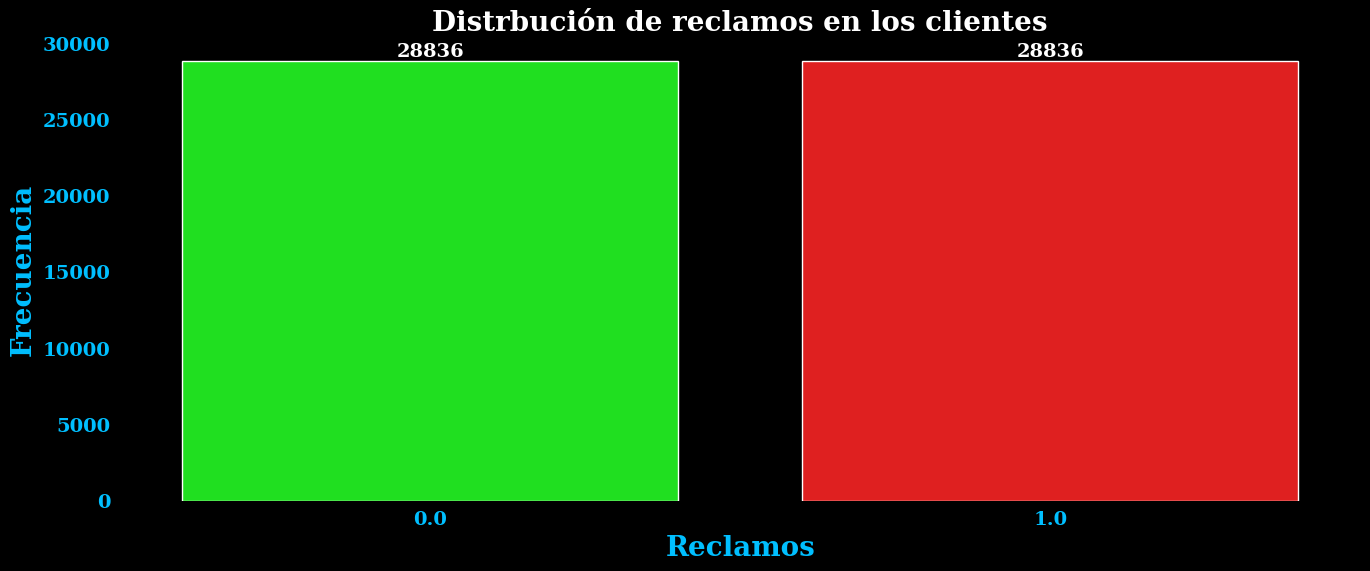

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16,6), facecolor="black")
#Tipo de letra
plt.rcParams['font.family'] = 'DejaVu Serif'
#Revisamos la proporción de reclamos
#x-->Variable a graficar
#data-->Dattos
#color-->Color de las barras
#edgecolor-->Color del borde de las barras
# Creamos una paleta de colores
colors = ['lime', 'red']
#Width-->Grosor de barras
grafica=sns.countplot(x='is_claim',data=os_data_y,palette=colors,edgecolor='white')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Reclamos',fontsize = 20,
           color = 'deepskyblue',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Frecuencia',fontsize = 20,
           color = 'deepskyblue',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='deepskyblue',fontweight='bold')
plt.yticks(fontsize=14, color='deepskyblue',fontweight='bold')
#Agregar el titulo con tamaño y color personalizados
#fontweight='bold'-->Negritas
plt.title('Distrbución de reclamos en los clientes',fontsize = 20,
          color = 'white',fontweight='bold')
#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=14,
                      color='white',fontweight='bold')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")
# Eliminar bordes de la gráfica
#Borde superior
plt.gca().spines['top'].set_visible(False)
#Borde derecho
plt.gca().spines['right'].set_visible(False)
#Borde izquierdo
plt.gca().spines['left'].set_visible(False)
#Borde inferior
plt.gca().spines['bottom'].set_visible(False)
# Mostrar el gráfico
plt.show()

In [ ]:
dm = dm.columns.values.tolist()
y = ["is_claim"]
x = [i for i in de if i not in y]

In [ ]:
print(y, x)

['is_claim'] ['age_of_car', 'make', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'is_rear_brakes_type_disc', 'displacement', 'cylinder', 'is_transmission_type_manual', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'steering_type_Electric', 'steering_type_Power', 'engine_type_1.5 L U2 CRDi', 'engine_type_1.5 Turbocharged Revotron', 'engine_type_F8D Petrol Engine', 'engine_type_G12B', 'engine_type_K Series Dual jet', 'engine_type_K10C', 'engine_type_i-DTEC', 'model_M10', 'model_M11', 'model_M2', 'model_M4', 'model_M6', 'model_M8', 'model_M9', 'max_power_118.36bhp@5500rpm', 'max_power_40.36bhp@6000rpm', 'max_power_

In [ ]:
x = os_data_x
y = os_data_y

In [ ]:
import statsmodels.api as sm
x_m = sm.add_constant(x)

In [ ]:
x_m.corr()

const  age_of_car  population_density  area_cluster_C22  \
const                 NaN         NaN                 NaN               NaN   
age_of_car            NaN    1.000000           -0.035418         -0.020032   
population_density    NaN   -0.035418            1.000000          0.008481   
area_cluster_C22      NaN   -0.020032            0.008481          1.000000   
area_cluster_C20      NaN    0.002911            0.020658         -0.002666   
area_cluster_C6       NaN   -0.036394           -0.024807         -0.008298   
area_cluster_C9       NaN   -0.031175            0.049041         -0.014098   
area_cluster_C4       NaN   -0.018621            0.067399         -0.007775   
area_cluster_C16      NaN   -0.058671            0.007811         -0.005990   
area_cluster_C21      NaN   -0.004064           -0.088178         -0.005407   
area_cluster_C11      NaN   -0.014335           -0.110735         -0.008903   
area_cluster_C18      NaN   -0.056559            0.139986         -0.005198   
area_cluster_C19      NaN    0.006487            0.147941         -0.008701   
area_cluster_C15      NaN   -0.017551           -0.149923         -0.007365   
area_cluster_C7       NaN   -0.017690           -0.157922         -0.012702   
area_cluster_C14      NaN    0.039034           -0.180158         -0.017746   
area_cluster_C13      NaN    0.043753           -0.208985         -0.015610   
area_cluster_C12      NaN    0.026394            0.275505         -0.010359   
area_cluster_C2       NaN    0.009933            0.417151         -0.026076   
area_cluster_C8       NaN    0.196028           -0.325354         -0.037044   
area_cluster_C3       NaN   -0.153047           -0.373691         -0.024579   
area_cluster_C5       NaN   -0.066959            0.648023         -0.024432   

                    area_cluster_C20  area_cluster_C6  area_cluster_C9  \
const                            NaN              NaN              NaN   
age_of_car                  0.002911        -0.036394        -0.031175   
population_density          0.020658        -0.024807         0.049041   
area_cluster_C22           -0.002666        -0.008298        -0.014098   
area_cluster_C20            1.000000        -0.005273        -0.008958   
area_cluster_C6            -0.005273         1.000000        -0.027877   
area_cluster_C9            -0.008958        -0.027877         1.000000   
area_cluster_C4             0.012510        -0.015374        -0.026120   
area_cluster_C16           -0.003806        -0.011845        -0.020125   
area_cluster_C21           -0.003436        -0.010691        -0.018165   
area_cluster_C11           -0.005657        -0.017604        -0.029910   
area_cluster_C18           -0.003303        -0.010279        -0.017464   
area_cluster_C19           -0.005529        -0.017205        -0.029231   
area_cluster_C15           -0.004680        -0.014564        -0.024744   
area_cluster_C7            -0.008071        -0.025117        -0.042674   
area_cluster_C14           -0.011276        -0.035091        -0.059619   
area_cluster_C13           -0.009919        -0.030866        -0.052442   
area_cluster_C12           -0.006582        -0.020484        -0.034802   
area_cluster_C2            -0.016569        -0.051563        -0.087605   
area_cluster_C8            -0.023538        -0.073250        -0.124452   
area_cluster_C3            -0.015618        -0.048603        -0.082576   
area_cluster_C5            -0.015524        -0.048311        -0.082080   

                    area_cluster_C4  area_cluster_C16  area_cluster_C21  \
const                           NaN               NaN               NaN   
age_of_car                -0.018621         -0.058671         -0.004064   
population_density         0.067399          0.007811         -0.088178   
area_cluster_C22          -0.007775         -0.005990         -0.005407   
area_cluster_C20           0.012510         -0.003806         -0.003436   
area_cluster_C6           -0.015374         -0.01

In [ ]:
log_reg = sm.Logit(y, x_m).fit()

         Current function value: 0.687102
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(log_reg.summary2())

                                Results: Logit
Model:                   Logit                Method:               MLE        
Dependent Variable:      is_claim             Pseudo R-squared:     0.009      
Date:                    2025-05-30 03:41     AIC:                  79295.0522 
No. Observations:        57672                BIC:                  79483.2652 
Df Model:                20                   Log-Likelihood:       -39627.    
Df Residuals:            57651                LL-Null:              -39975.    
Converged:               0.0000               LLR p-value:          8.1821e-135
No. Iterations:          35.0000              Scale:                1.0000     
-------------------------------------------------------------------------------
                    Coef.    Std.Err.     z     P>|z|     [0.025       0.975]  
-------------------------------------------------------------------------------
const              -0.1440  74999.8054  -0.0000 1.0000 -146997.0614 14699

In [ ]:
x.head()

age_of_car  population_density  area_cluster_C22  area_cluster_C20  \
0         1.0              4076.0               0.0               0.0   
1         7.0             34791.0               0.0               0.0   
2        18.0              8794.0               0.0               0.0   
3         6.0             27003.0               0.0               0.0   
4        13.0             34738.0               0.0               0.0   

   area_cluster_C6  area_cluster_C9  area_cluster_C4  area_cluster_C16  \
0              0.0              0.0              0.0               0.0   
1              0.0              0.0              0.0               0.0   
2              0.0              0.0              0.0               0.0   
3              0.0              0.0              0.0               0.0   
4              0.0              0.0              0.0               0.0   

   area_cluster_C21  area_cluster_C11  area_cluster_C18  area_cluster_C19  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   area_cluster_C15  area_cluster_C7  area_cluster_C14  area_cluster_C13  \
0               0.0              0.0               0.0               0.0   
1               0.0              0.0               0.0               0.0   
2               0.0              0.0               0.0               0.0   
3               0.0              0.0               0.0               0.0   
4               0.0              0.0               0.0               0.0   

   area_cluster_C12  area_cluster_C2  area_cluster_C8  area_cluster_C3  \
0               0.0              0.0              0.0              1.0   
1               1.0              0.0              0.0              0.0   
2               0.0              0.0              1.0              0.0   
3               0.0              1.0              0.0              0.0   
4               0.0              0.0              0.0              0.0   

   area_cluster_C5  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              1.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)

In [ ]:
x_train

age_of_car  population_density  area_cluster_C22  area_cluster_C20  \
17959         0.0              4076.0               0.0               0.0   
33179         7.0              8794.0               0.0               0.0   
19191         4.0             34738.0               0.0               0.0   
44552         4.0             27003.0               0.0               0.0   
3116          6.0              4076.0               0.0               0.0   
...           ...                 ...               ...               ...   
16317         5.0             17804.0               0.0               0.0   
12895         1.0             20905.0               0.0               1.0   
6012          9.0              8794.0               0.0               0.0   
6558          4.0              8794.0               0.0               0.0   
56267         8.0             17804.0               0.0               0.0   

       area_cluster_C6  area_cluster_C9  area_cluster_C4  area_cluster_C16  \
17959              0.0              0.0              0.0               0.0   
33179              0.0              0.0              0.0               0.0   
19191              0.0              0.0              0.0               0.0   
44552              0.0              0.0              0.0               0.0   
3116               0.0              0.0              0.0               0.0   
...                ...              ...              ...               ...   
16317              0.0              1.0              0.0               0.0   
12895              0.0              0.0              0.0               0.0   
6012               0.0              0.0              0.0               0.0   
6558               0.0              0.0              0.0               0.0   
56267              0.0              1.0              0.0               0.0   

       area_cluster_C21  area_cluster_C11  area_cluster_C18  area_cluster_C19  \
17959               0.0               0.0               0.0               0.0   
33179               0.0               0.0               0.0               0.0   
19191               0.0               0.0               0.0               0.0   
44552               0.0               0.0               0.0               0.0   
3116                0.0               0.0               0.0               0.0   
...                 ...               ...               ...               ...   
16317               0.0               0.0               0.0               0.0   
12895               0.0               0.0               0.0               0.0   
6012                0.0               0.0               0.0               0.0   
6558                0.0               0.0               0.0               0.0   
56267               0.0               0.0               0.0               0.0   

       area_cluster_C15  area_cluster_C7  area_cluster_C14  area_cluster_C13  \
17959               0.0              0.0               0.0               0.0   
33179               0.0              0.0               0.0               0.0   
19191               0.0              0.0               0.0               0.0   
44552               0.0              0.0               0.0               0.0   
3116                0.0              0.0               0.0               0.0   
...                 ...              ...               ...               ...   
16317               0.0              0.0               0.0               0.0   
12895               0.0              0.0               0.0               0.0   
6012                0.0              0.0               0.0               0.0   
6558                0.0              0.0               0.0               0.0   
56267               0.0              0.0               0.0               0.0   

       area_cluster_C12  area_cluster_C2  area_cluster_C8  area_cluster_C3  \
17959               0.0              0.0              0.0              1.0   
33179               0.0              0.0              1

In [ ]:
x_train.shape

(40370, 21)

In [ ]:
x_test

age_of_car  population_density  area_cluster_C22  area_cluster_C20  \
46978         4.0              8794.0               0.0               0.0   
9238         14.0             27003.0               0.0               0.0   
19618        12.0              8794.0               0.0               0.0   
3733          3.0              8794.0               0.0               0.0   
1258          6.0              8794.0               0.0               0.0   
...           ...                 ...               ...               ...   
9384          1.0             34738.0               0.0               0.0   
26824         2.0              3264.0               0.0               0.0   
51511         4.0             17804.0               0.0               0.0   
57580        12.0             27003.0               0.0               0.0   
56099         9.0              4990.0               0.0               0.0   

       area_cluster_C6  area_cluster_C9  area_cluster_C4  area_cluster_C16  \
46978              0.0              0.0              0.0               0.0   
9238               0.0              0.0              0.0               0.0   
19618              0.0              0.0              0.0               0.0   
3733               0.0              0.0              0.0               0.0   
1258               0.0              0.0              0.0               0.0   
...                ...              ...              ...               ...   
9384               0.0              0.0              0.0               0.0   
26824              0.0              0.0              0.0               0.0   
51511              0.0              1.0              0.0               0.0   
57580              0.0              0.0              0.0               0.0   
56099              0.0              0.0              0.0               0.0   

       area_cluster_C21  area_cluster_C11  area_cluster_C18  area_cluster_C19  \
46978               0.0               0.0               0.0               0.0   
9238                0.0               0.0               0.0               0.0   
19618               0.0               0.0               0.0               0.0   
3733                0.0               0.0               0.0               0.0   
1258                0.0               0.0               0.0               0.0   
...                 ...               ...               ...               ...   
9384                0.0               0.0               0.0               0.0   
26824               1.0               0.0               0.0               0.0   
51511               0.0               0.0               0.0               0.0   
57580               0.0               0.0               0.0               0.0   
56099               0.0               0.0               0.0               0.0   

       area_cluster_C15  area_cluster_C7  area_cluster_C14  area_cluster_C13  \
46978               0.0              0.0               0.0               0.0   
9238                0.0              0.0               0.0               0.0   
19618               0.0              0.0               0.0               0.0   
3733                0.0              0.0               0.0               0.0   
1258                0.0              0.0               0.0               0.0   
...                 ...              ...               ...               ...   
9384                0.0              0.0               0.0               0.0   
26824               0.0              0.0               0.0               0.0   
51511               0.0              0.0               0.0               0.0   
57580               0.0              0.0               0.0               0.0   
56099               0.0              0.0               0.0               0.0   

       area_cluster_C12  area_cluster_C2  area_cluster_C8  area_cluster_C3  \
46978               0.0              0.0              1.0              0.0   
9238                0.0              1.0              0

In [ ]:
x_test.shape

(17302, 21)

In [ ]:
y_test

is_claim
46978       1.0
9238        0.0
19618       0.0
3733        0.0
1258        0.0
...         ...
9384        0.0
26824       0.0
51511       1.0
57580       1.0
56099       1.0

[17302 rows x 1 columns]

In [ ]:
y_train

is_claim
17959       0.0
33179       1.0
19191       0.0
44552       1.0
3116        0.0
...         ...
16317       0.0
12895       0.0
6012        0.0
6558        0.0
56267       1.0

[40370 rows x 1 columns]

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predicciones = model.predict(x_test)
predicciones

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
model.predict_proba(x_test)[:,1]

array([0.53850564, 0.46026893, 0.47445702, ..., 0.45798087, 0.47623972,
       0.44565889])

In [ ]:
predicciones.shape

(17302,)

In [ ]:
y_test

is_claim
46978       1.0
9238        0.0
19618       0.0
3733        0.0
1258        0.0
...         ...
9384        0.0
26824       0.0
51511       1.0
57580       1.0
56099       1.0

[17302 rows x 1 columns]

In [ ]:
y_test.shape

(17302, 1)

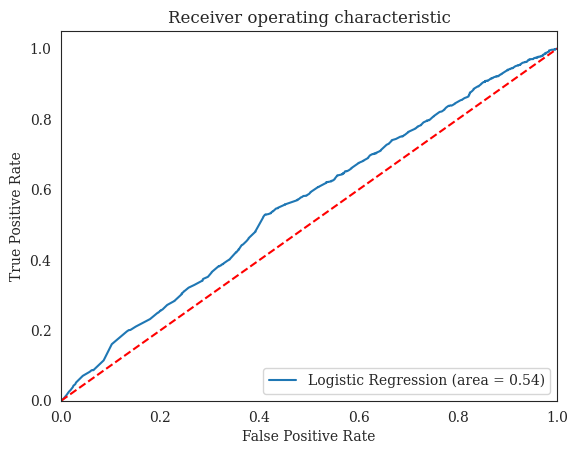

In [ ]:

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))

fpr_lr, tpr_lr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

plt.show()

In [ ]:
fpr_lr

array([0.        , 0.00414365, 0.01116483, 0.01542357, 0.01922192,
       0.02348066, 0.02474678, 0.02474678, 0.02843002, 0.03004144,
       0.03004144, 0.04362339, 0.05605433, 0.05766575, 0.06146409,
       0.06514733, 0.06514733, 0.08563536, 0.10209484, 0.10209484,
       0.13190608, 0.13190608, 0.13248158, 0.13651013, 0.13812155,
       0.13961786, 0.15066759, 0.17921271, 0.17921271, 0.19486648,
       0.19486648, 0.19590239, 0.19981584, 0.20085175, 0.20085175,
       0.20418969, 0.20418969, 0.21374309, 0.22893646, 0.22893646,
       0.24297882, 0.24297882, 0.24320902, 0.24320902, 0.24631676,
       0.24746777, 0.24746777, 0.24838858, 0.25702118, 0.26841621,
       0.26841621, 0.28418508, 0.28441529, 0.28453039, 0.28453039,
       0.28522099, 0.2860267 , 0.2860267 , 0.28694751, 0.29592541,
       0.3032919 , 0.3032919 , 0.31698895, 0.31767956, 0.31813996,
       0.31813996, 0.31860037, 0.31860037, 0.32251381, 0.32331952,
       0.32631215, 0.32631215, 0.32677256, 0.32677256, 0.32803

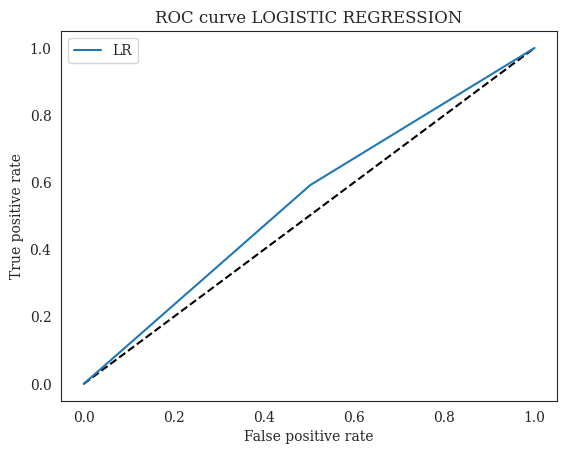

In [ ]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, predicciones)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve LOGISTIC REGRESSION')
plt.legend(loc='best')
plt.show()

In [ ]:
fpr_lr

array([0.        , 0.50264733, 1.        ])

In [ ]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

         0.0       0.55      0.50      0.52      8688
         1.0       0.54      0.59      0.56      8614

    accuracy                           0.54     17302
   macro avg       0.55      0.54      0.54     17302
weighted avg       0.55      0.54      0.54     17302



In [ ]:
confusion_matrix(y_test,predicciones)

array([[4321, 4367],
       [3515, 5099]])

---
# **Modelo de regresión logística con Scikit-learn** 🧠
---

---
## **Entrenamiento del modelo** 💪
---

---
## **Métricas del modelo** ♾️
---

---
## **Matriz de confusión**🕵️
---

---
## **Curva ROC**📊
---

---
# **Modelo de regresión logística con Statsmodels** 📈
---

In [ ]:
y_test.head()

is_claim
46978       1.0
9238        0.0
19618       0.0
3733        0.0
1258        0.0

In [ ]:
x_test.head()

age_of_car  population_density  area_cluster_C22  area_cluster_C20  \
46978         4.0              8794.0               0.0               0.0   
9238         14.0             27003.0               0.0               0.0   
19618        12.0              8794.0               0.0               0.0   
3733          3.0              8794.0               0.0               0.0   
1258          6.0              8794.0               0.0               0.0   

       area_cluster_C6  area_cluster_C9  area_cluster_C4  area_cluster_C16  \
46978              0.0              0.0              0.0               0.0   
9238               0.0              0.0              0.0               0.0   
19618              0.0              0.0              0.0               0.0   
3733               0.0              0.0              0.0               0.0   
1258               0.0              0.0              0.0               0.0   

       area_cluster_C21  area_cluster_C11  area_cluster_C18  area_cluster_C19  \
46978               0.0               0.0               0.0               0.0   
9238                0.0               0.0               0.0               0.0   
19618               0.0               0.0               0.0               0.0   
3733                0.0               0.0               0.0               0.0   
1258                0.0               0.0               0.0               0.0   

       area_cluster_C15  area_cluster_C7  area_cluster_C14  area_cluster_C13  \
46978               0.0              0.0               0.0               0.0   
9238                0.0              0.0               0.0               0.0   
19618               0.0              0.0               0.0               0.0   
3733                0.0              0.0               0.0               0.0   
1258                0.0              0.0               0.0               0.0   

       area_cluster_C12  area_cluster_C2  area_cluster_C8  area_cluster_C3  \
46978               0.0              0.0              1.0              0.0   
9238                0.0              1.0              0.0              0.0   
19618               0.0              0.0              1.0              0.0   
3733                0.0              0.0              1.0              0.0   
1258                0.0              0.0              1.0              0.0   

       area_cluster_C5  
46978              0.0  
9238               0.0  
19618              0.0  
3733               0.0  
1258               0.0

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17302 entries, 46978 to 56099
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age_of_car          17302 non-null  float64
 1   population_density  17302 non-null  float64
 2   area_cluster_C22    17302 non-null  float64
 3   area_cluster_C20    17302 non-null  float64
 4   area_cluster_C6     17302 non-null  float64
 5   area_cluster_C9     17302 non-null  float64
 6   area_cluster_C4     17302 non-null  float64
 7   area_cluster_C16    17302 non-null  float64
 8   area_cluster_C21    17302 non-null  float64
 9   area_cluster_C11    17302 non-null  float64
 10  area_cluster_C18    17302 non-null  float64
 11  area_cluster_C19    17302 non-null  float64
 12  area_cluster_C15    17302 non-null  float64
 13  area_cluster_C7     17302 non-null  float64
 14  area_cluster_C14    17302 non-null  float64
 15  area_cluster_C13    17302 non-null  float64
 16  area_

In [ ]:
(x_train.nunique() == 1)

age_of_car            False
population_density    False
area_cluster_C22      False
area_cluster_C20      False
area_cluster_C6       False
area_cluster_C9       False
area_cluster_C4       False
area_cluster_C16      False
area_cluster_C21      False
area_cluster_C11      False
area_cluster_C18      False
area_cluster_C19      False
area_cluster_C15      False
area_cluster_C7       False
area_cluster_C14      False
area_cluster_C13      False
area_cluster_C12      False
area_cluster_C2       False
area_cluster_C8       False
area_cluster_C3       False
area_cluster_C5       False
dtype: bool

In [ ]:
selector = VarianceThreshold(threshold=0)  # Elimina columnas constantes
x_train = pd.DataFrame(selector.fit_transform(x_train), columns=x_train.columns[selector.get_support()])
# Eliminar columnas duplicadas
x_train = x_train.loc[:, ~x_train.T.duplicated()]
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [ ]:
x_train

age_of_car  population_density  area_cluster_C22  area_cluster_C20  \
0             0.0              4076.0               0.0               0.0   
1             7.0              8794.0               0.0               0.0   
2             4.0             34738.0               0.0               0.0   
3             4.0             27003.0               0.0               0.0   
4             6.0              4076.0               0.0               0.0   
...           ...                 ...               ...               ...   
40365         5.0             17804.0               0.0               0.0   
40366         1.0             20905.0               0.0               1.0   
40367         9.0              8794.0               0.0               0.0   
40368         4.0              8794.0               0.0               0.0   
40369         8.0             17804.0               0.0               0.0   

       area_cluster_C6  area_cluster_C9  area_cluster_C4  area_cluster_C16  \
0                  0.0              0.0              0.0               0.0   
1                  0.0              0.0              0.0               0.0   
2                  0.0              0.0              0.0               0.0   
3                  0.0              0.0              0.0               0.0   
4                  0.0              0.0              0.0               0.0   
...                ...              ...              ...               ...   
40365              0.0              1.0              0.0               0.0   
40366              0.0              0.0              0.0               0.0   
40367              0.0              0.0              0.0               0.0   
40368              0.0              0.0              0.0               0.0   
40369              0.0              1.0              0.0               0.0   

       area_cluster_C21  area_cluster_C11  area_cluster_C18  area_cluster_C19  \
0                   0.0               0.0               0.0               0.0   
1                   0.0               0.0               0.0               0.0   
2                   0.0               0.0               0.0               0.0   
3                   0.0               0.0               0.0               0.0   
4                   0.0               0.0               0.0               0.0   
...                 ...               ...               ...               ...   
40365               0.0               0.0               0.0               0.0   
40366               0.0               0.0               0.0               0.0   
40367               0.0               0.0               0.0               0.0   
40368               0.0               0.0               0.0               0.0   
40369               0.0               0.0               0.0               0.0   

       area_cluster_C15  area_cluster_C7  area_cluster_C14  area_cluster_C13  \
0                   0.0              0.0               0.0               0.0   
1                   0.0              0.0               0.0               0.0   
2                   0.0              0.0               0.0               0.0   
3                   0.0              0.0               0.0               0.0   
4                   0.0              0.0               0.0               0.0   
...                 ...              ...               ...               ...   
40365               0.0              0.0               0.0               0.0   
40366               0.0              0.0               0.0               0.0   
40367               0.0              0.0               0.0               0.0   
40368               0.0              0.0               0.0               0.0   
40369               0.0              0.0               0.0               0.0   

       area_cluster_C12  area_cluster_C2  area_cluster_C8  area_cluster_C3  \
0                   0.0              0.0              0.0              1.0   
1                   0.0              0.0              1

In [ ]:
x_train = sm.add_constant(x_train, has_constant='add')
x_train

const  age_of_car  population_density  area_cluster_C22  \
0        1.0         0.0              4076.0               0.0   
1        1.0         7.0              8794.0               0.0   
2        1.0         4.0             34738.0               0.0   
3        1.0         4.0             27003.0               0.0   
4        1.0         6.0              4076.0               0.0   
...      ...         ...                 ...               ...   
40365    1.0         5.0             17804.0               0.0   
40366    1.0         1.0             20905.0               0.0   
40367    1.0         9.0              8794.0               0.0   
40368    1.0         4.0              8794.0               0.0   
40369    1.0         8.0             17804.0               0.0   

       area_cluster_C20  area_cluster_C6  area_cluster_C9  area_cluster_C4  \
0                   0.0              0.0              0.0              0.0   
1                   0.0              0.0              0.0              0.0   
2                   0.0              0.0              0.0              0.0   
3                   0.0              0.0              0.0              0.0   
4                   0.0              0.0              0.0              0.0   
...                 ...              ...              ...              ...   
40365               0.0              0.0              1.0              0.0   
40366               1.0              0.0              0.0              0.0   
40367               0.0              0.0              0.0              0.0   
40368               0.0              0.0              0.0              0.0   
40369               0.0              0.0              1.0              0.0   

       area_cluster_C16  area_cluster_C21  area_cluster_C11  area_cluster_C18  \
0                   0.0               0.0               0.0               0.0   
1                   0.0               0.0               0.0               0.0   
2                   0.0               0.0               0.0               0.0   
3                   0.0               0.0               0.0               0.0   
4                   0.0               0.0               0.0               0.0   
...                 ...               ...               ...               ...   
40365               0.0               0.0               0.0               0.0   
40366               0.0               0.0               0.0               0.0   
40367               0.0               0.0               0.0               0.0   
40368               0.0               0.0               0.0               0.0   
40369               0.0               0.0               0.0               0.0   

       area_cluster_C19  area_cluster_C15  area_cluster_C7  area_cluster_C14  \
0                   0.0               0.0              0.0               0.0   
1                   0.0               0.0              0.0               0.0   
2                   0.0               0.0              0.0               0.0   
3                   0.0               0.0              0.0               0.0   
4                   0.0               0.0              0.0               0.0   
...                 ...               ...              ...               ...   
40365               0.0               0.0              0.0               0.0   
40366               0.0               0.0              0.0               0.0   
40367               0.0               0.0              0.0               0.0   
40368               0.0               0.0              0.0               0.0   
40369               0.0               0.0              0.0               0.0   

       area_cluster_C13  area_cluster_C12  area_cluster_C2  area_cluster_C8  \
0                   0.0               0.0              0.0              0.0   
1                   0.0               0.0              0.0              1.0   
2                   0.0               0.0              0.0              0.0   
3                   0.0    

In [ ]:
log_reg = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.686855
         Iterations 5


In [ ]:
x_train

const  age_of_car  population_density  area_cluster_C22  \
0        1.0         0.0              4076.0               0.0   
1        1.0         7.0              8794.0               0.0   
2        1.0         4.0             34738.0               0.0   
3        1.0         4.0             27003.0               0.0   
4        1.0         6.0              4076.0               0.0   
...      ...         ...                 ...               ...   
40365    1.0         5.0             17804.0               0.0   
40366    1.0         1.0             20905.0               0.0   
40367    1.0         9.0              8794.0               0.0   
40368    1.0         4.0              8794.0               0.0   
40369    1.0         8.0             17804.0               0.0   

       area_cluster_C20  area_cluster_C6  area_cluster_C9  area_cluster_C4  \
0                   0.0              0.0              0.0              0.0   
1                   0.0              0.0              0.0              0.0   
2                   0.0              0.0              0.0              0.0   
3                   0.0              0.0              0.0              0.0   
4                   0.0              0.0              0.0              0.0   
...                 ...              ...              ...              ...   
40365               0.0              0.0              1.0              0.0   
40366               1.0              0.0              0.0              0.0   
40367               0.0              0.0              0.0              0.0   
40368               0.0              0.0              0.0              0.0   
40369               0.0              0.0              1.0              0.0   

       area_cluster_C16  area_cluster_C21  area_cluster_C11  area_cluster_C18  \
0                   0.0               0.0               0.0               0.0   
1                   0.0               0.0               0.0               0.0   
2                   0.0               0.0               0.0               0.0   
3                   0.0               0.0               0.0               0.0   
4                   0.0               0.0               0.0               0.0   
...                 ...               ...               ...               ...   
40365               0.0               0.0               0.0               0.0   
40366               0.0               0.0               0.0               0.0   
40367               0.0               0.0               0.0               0.0   
40368               0.0               0.0               0.0               0.0   
40369               0.0               0.0               0.0               0.0   

       area_cluster_C19  area_cluster_C15  area_cluster_C7  area_cluster_C14  \
0                   0.0               0.0              0.0               0.0   
1                   0.0               0.0              0.0               0.0   
2                   0.0               0.0              0.0               0.0   
3                   0.0               0.0              0.0               0.0   
4                   0.0               0.0              0.0               0.0   
...                 ...               ...              ...               ...   
40365               0.0               0.0              0.0               0.0   
40366               0.0               0.0              0.0               0.0   
40367               0.0               0.0              0.0               0.0   
40368               0.0               0.0              0.0               0.0   
40369               0.0               0.0              0.0               0.0   

       area_cluster_C13  area_cluster_C12  area_cluster_C2  area_cluster_C8  \
0                   0.0               0.0              0.0              0.0   
1                   0.0               0.0              0.0              1.0   
2                   0.0               0.0              0.0              0.0   
3                   0.0    

In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:               is_claim   No. Observations:                40370
Model:                          Logit   Df Residuals:                    40349
Method:                           MLE   Df Model:                           20
Date:                Fri, 30 May 2025   Pseudo R-squ.:                0.009075
Time:                        03:42:08   Log-Likelihood:                -27728.
converged:                       True   LL-Null:                       -27982.
Covariance Type:            nonrobust   LLR p-value:                 6.455e-95
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2393   3.17e+05  -7.55e-07      1.000   -6.21e+05    6.21e+05
age_of_car            -0.0320      0.002    -15.737      0.000      -0.036      -0.028
population_density  

In [ ]:
y_hat = log_reg.predict(x_train)

In [ ]:
prediction = list(map(round, y_hat))

In [ ]:
print(y_test.shape)
print(y_hat.shape)

(17302, 1)
(40370,)


In [ ]:
cm = confusion_matrix(y_test, predicciones)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[4321 4367]
 [3515 5099]]


In [ ]:
confusion_matrix(y_test,predicciones)

array([[4321, 4367],
       [3515, 5099]])

<Axes: >

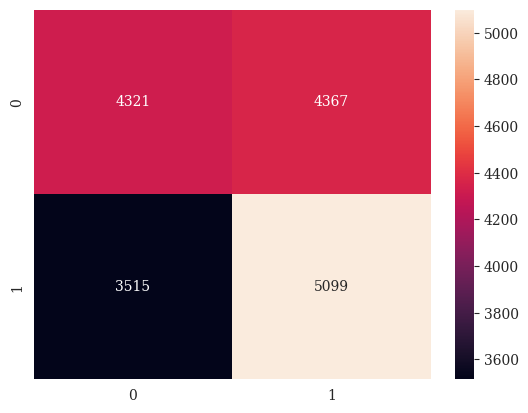

In [ ]:
sns.heatmap(cm, annot=True, fmt='g')

In [ ]:
print('Test accuracy = ', accuracy_score(y_test, predicciones))

Test accuracy =  0.5444457288174778


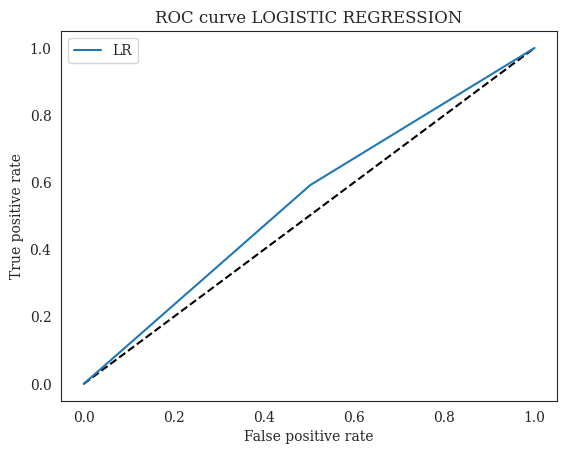

In [ ]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, predicciones)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve LOGISTIC REGRESSION')
plt.legend(loc='best')
plt.show()

In [ ]:
fpr_lr

array([0.        , 0.50264733, 1.        ])

---
## **Entrenamiento del modelo** 💪
---

---
## **Métricas del modelo** ♾️
---

---
## **Matriz de confusión**🕵️
---

---
## **Curva ROC**📊
---

---
# **Conclusiones**📌
---

Codigo elaborado por Morales Francisco [LinkedIn](https://www.linkedin.com/in/francisco-morales-actuario/)

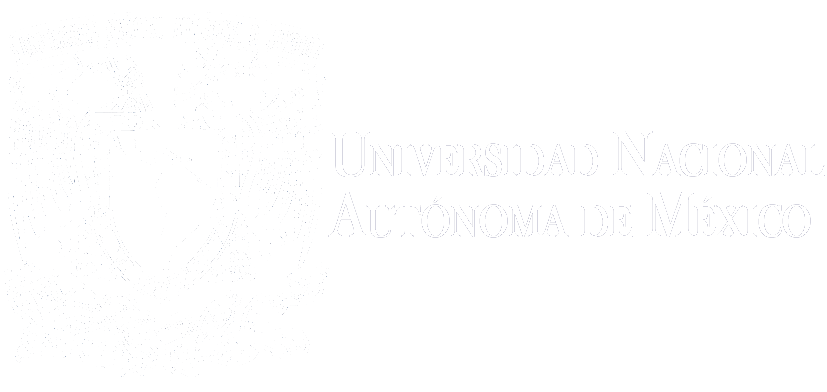